<a href="https://colab.research.google.com/github/senthilchandrasegaran/drs2021-tool-share/blob/master/analysis_song_exploder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing Song Exploder Transcripts using Empath

Empath (see Fast et al., 2016) is a tool for analysing a given corpus of text to identify the occurrence of certain pre-defined linguistic categories (similar to what is provided by LIWC), but also provides us with a way to create our own linguistic categories based on the behaviour we might want to examine. For instance, we might want to look for instances of reflective thinking in a corpus of designers' interview transcripts. In this notebook, we provide a way for you to use Empath to look into a set of such interview transcripts scraped from the podcast "Song Exploder". We will create a new linguistic category called "reflection" to illustrate the idea, but you can create your own category based on what interests you as a researcher.
 

## Some Housekeeping
We install and import some necessary libraries in this cell. Simply run the cell below by clicking on the "Play" button on the top left corner (if you cannot see it, hover your mouse pointer over the top left corner of the cell below and it should appear).


In [1]:
!pip install Empath
! git clone https://github.com/senthilchandrasegaran/drs2021-tool-share.git

import glob
import re
import string
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import Markdown, display
from empath import Empath

def printmd(string):
    display(Markdown(string))


fatal: destination path 'drs2021-tool-share' already exists and is not an empty directory.


#### NOTE: Re-run above cell if needed.
If you receive a messsage above that states something like "Restart Runtime", simply run the above cell once again.

## Load All Datasets
If the below function does not work, check your "output" folder to make sure all files are present. The code should load 63 files into the dataframe.

In [2]:
files = glob.glob('/content/drs2021-tool-share/song_exploder_transcripts/txts/*.txt')

df_list = []

for filename in files:
    df_file = pd.read_csv(filename, sep=';')
    df_list.append(df_file)

df = pd.concat(df_list, axis=0, ignore_index=True)
print("Read", len(files), "files and loaded", df.shape[0], "rows into the dataframe.")

Read 63 files and loaded 2297 rows into the dataframe.


## Empath Analysis

### Manage Categories in Empath
Some functions for keeping track of original categories present in Empath and new ones that you create. Simply run the cells by clicking on the "play" button below.

In [3]:
def check_for_custom_caetgories():
    current_lexicon = Empath()
    empath_original_categories_list = [
         'achievement', 'affection', 'aggression', 'air_travel', 'alcohol', 'ancient', 'anger',
         'animal', 'anonymity', 'anticipation', 'appearance', 'art', 'attractive', 'banking',
         'beach', 'beauty', 'blue_collar_job', 'body', 'breaking', 'business', 'car',
         'celebration', 'cheerfulness', 'childish', 'children', 'cleaning', 'clothing', 'cold',
         'college', 'communication', 'competing', 'computer', 'confusion', 'contentment',
         'cooking', 'crime', 'dance', 'death', 'deception', 'disappointment', 'disgust',
         'dispute', 'divine', 'domestic_work', 'dominant_heirarchical', 'dominant_personality',
         'driving', 'eating', 'economics', 'emotional', 'envy', 'exasperation', 'exercise',
         'exotic', 'fabric', 'family', 'farming', 'fashion', 'fear', 'feminine', 'fight',
         'fire', 'friends', 'fun', 'furniture', 'gain', 'giving', 'government', 'hate',
         'healing', 'health', 'hearing', 'help', 'heroic', 'hiking', 'hipster', 'home',
         'horror', 'hygiene', 'independence', 'injury', 'internet', 'irritability',
         'journalism', 'joy', 'kill', 'law', 'leader', 'legend', 'leisure', 'liquid', 'listen',
         'love', 'lust', 'magic', 'masculine', 'medical_emergency', 'medieval', 'meeting',
         'messaging', 'military', 'money', 'monster', 'morning', 'movement', 'music',
         'musical', 'negative_emotion', 'neglect', 'negotiate', 'nervousness', 'night',
         'noise', 'occupation', 'ocean', 'office', 'optimism', 'order', 'pain', 'party',
         'payment', 'pet', 'philosophy', 'phone', 'plant', 'play', 'politeness', 'politics',
         'poor', 'positive_emotion', 'power', 'pride', 'prison', 'programming', 'rage',
         'reading', 'real_estate', 'religion', 'restaurant', 'ridicule', 'royalty', 'rural',
         'sadness', 'sailing', 'school', 'science', 'sexual', 'shame', 'shape_and_size',
         'ship', 'shopping', 'sleep', 'smell', 'social_media', 'sound', 'speaking', 'sports',
         'stealing', 'strength', 'suffering', 'superhero', 'surprise', 'swearing_terms',
         'swimming', 'sympathy', 'technology', 'terrorism', 'timidity', 'tool', 'torment',
         'tourism', 'toy', 'traveling', 'trust', 'ugliness', 'urban', 'vacation', 'valuable',
         'vehicle', 'violence', 'war', 'warmth', 'water', 'weakness', 'wealthy', 'weapon',
         'weather', 'wedding', 'white_collar_job', 'work', 'worship', 'writing', 'youth', 'zest'
    ]
    empath_original_set = set(empath_original_categories_list)
    empath_current_set = set(lexicon.cats.keys())
    new_categories = empath_current_set.difference(empath_original_set)
    return new_categories
    

def delete_custom_categories():
    cats_to_delete = check_for_custom_caetgories()
    empath_lexicon = Empath()
    for cat in list(cats_to_delete) :
        empath_lexicon.delete_category(cat)
    print("Categories Deleted: ")
    print(cats_to_delete)
        

## Create your own Empath Category
Make sure the category name is an English word, it can help. Read the original paper for details on how.

In [4]:
lexicon = Empath()
lexicon.create_category('reflection', ['believe', 'realise', 'realize', 'retrospect', 'introspect', 'know'], size=100)

["realize", "realise", "believe", "understand", "Because", "mean", "knowing", "though", "thought", "care", "honestly", "actually", "remember", "knew", "wonder", "admit", "guess", "anymore", "Honestly", "matter", "thinking", "suppose", "trust", "probably", "blame", "assume", "Maybe", "explain", "Obviously", "realized", "seem", "wish", "imagine", "though", "right", "deny", "notice", "doubt", "knows", "anything", "anyway", "realizing", "exactly", "forget", "either", "expect", "seriously", "figured", "pretend", "why", "Actually", "truly", "idea", "seeing", "realised", "Even", "If", "meant", "realise", "bet", "regret", "suspect", "yet", "sure", "happen", "slightest_clue", "understood", "Knowing", "accept", "question", "funny_thing"]


In [5]:
check_for_custom_caetgories()

{'reflection'}

In [6]:
# delete_custom_categories()

## Get Words from New Category
We will not be using Empath's default matching functions, so that we can do a bit more that what Empath functions allow (identify matching words, create plots, etc.). So we create our own regular expression matching which can definitely be improved upon (see if you want to work on this!)

In [7]:
reflection_words = lexicon.cats['reflection']
reflection_words = [w.lower() for w in reflection_words]
reflection_words = sorted(list(set(reflection_words)))
reflection_words = [w.replace("_", " ") for w in reflection_words]

In [8]:
def make_regex(lex_list):
    separator = '\\b|\\b'
    reg_string = separator.join(lex_list)
    reg_string_whole_word = "\\b" + reg_string + "\\b"
    return reg_string_whole_word

def count_lexicon_terms(sentence, lexicon):
    reg_str = make_regex(lexicon)
    num_matches = len(list(re.finditer(reg_str, sentence.lower())))
    return num_matches

def count_words(sentence):
    words = sentence.split()
    return len(words)

## Add the number of matches to the dataframe
We use total matches here, but we also keep a count of words so that we can normalize later if needed.

In [9]:
df[0:10]

dataset  ...                                        speech_turn
0  song_exploder_transcripts  ...  You’re listening to Song Exploder, where music...
1  song_exploder_transcripts  ...  When Laetitia Tamko started making the second ...
2  song_exploder_transcripts  ...  Hi, I’m Laetitia Tamko, and I make music as Va...
3  song_exploder_transcripts  ...  I was at my friend Eric Littmann's house in Bu...
4  song_exploder_transcripts  ...  I heard it and I was like, “Oh my god, what is...
5  song_exploder_transcripts  ...                                            (Synth)
6  song_exploder_transcripts  ...    (Synth lead) (MS-20 synth) (MS-20 synth) (Kick)
7  song_exploder_transcripts  ...  I'd been playing around a little bit with my m...
8  song_exploder_transcripts  ...  And then, you know, I added this ﬂuttery MS-20...
9  song_exploder_transcripts  ...  The MS-20, it’s a synthesizer, a bass synth, e...

[10 rows x 4 columns]

In [10]:
def add_measure(df, lex_category_name, lex_category_list, normalize_measure=False):
    if lex_category_name in df.columns :
        print("Column already exists for", lex_category_name, ". Repopulating...")
        df = df.drop(lex_category_name, axis=1)
    column_index = len(df.columns)
    empath_measures = []
    word_counts = []
    for ind, speech_turn in enumerate(list(df['speech_turn'])) :
        if speech_turn != '' and speech_turn != ' ' :
            empath_measure = count_lexicon_terms(speech_turn, lex_category_list)
            num_words = count_words(speech_turn)
            word_counts.append(num_words)
            if normalize_measure :
                empath_measures.append(empath_measure/num_words)
            else :
                empath_measures.append(empath_measure)
    df.insert(column_index, lex_category_name, empath_measures, True)
    if not 'word count' in df.columns :
        df.insert(column_index+1, 'word count', word_counts, True)
    return df


In [11]:
df = add_measure(df, 'reflection', reflection_words, normalize_measure=False)
df[0:10]

dataset  session  ... reflection word count
0  song_exploder_transcripts  vagabon  ...          0         33
1  song_exploder_transcripts  vagabon  ...          3        101
2  song_exploder_transcripts  vagabon  ...          0         13
3  song_exploder_transcripts  vagabon  ...          0        149
4  song_exploder_transcripts  vagabon  ...          0         13
5  song_exploder_transcripts  vagabon  ...          0          1
6  song_exploder_transcripts  vagabon  ...          0          7
7  song_exploder_transcripts  vagabon  ...          0         55
8  song_exploder_transcripts  vagabon  ...          0         11
9  song_exploder_transcripts  vagabon  ...          0         19

[10 rows x 6 columns]

## Plot Occurrences
A number of plotting functions to plot occurrences by dataset, by session, by speaker, and on a timeline. 

In [12]:
def plot_cats_by_dataset(df, category, normalize=False):
    dataset_df = df
    dataset_category_df = df[df[category] > 0]
    datasets = sorted(list(set(df['dataset'])))
    num_datasets = len(datasets)
    fig = plt.figure(figsize=[num_datasets,4], dpi=300)
    if normalize == False :
        p=sns.countplot(data=dataset_df, x='dataset', color='#eee', order=datasets)
        p=sns.countplot(data=dataset_category_df, x='dataset', color='#777', order=datasets)
        p.set_title('proportion of ' + category + ' turns')
    else :
        total_turns_list = []
        category_turns_list = []
        for dataset in datasets :
            total_turns = df[df['dataset'] == dataset].shape[0]
            category_turns = dataset_category_df[dataset_category_df['dataset'] == dataset].shape[0]
            total_turns_normalized = 100
            category_turns_normalized = category_turns/total_turns * 100
            total_turns_list.append(total_turns_normalized)
            category_turns_list.append(category_turns_normalized)
        p=sns.barplot(x=datasets, y=total_turns_list, orient='v', color='#eee')
        p=sns.barplot(x = datasets, y=category_turns_list, orient='v', color='#777')
        p.set_title('proportion of ' + category + ' turns')
        
    # plt.savefig('plots/empath'+category+'-turns-count.pdf', bbox_inches='tight')
    plt.show()


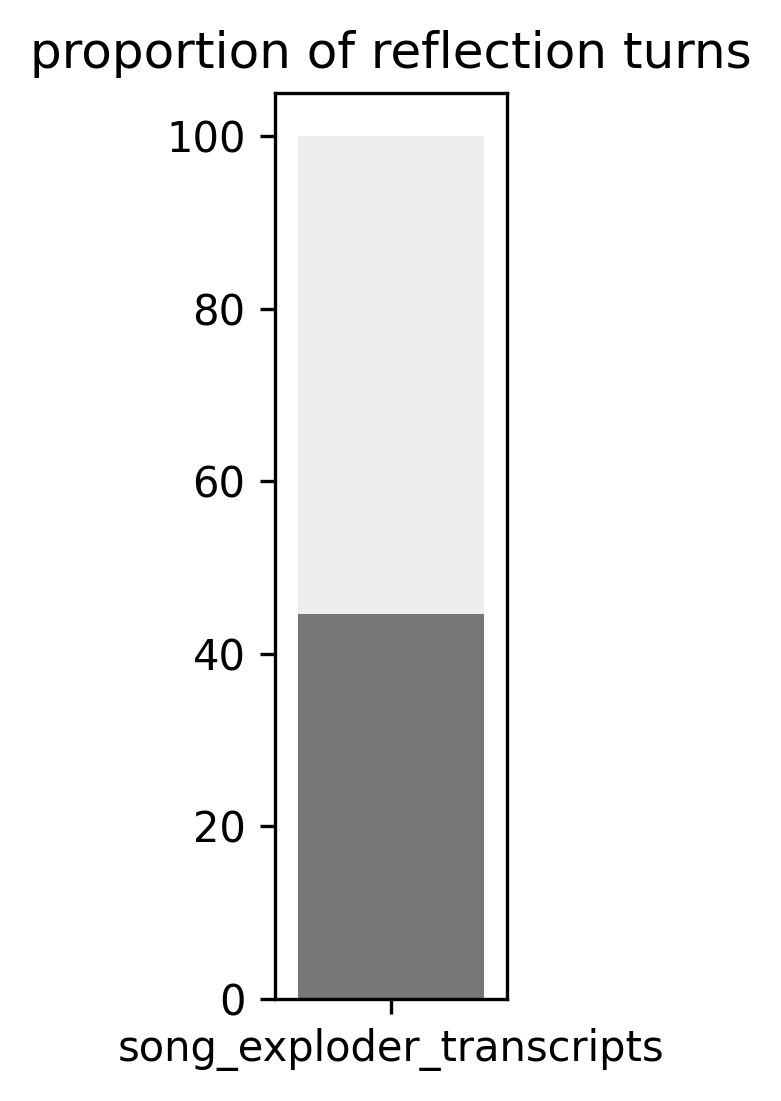

In [13]:
plot_cats_by_dataset(df, 'reflection', normalize=True)


In [14]:
def plot_cats_by_session(df, dataset_name, category, color='default', normalize=False):
    dataset_df = df[df['dataset'] == dataset_name]
    dataset_category_df = dataset_df[dataset_df[category] > 0]
    sessions = sorted(list(set(dataset_df['session'])))
    num_sessions = len(sessions)
    fig = plt.figure(figsize=[num_sessions,4], dpi=300)
    if normalize == False :
        p=sns.countplot(data=dataset_df, x='session', color='#eee', order=sessions)
        p=sns.countplot(data=dataset_category_df, x='session', color='#777', order=sessions)
        p.set_title('proportion of ' + category + ' turns')
    else :
        total_turns_list = []
        category_turns_list = []
        for session in sessions :
            total_turns = dataset_df[dataset_df['session'] == session].shape[0]
            category_turns = dataset_category_df[dataset_category_df['session'] == session].shape[0]
            total_turns_normalized = 100
            category_turns_normalized = category_turns/total_turns * 100
            total_turns_list.append(total_turns_normalized)
            category_turns_list.append(category_turns_normalized)
        p=sns.barplot(x=sessions, y=total_turns_list, orient='v', color='#eee')
        p=sns.barplot(x = sessions, y=category_turns_list, orient='v', color='#777')
    p.set_title('proportion of ' + category + ' turns')
    p.set_xticklabels(sessions, rotation=30, ha='right')
    # plt.savefig('plots/empath'+category+'-'+dataset_name+'-turns-count-by-session.pdf', bbox_inches='tight')
    plt.show()


In [15]:
set(list(df['session']))

{'100-gecs',
 'apparat',
 'arlo-parks',
 'aurora',
 'bat-for-lashes',
 'big-thief',
 'billie-eilish',
 'black-pumas',
 'bon-iver',
 'brittany-howard',
 'caribou',
 'cheap-trick',
 'clairo',
 'common',
 'deftones',
 'denzel-curry',
 'dua-lipa',
 'eric-nam',
 'fka-twigs',
 'foushee',
 'girl-in-red',
 'glass-animals',
 'haim',
 'imagine-dragons',
 'jamila-woods',
 'jay-som',
 'jewel',
 'jon-batiste',
 'kelly-lee-owens',
 'khruangbin',
 'laura-marling',
 'lianne-la-havas',
 'meek-mill',
 'mobb-deep',
 'mumford-and-sons',
 'nakhane',
 'nathaniel-rateliff',
 'panda-bear',
 'phoebe-bridgers',
 'pj-morton',
 'porter-robinson',
 'raleigh-ritchie',
 'raphael-saadiq',
 'robyn',
 'run-the-jewels',
 'sasha-sloan',
 'selena-gomez',
 'semisonic',
 'sharon-van-etten',
 'sheryl-crow',
 'sleater-kinney',
 'slipknot',
 'soccer-mommy',
 'sparks',
 'tame-impala',
 'the-1975',
 'the-cranberries',
 'the-mountain-goats',
 'vagabon',
 'vampire-weekend',
 'waxahatchee',
 'wonderly',
 'yusuf-cat-stevens'}

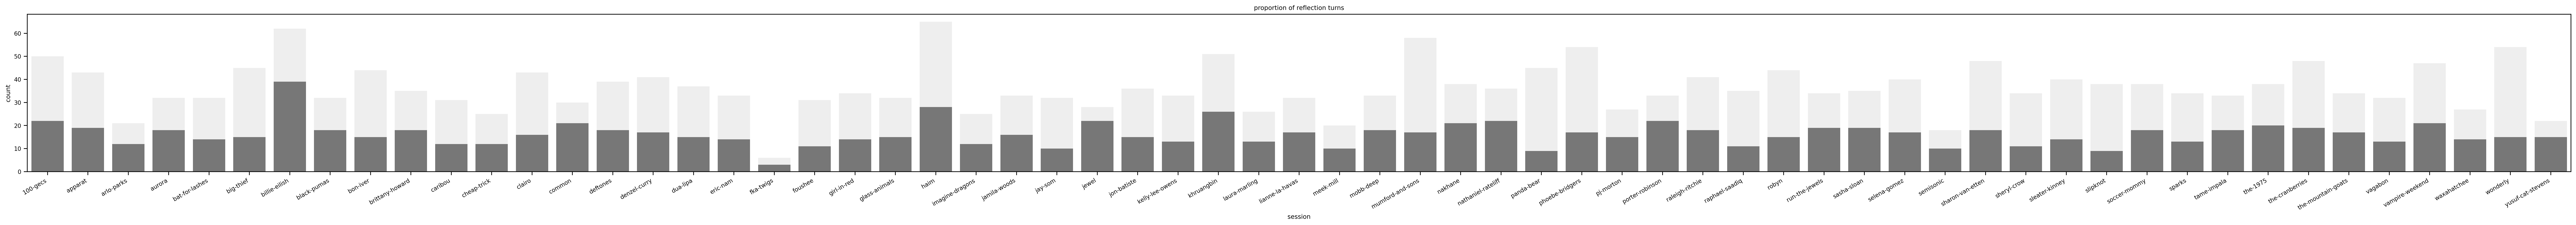

In [16]:
sns.set_context("paper", font_scale=0.9)
plot_cats_by_session(df, 'song_exploder_transcripts', 'reflection', normalize=False)


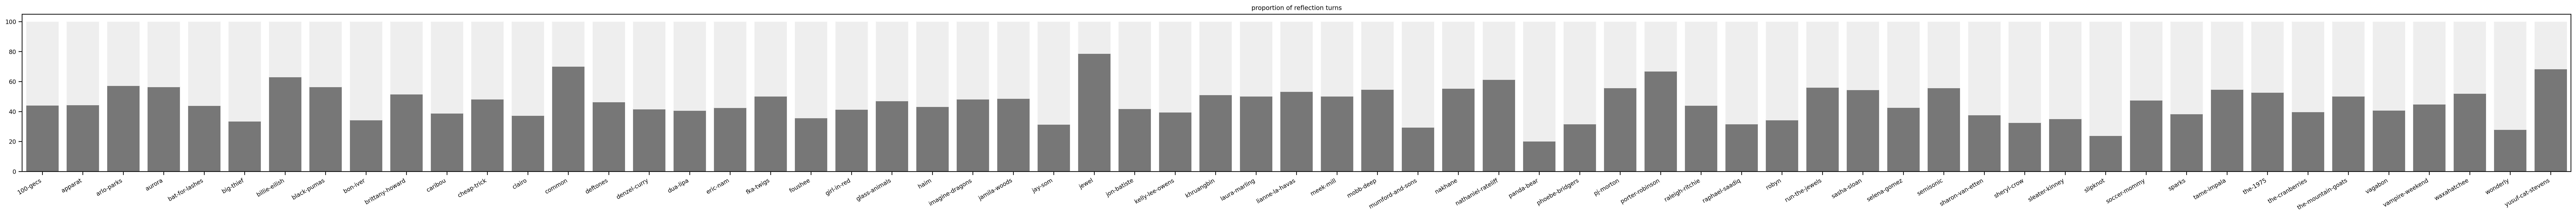

In [17]:
plot_cats_by_session(df, 'song_exploder_transcripts', 'reflection', normalize=True)


In [18]:
def plot_cats_by_speaker(df, dataset, category):
    sessions = list(set(df[df['dataset'] == dataset]['session']))
    for session in sessions :
        session_df = df[df['session'] == session]
        session_category_df = df[(df['session'] == session) & (df[category] > 0)]
        speakers = sorted(list(set(session_df['speaker'])))
        num_speakers = len(speakers)
        fig = plt.figure(figsize=[num_speakers,4], dpi=300)
        p=sns.countplot(data=session_df, x='speaker', color='#eee', order=speakers)
        p=sns.countplot(data=session_category_df, x='speaker', color='#777', order=speakers)
        p.set_title(category + ' turns count | ' + dataset + ' | ' + session)
        # plt.savefig('plots/empath'+category+'-turns-count-'+ dataset +'-'+ session +'.pdf', bbox_inches='tight')
        plt.show()


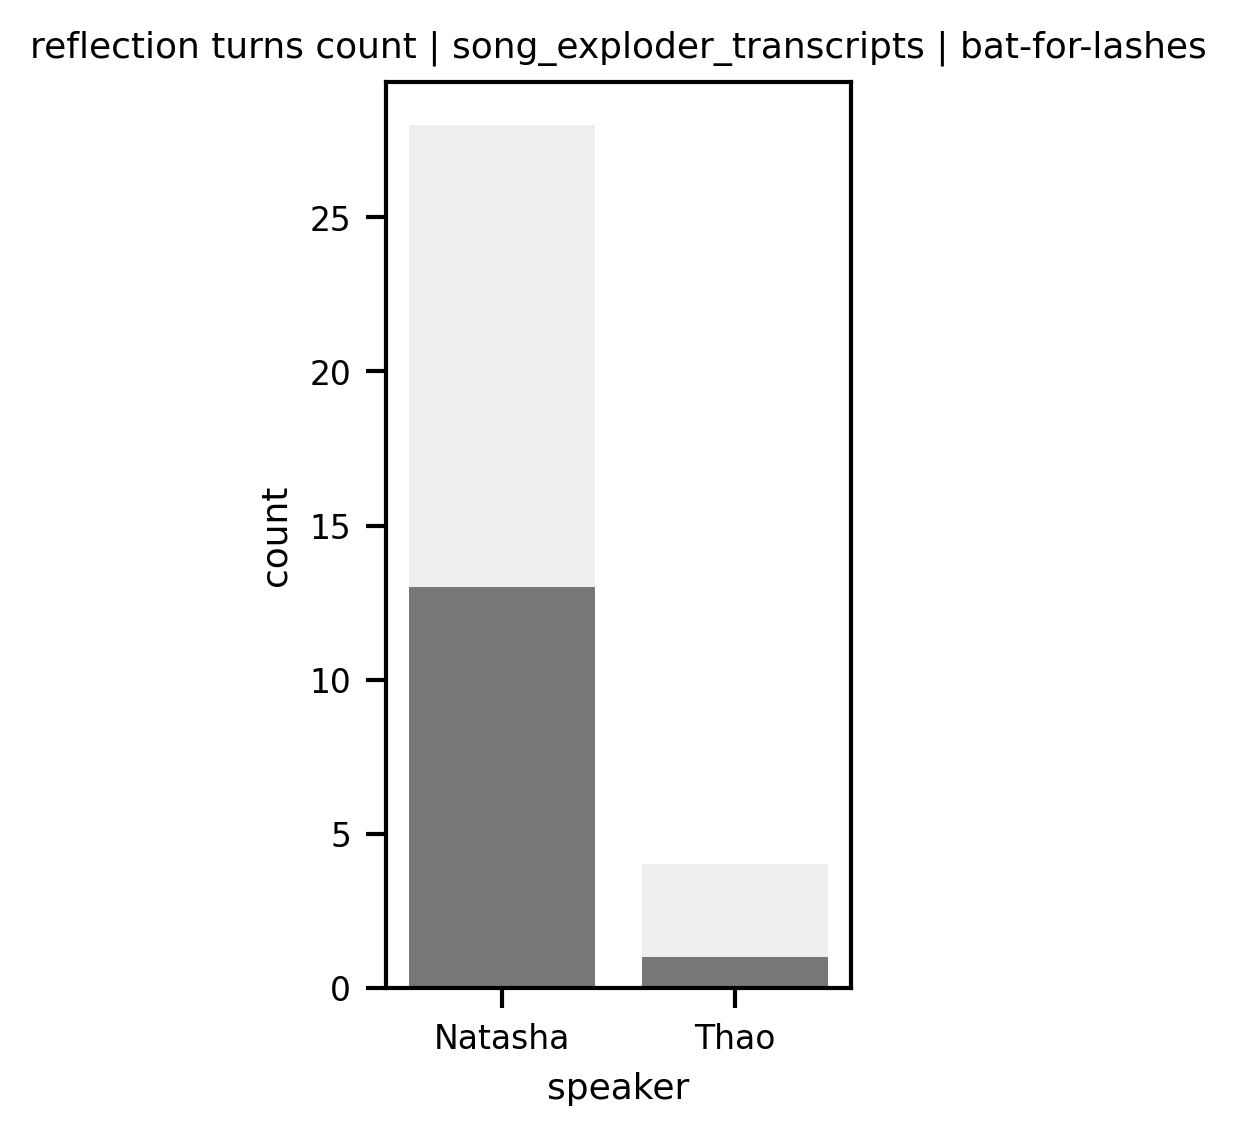

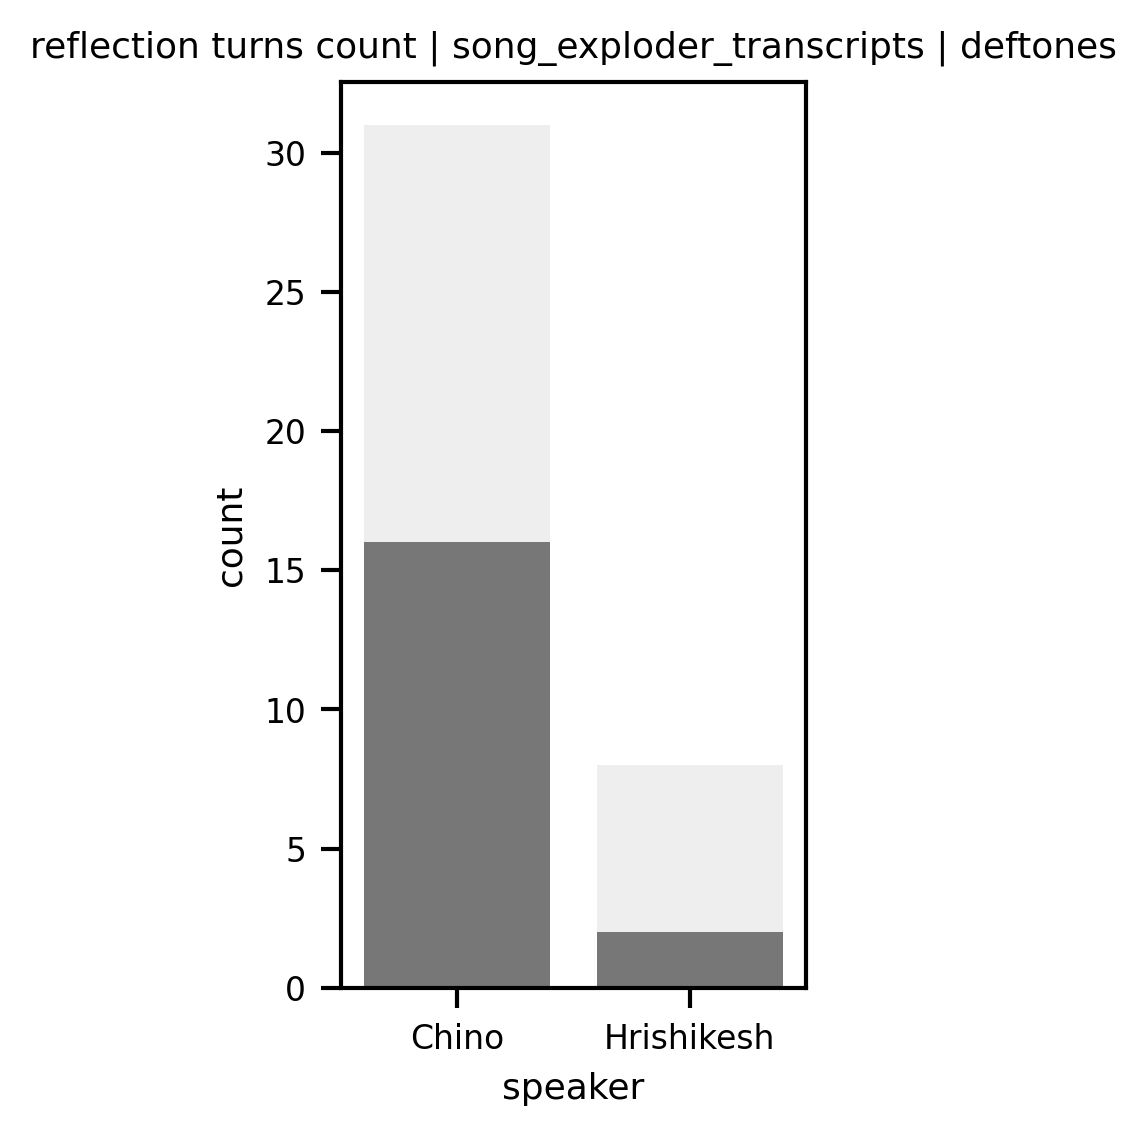

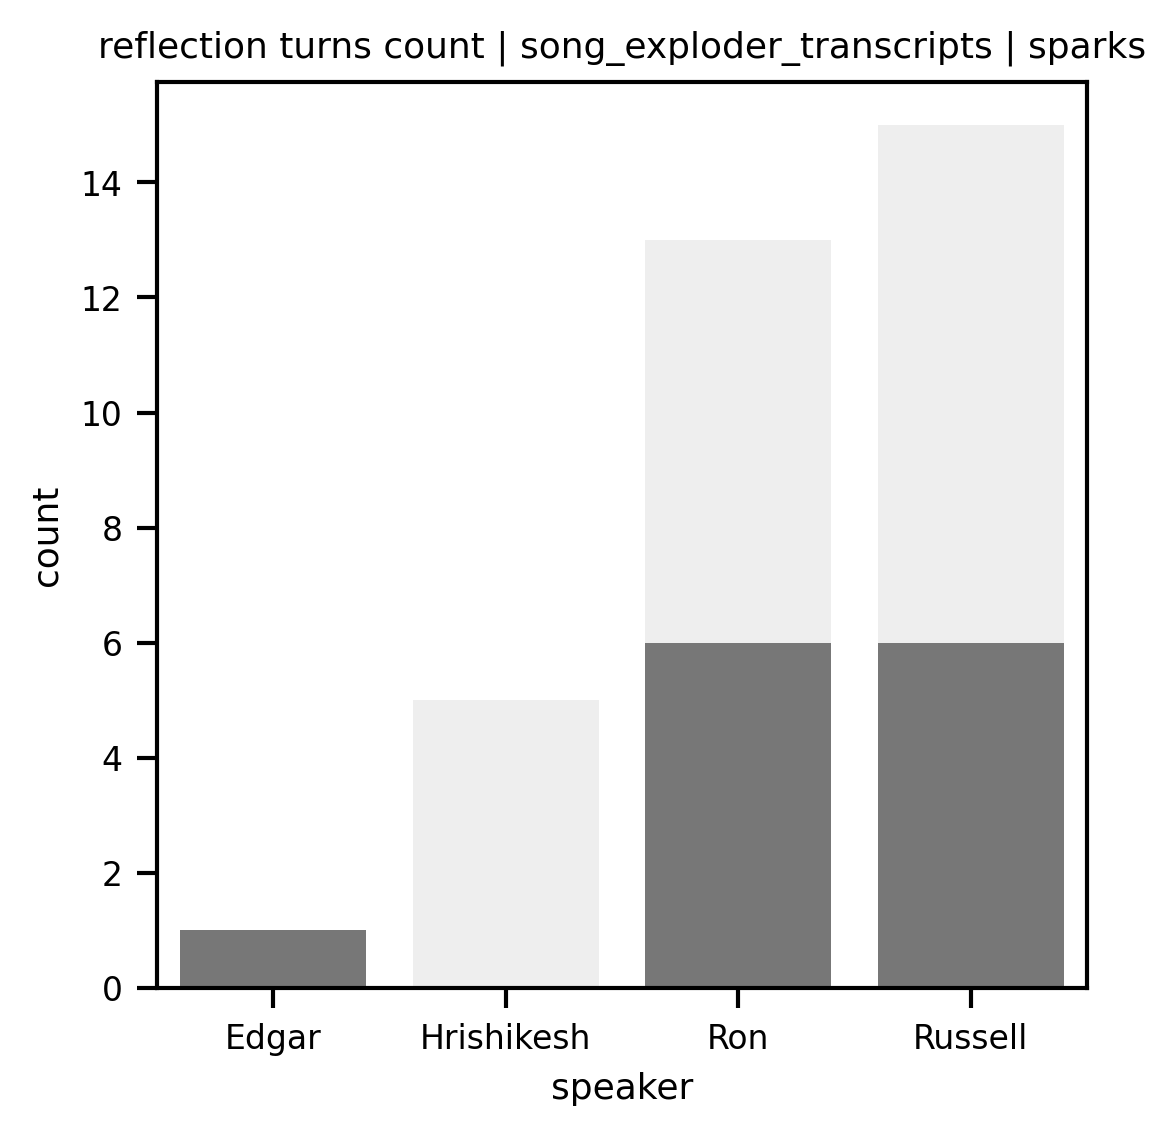

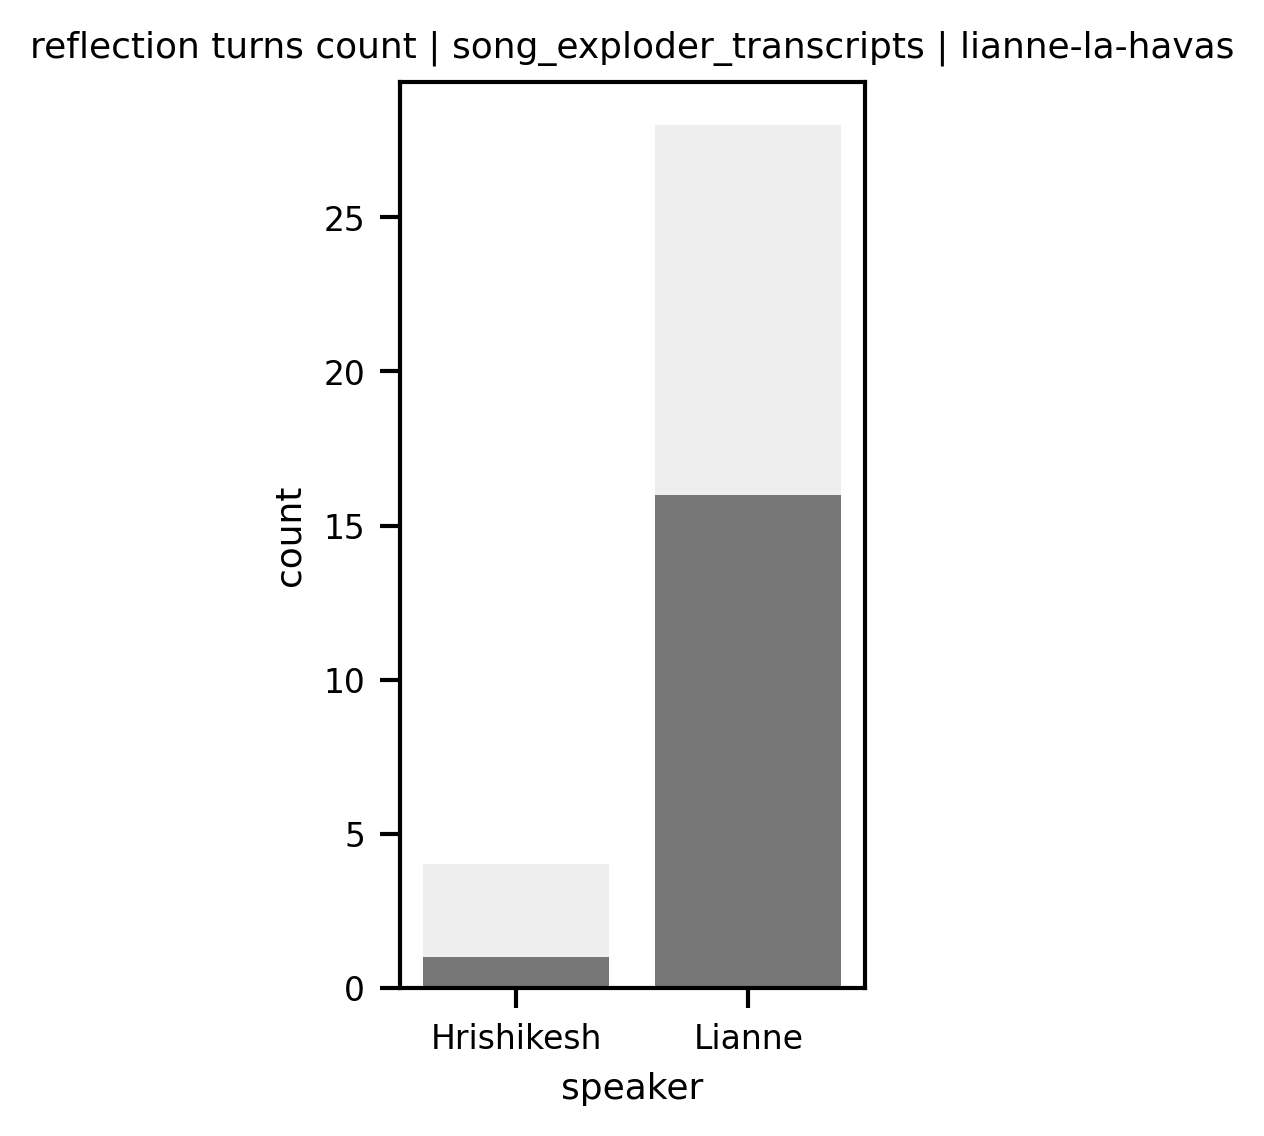

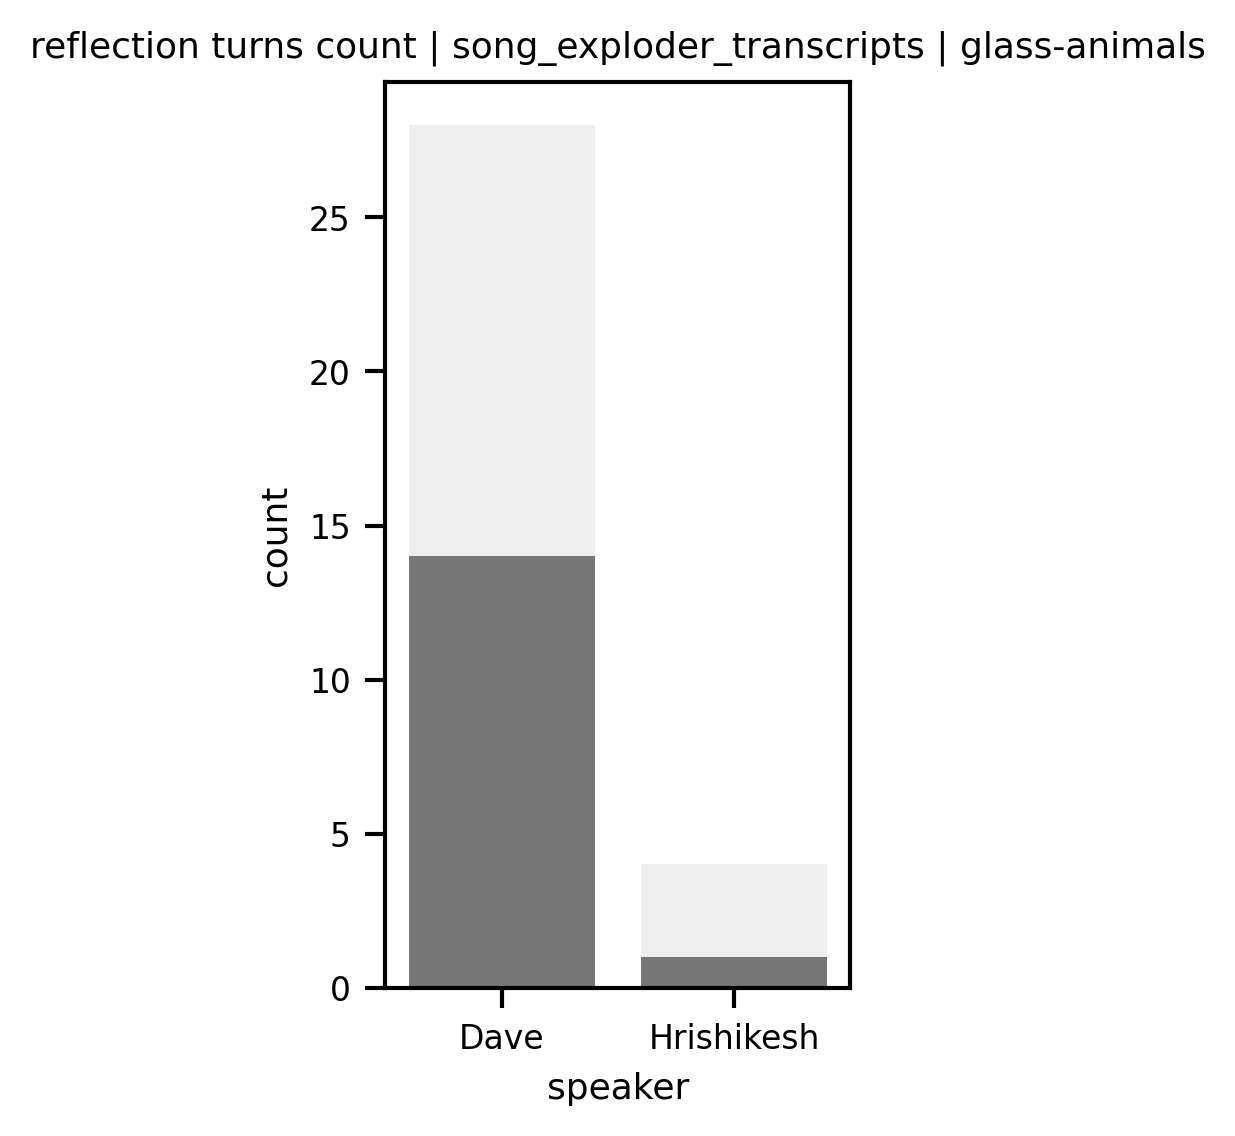

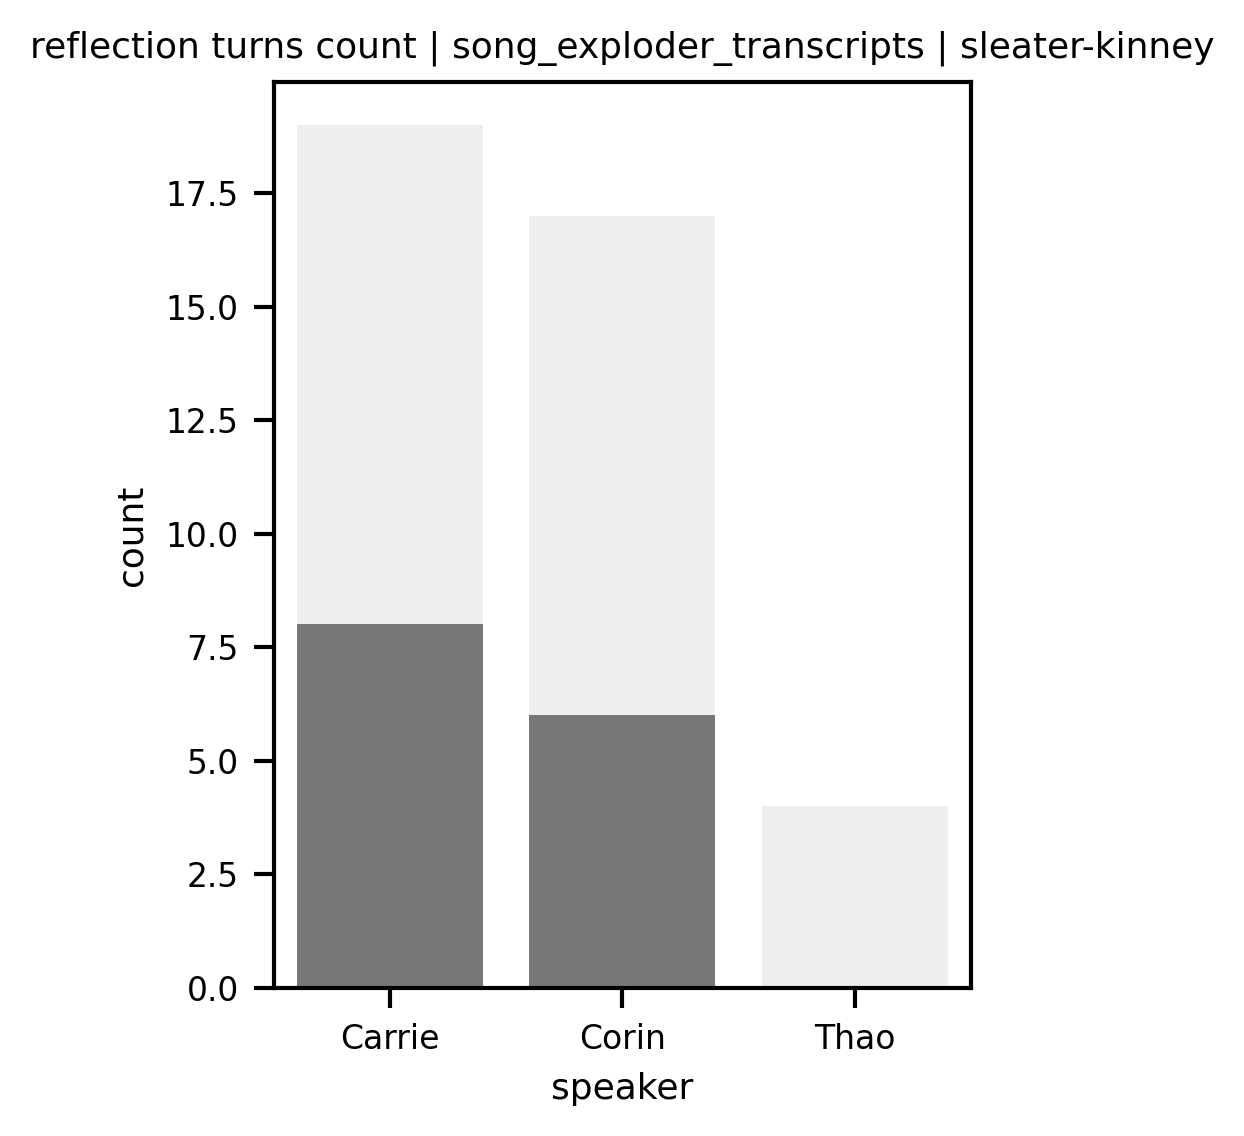

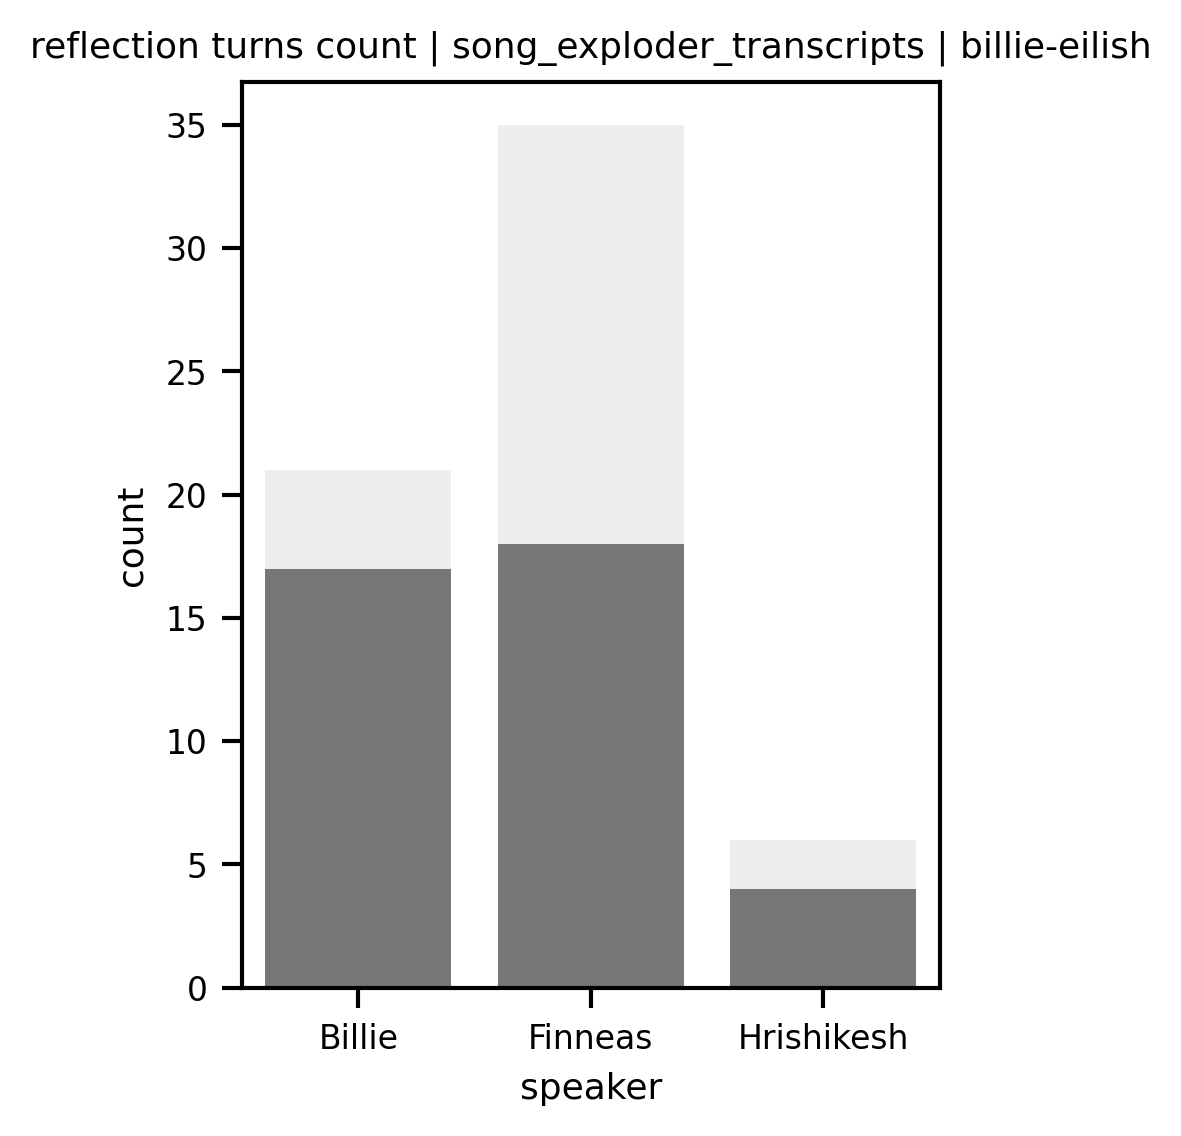

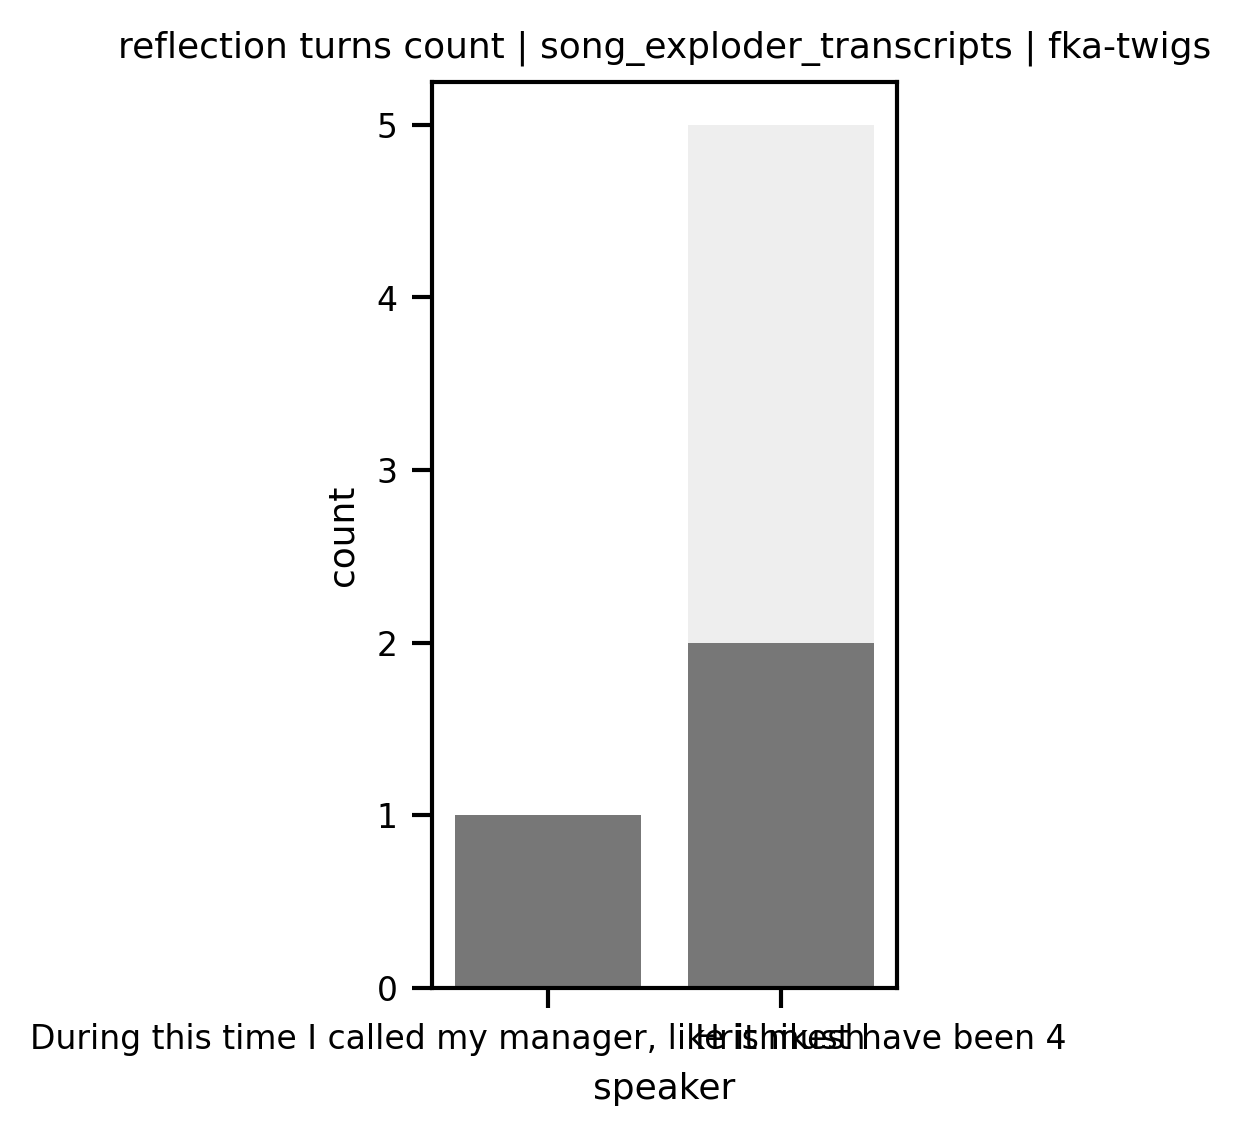

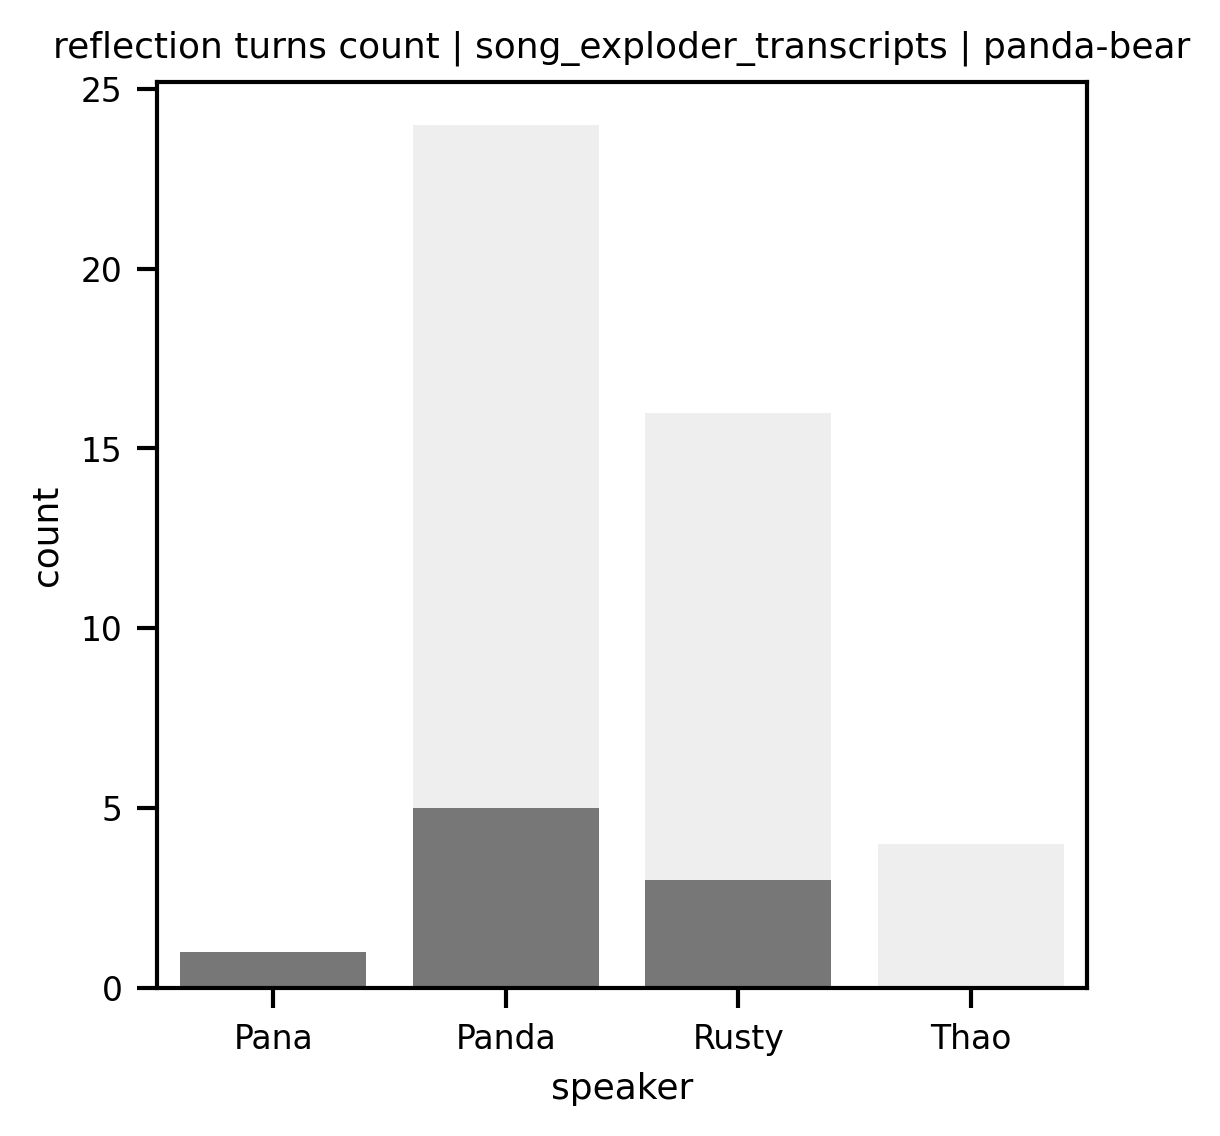

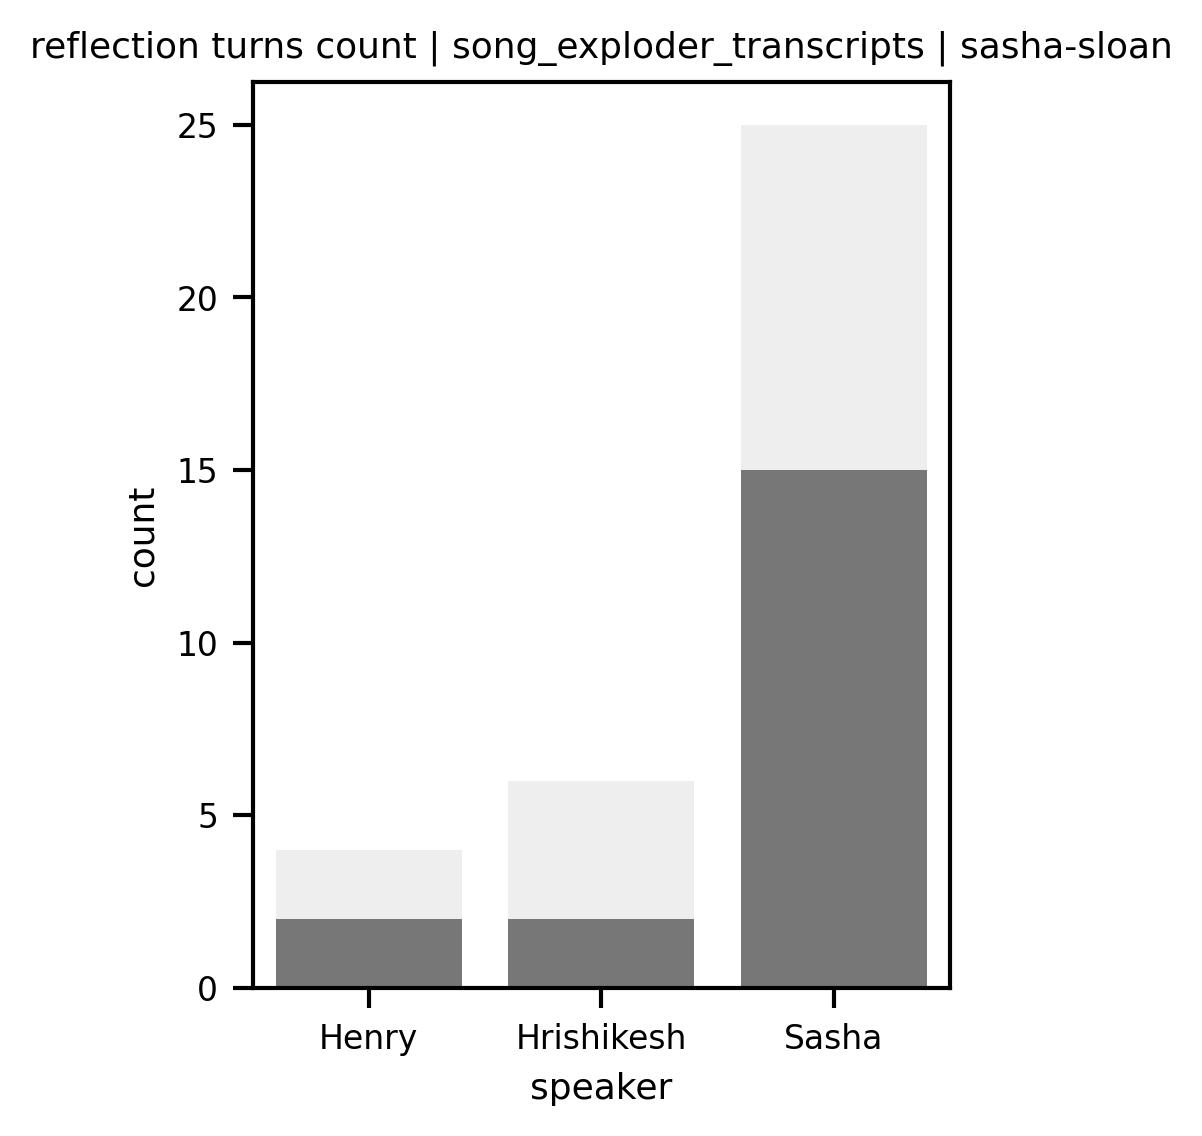

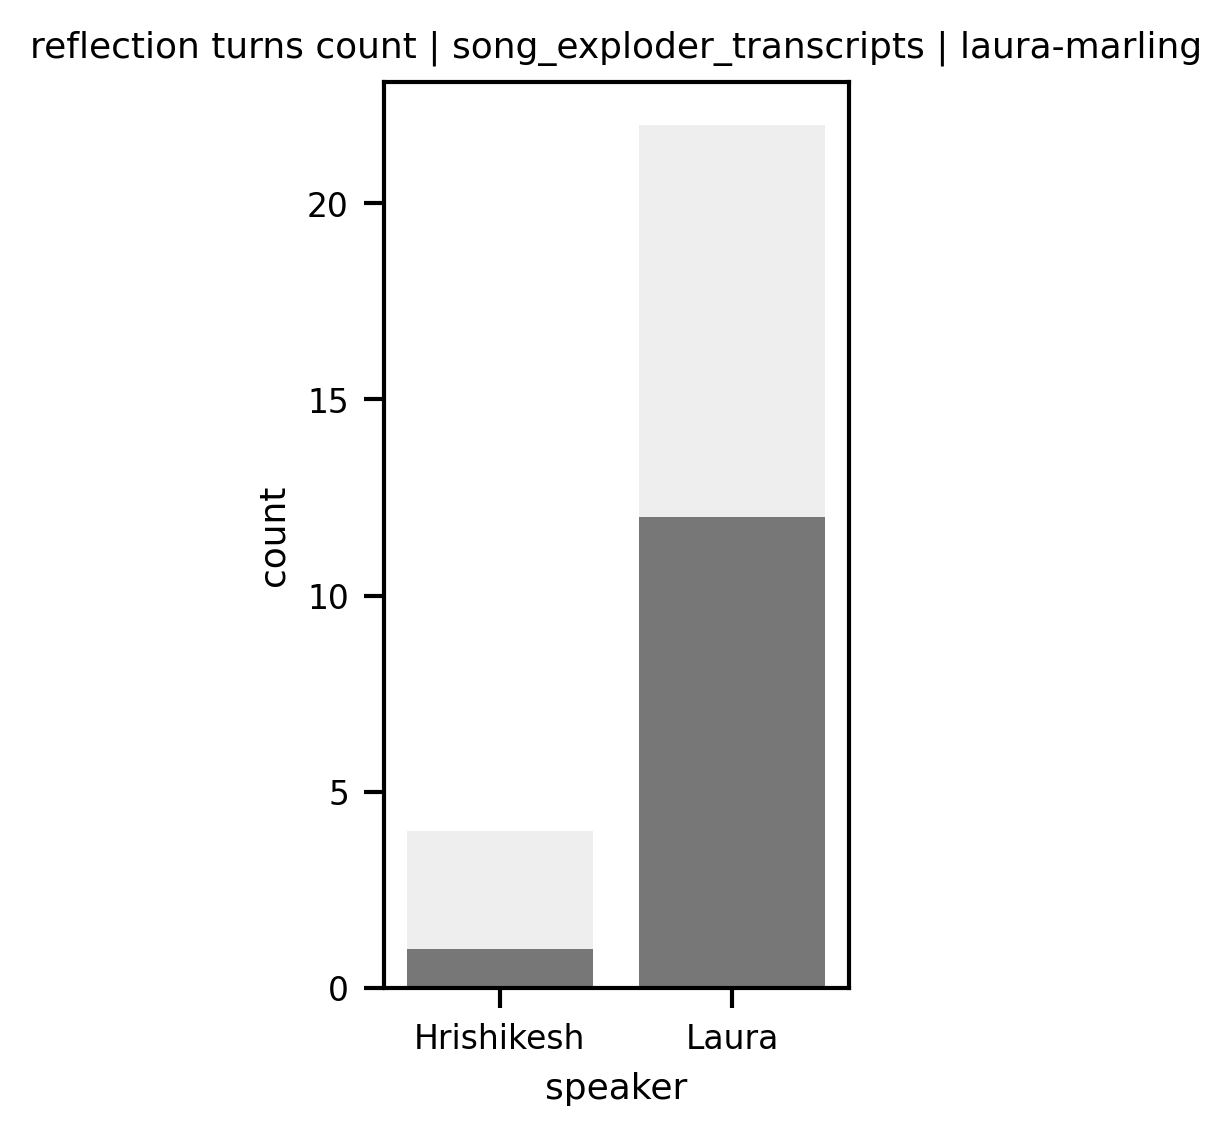

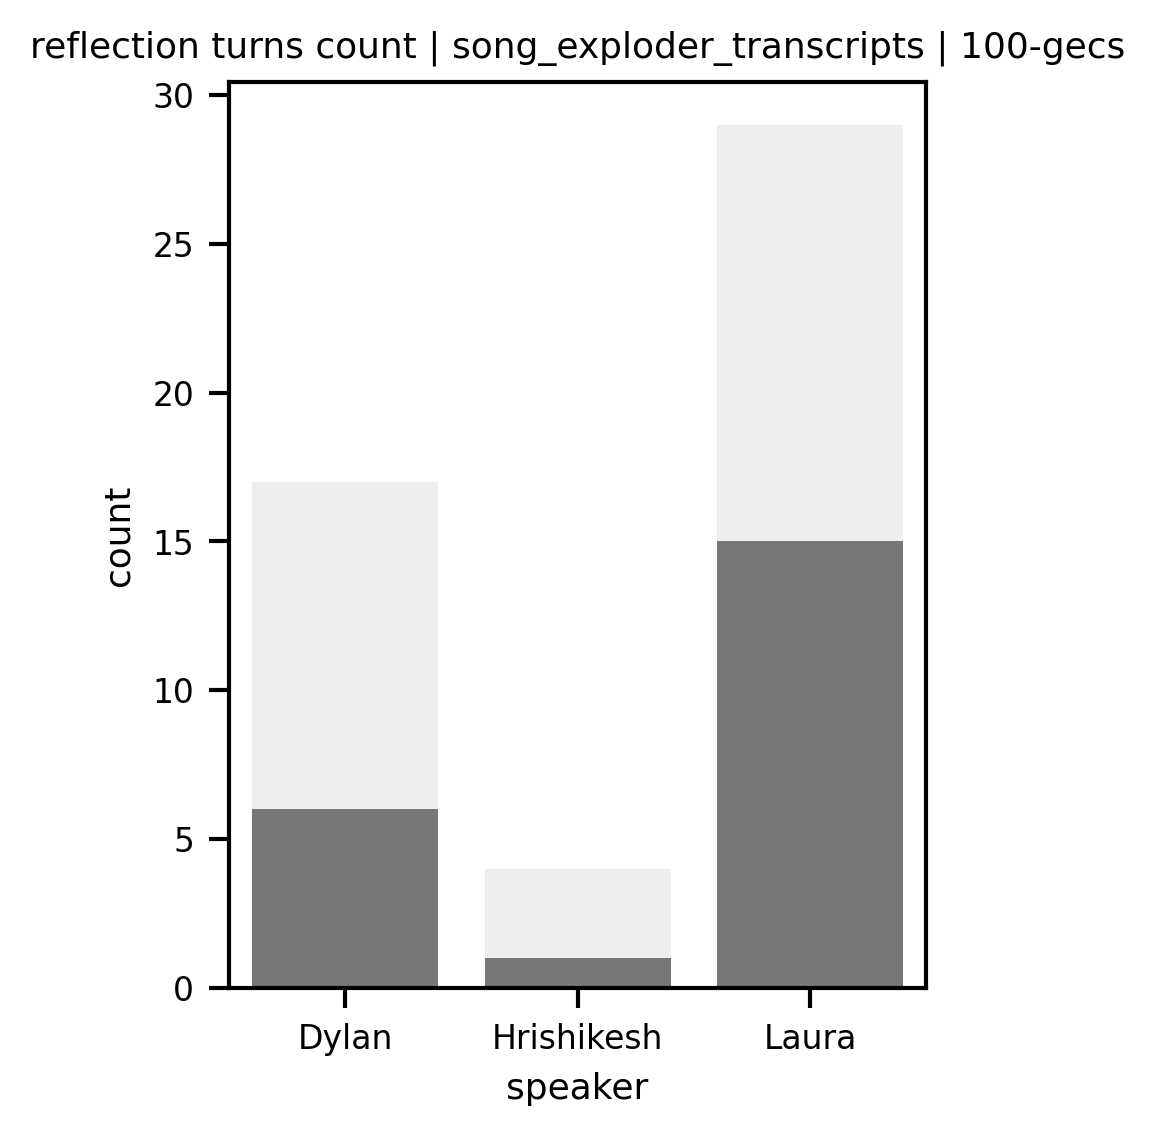

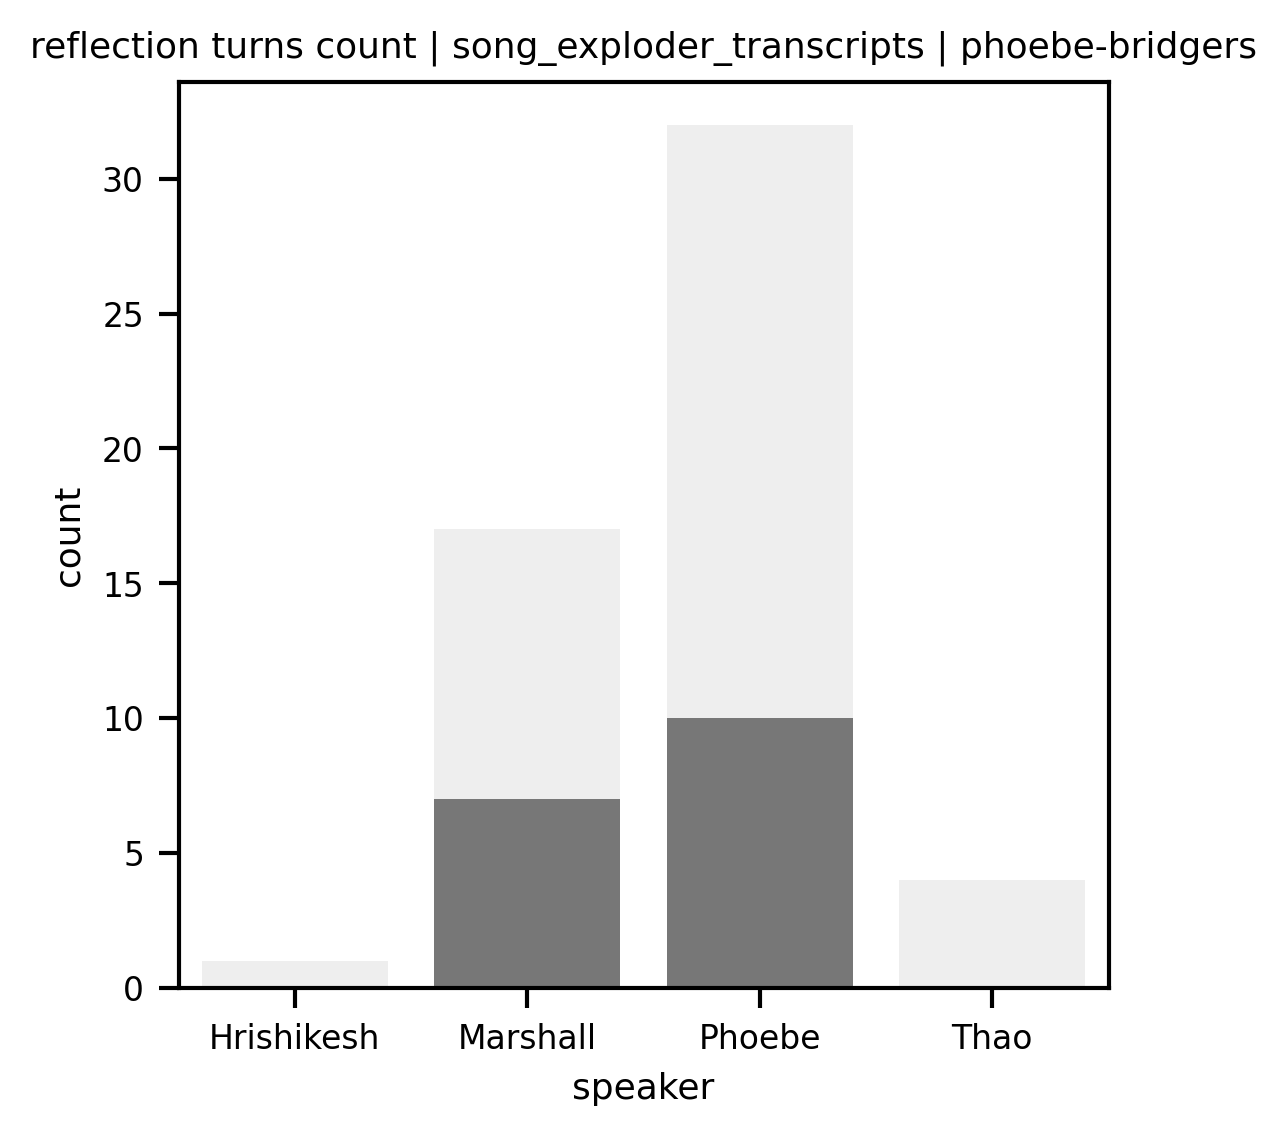

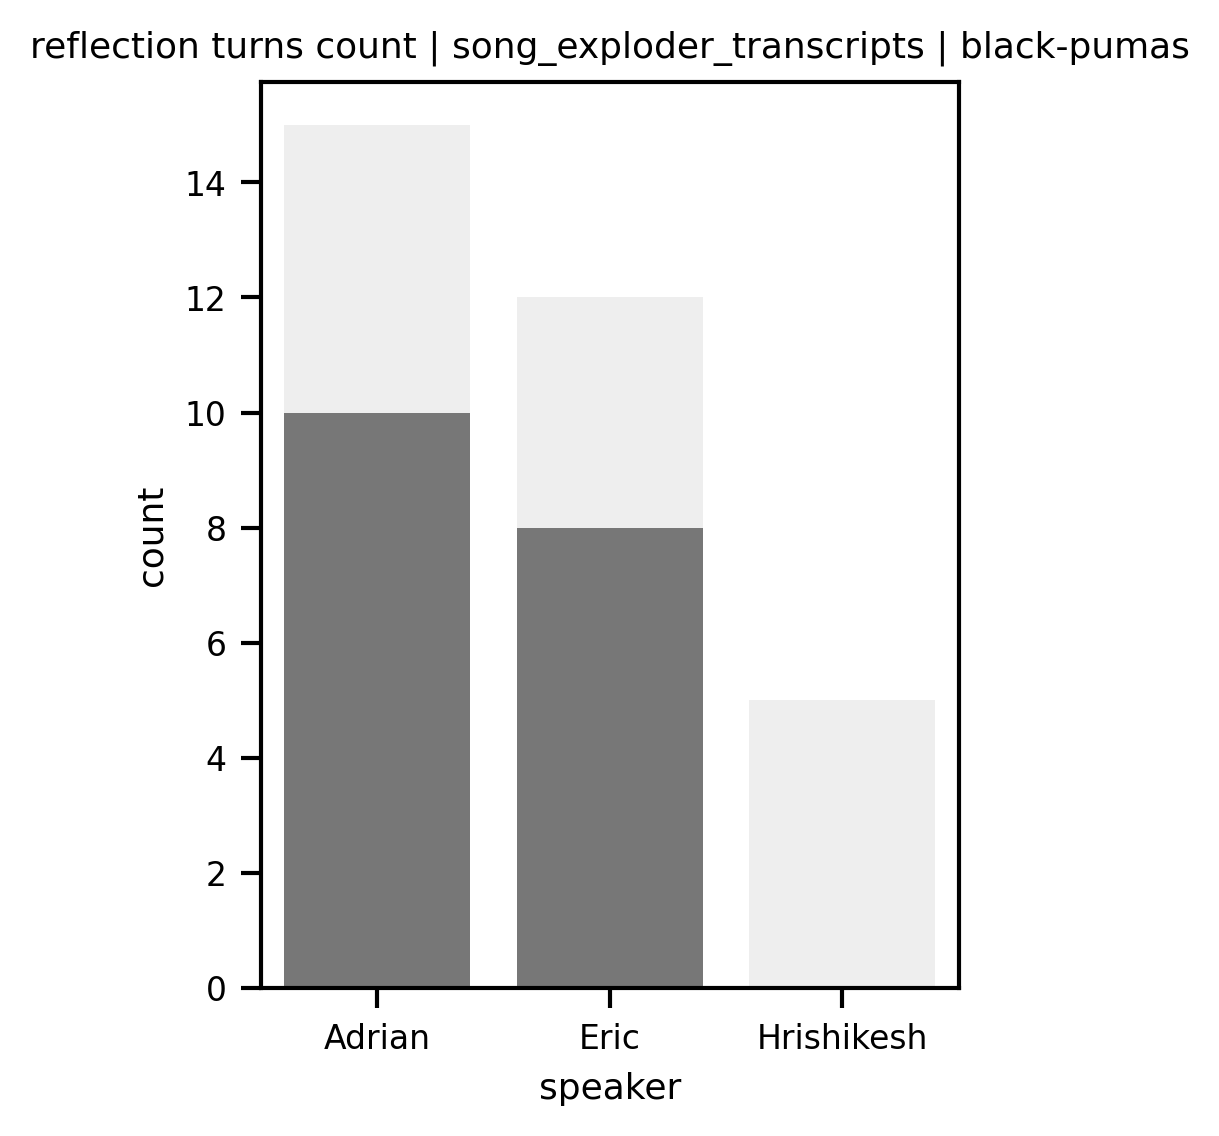

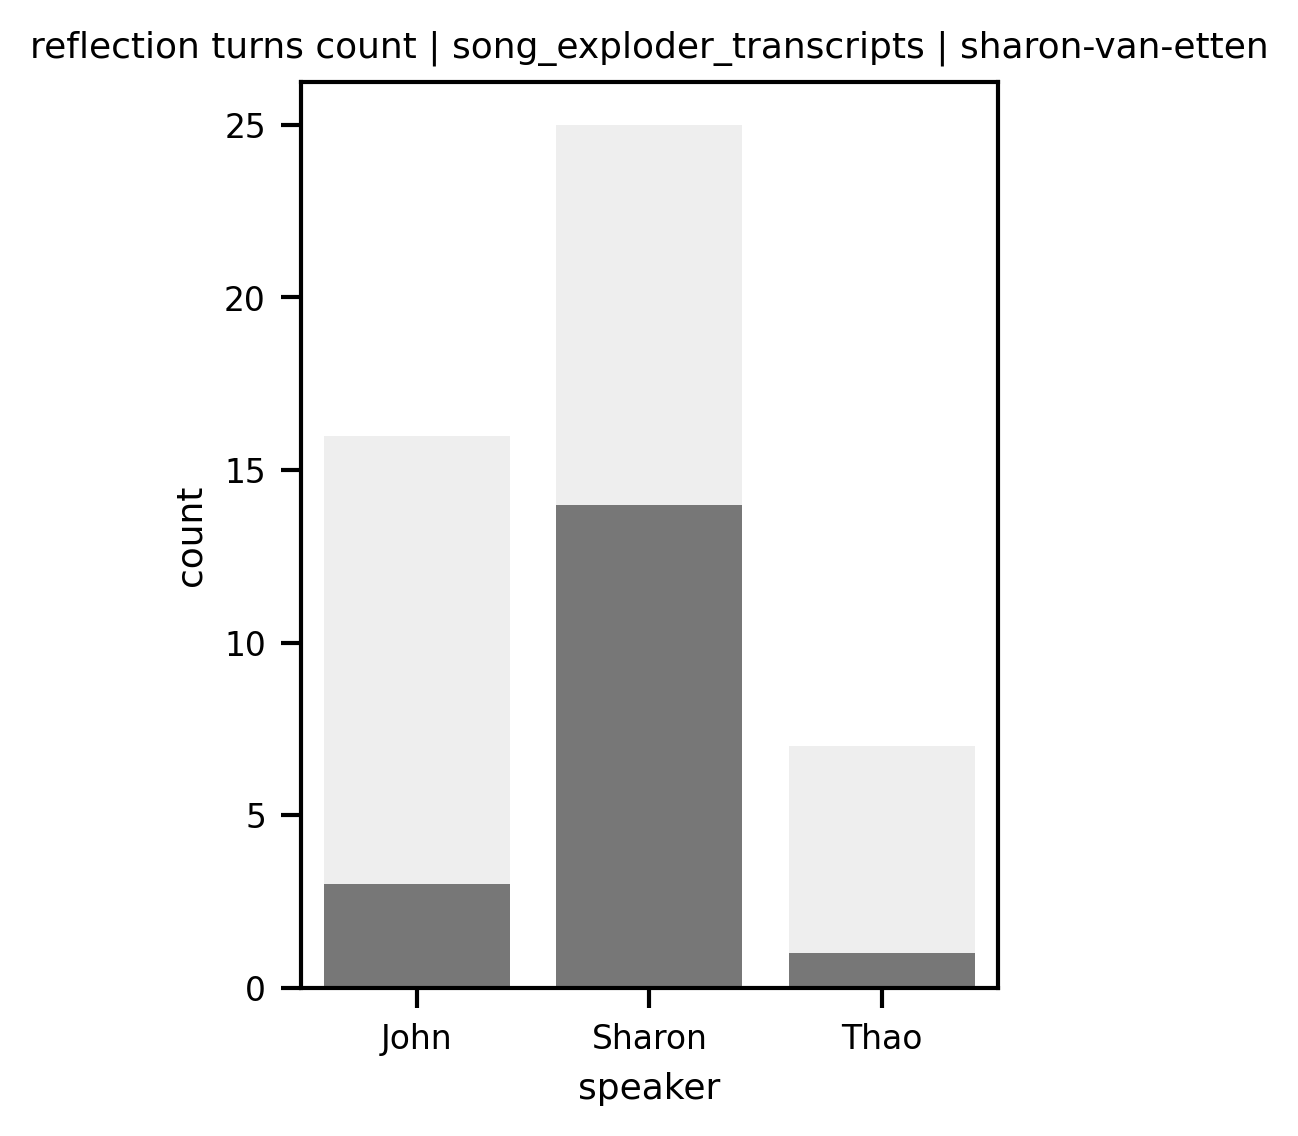

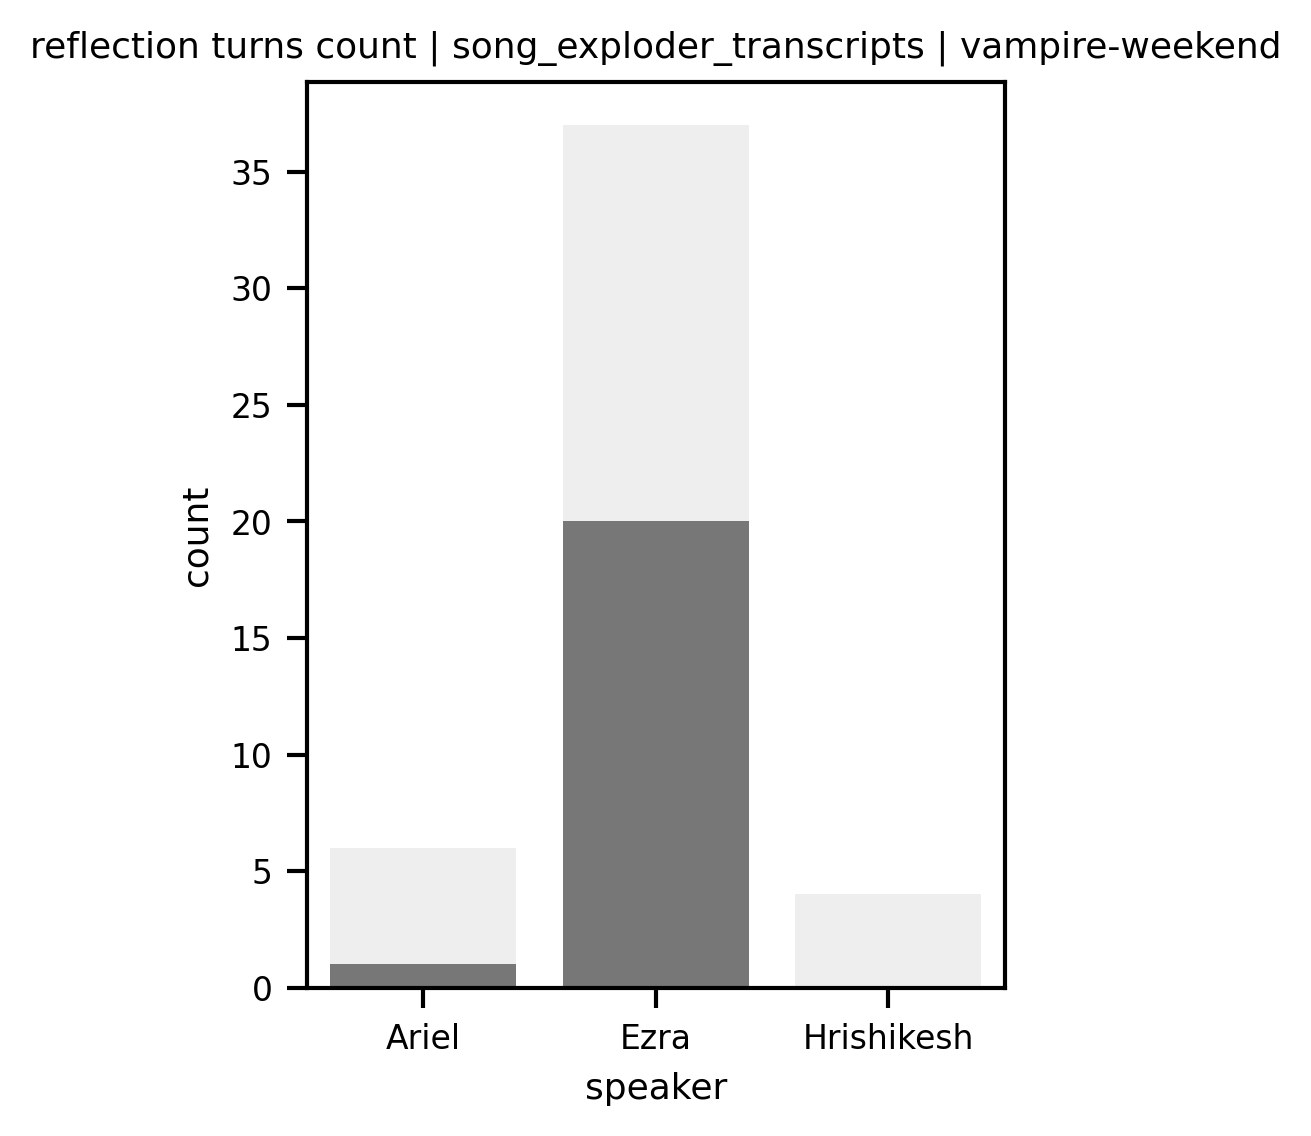

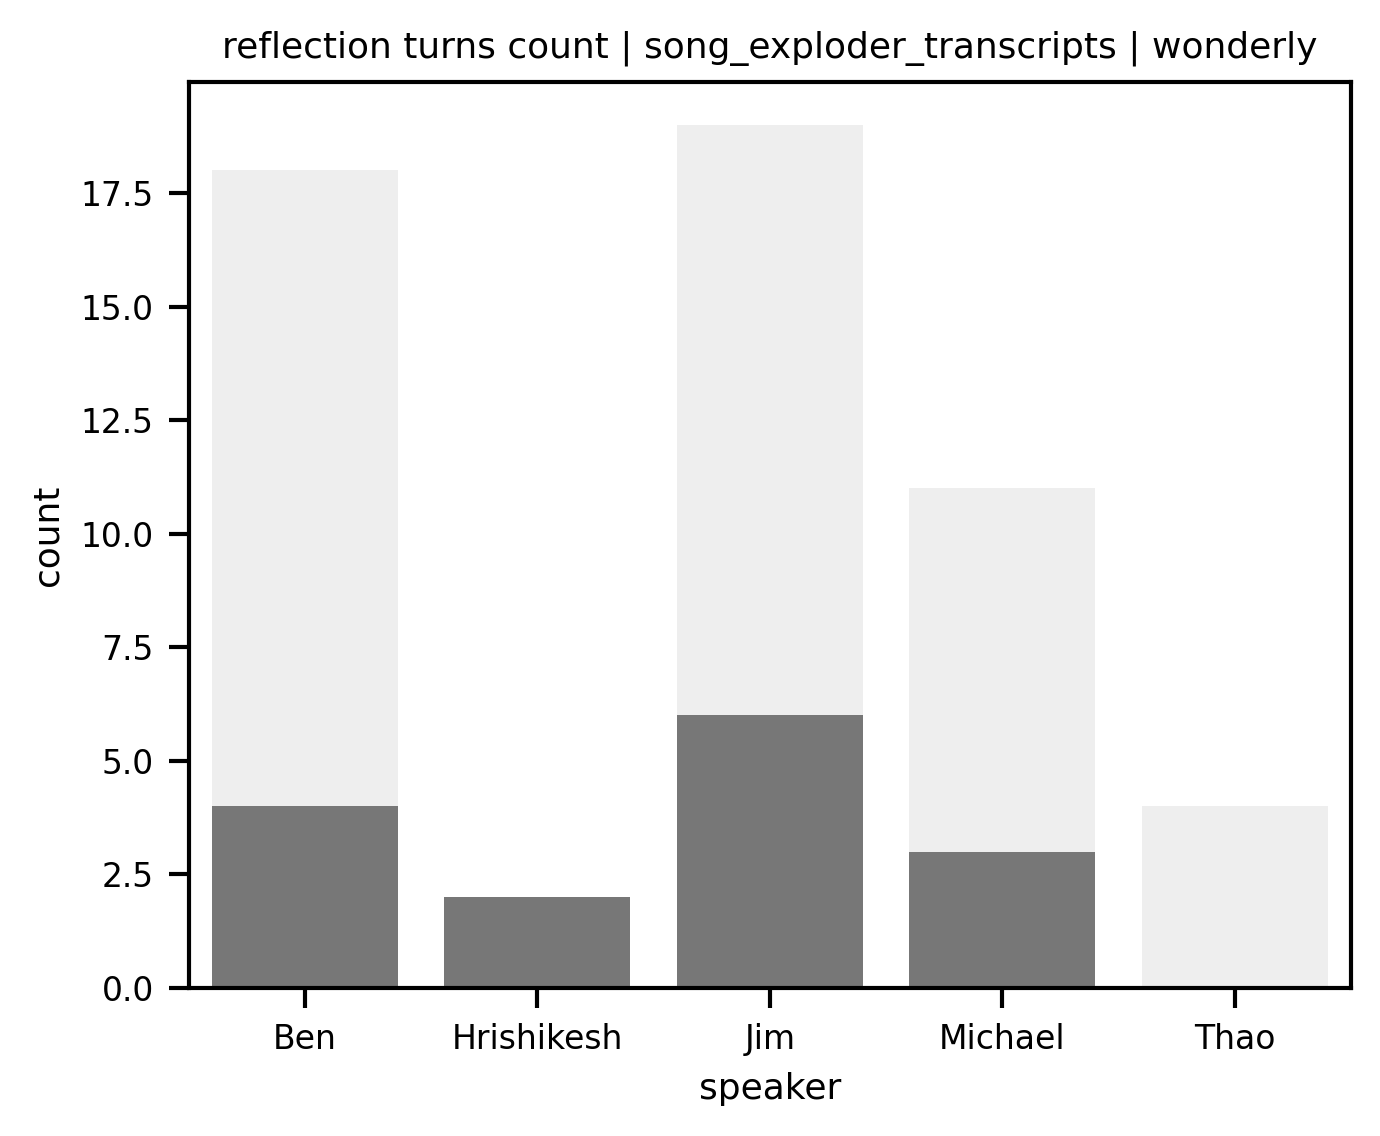

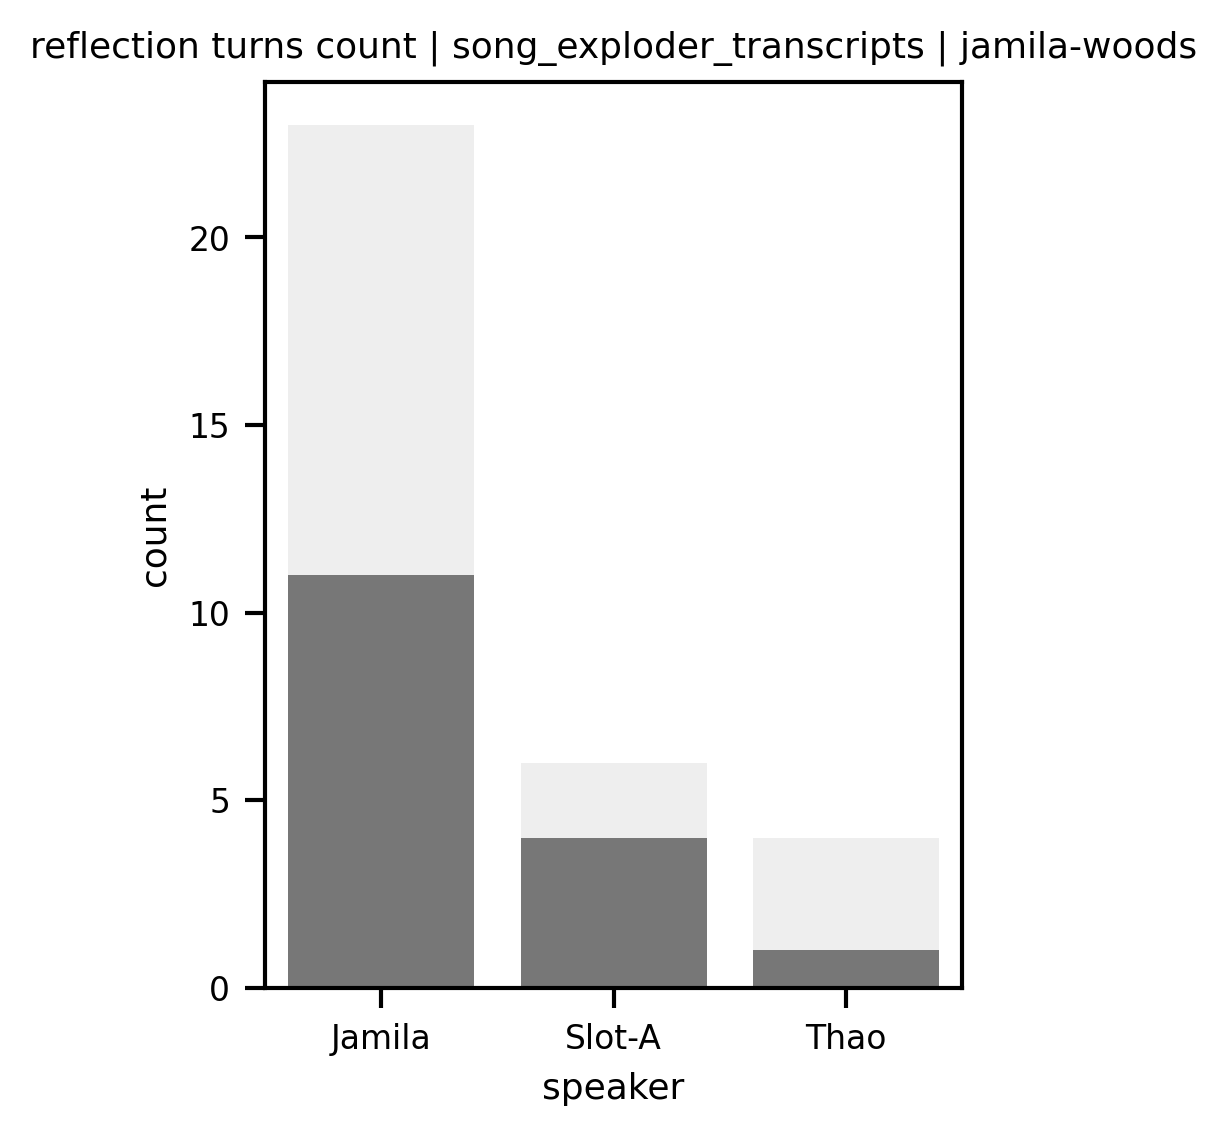

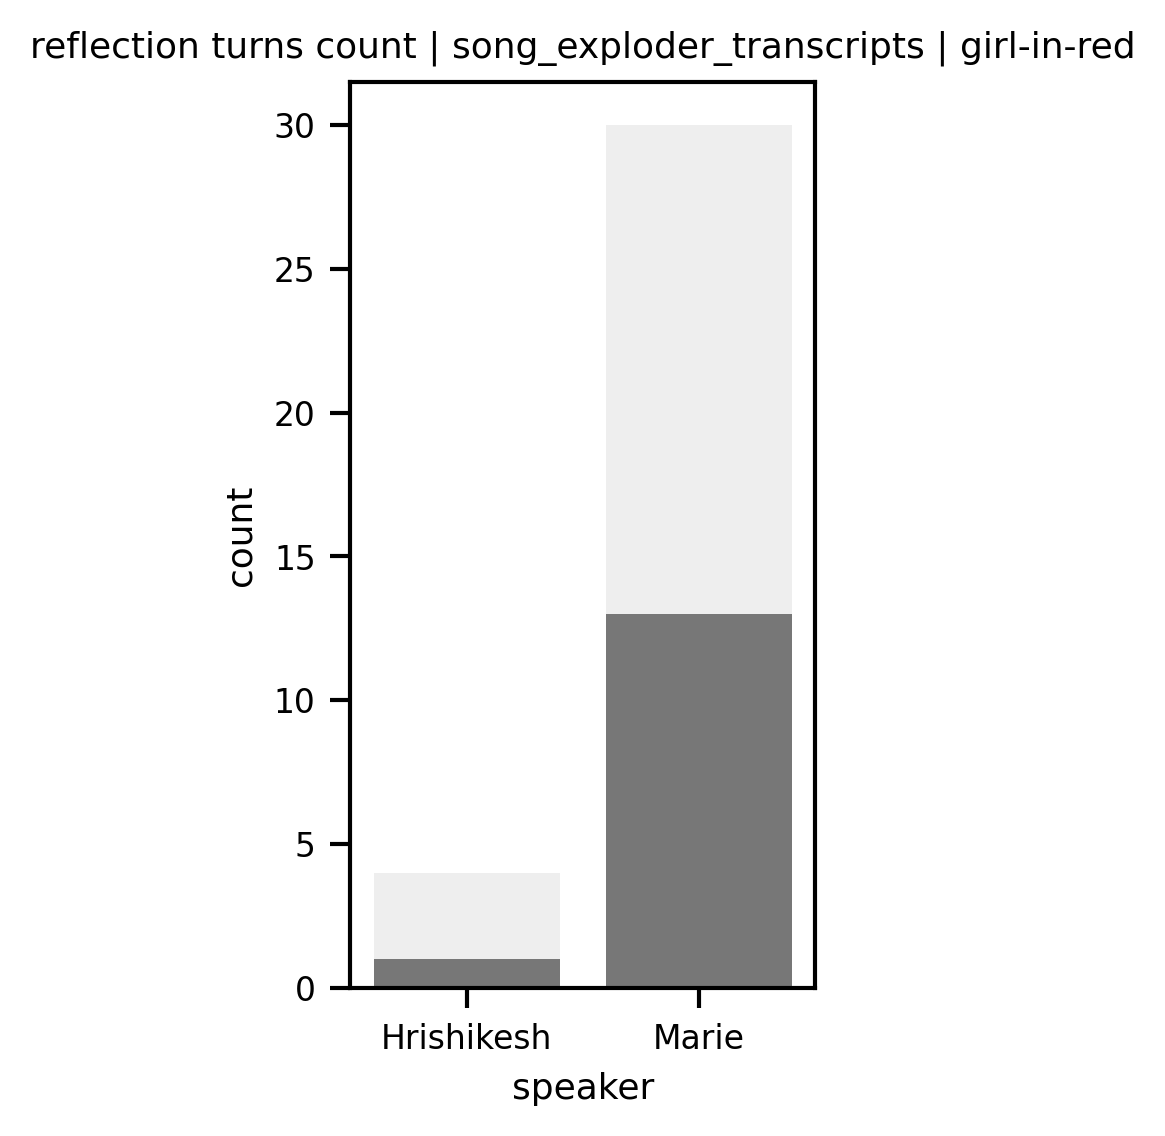

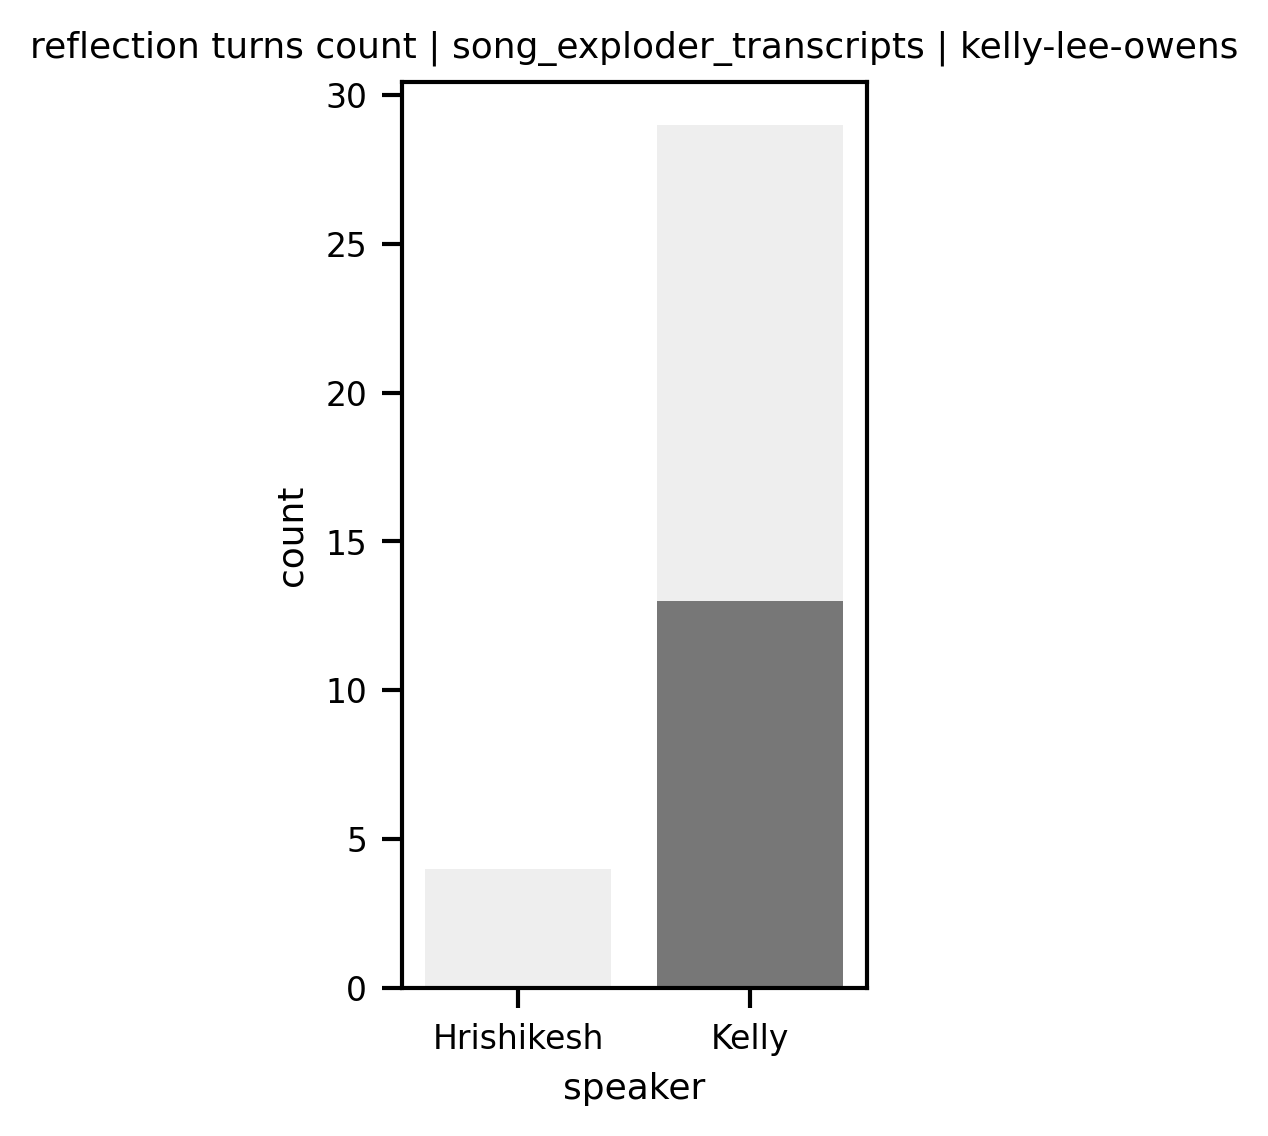

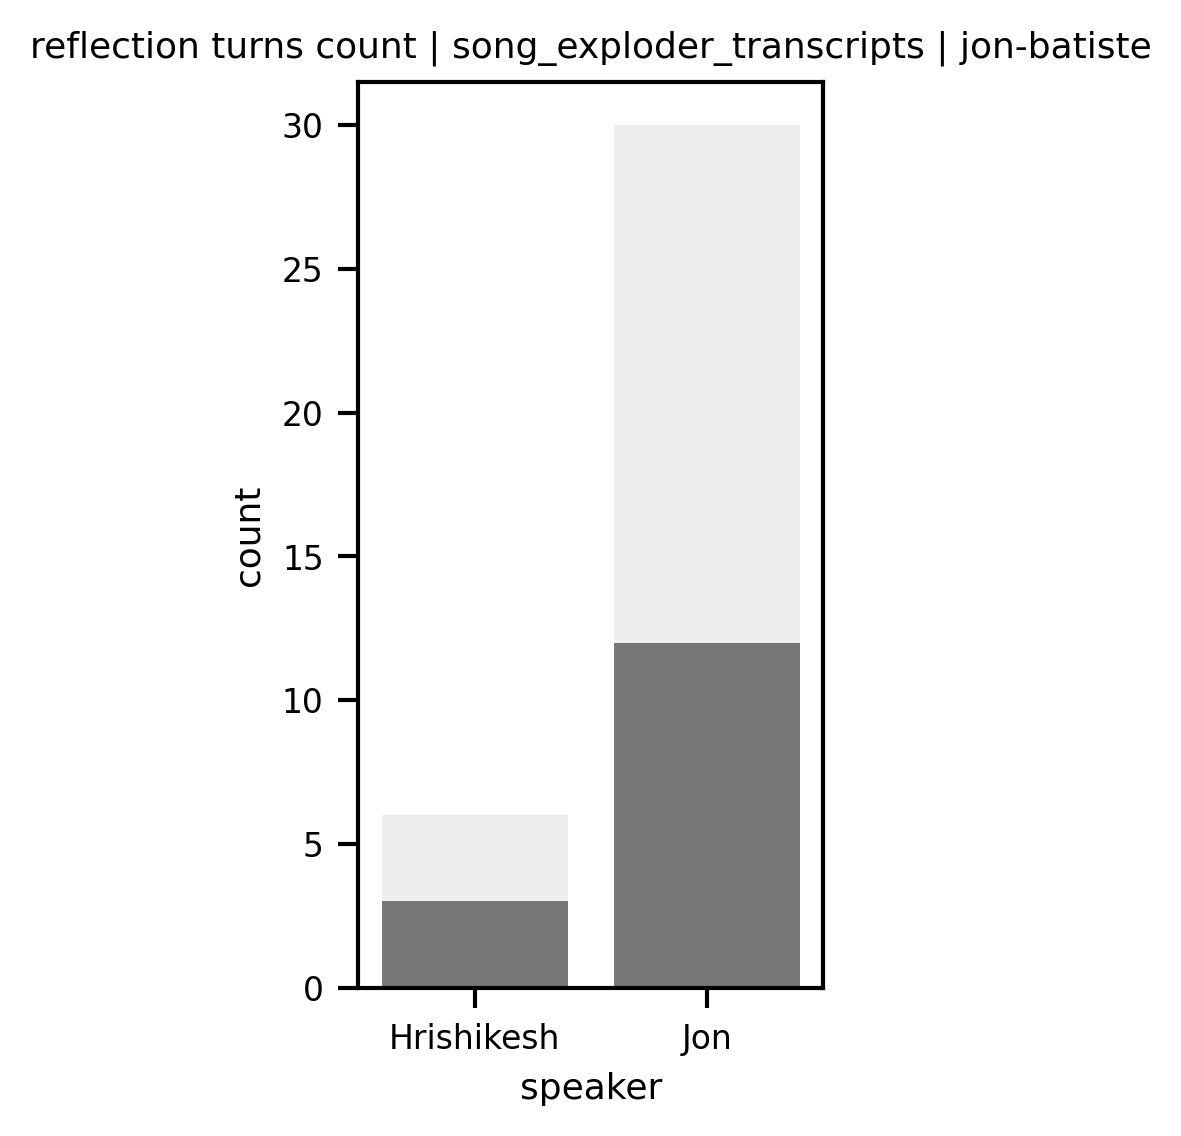

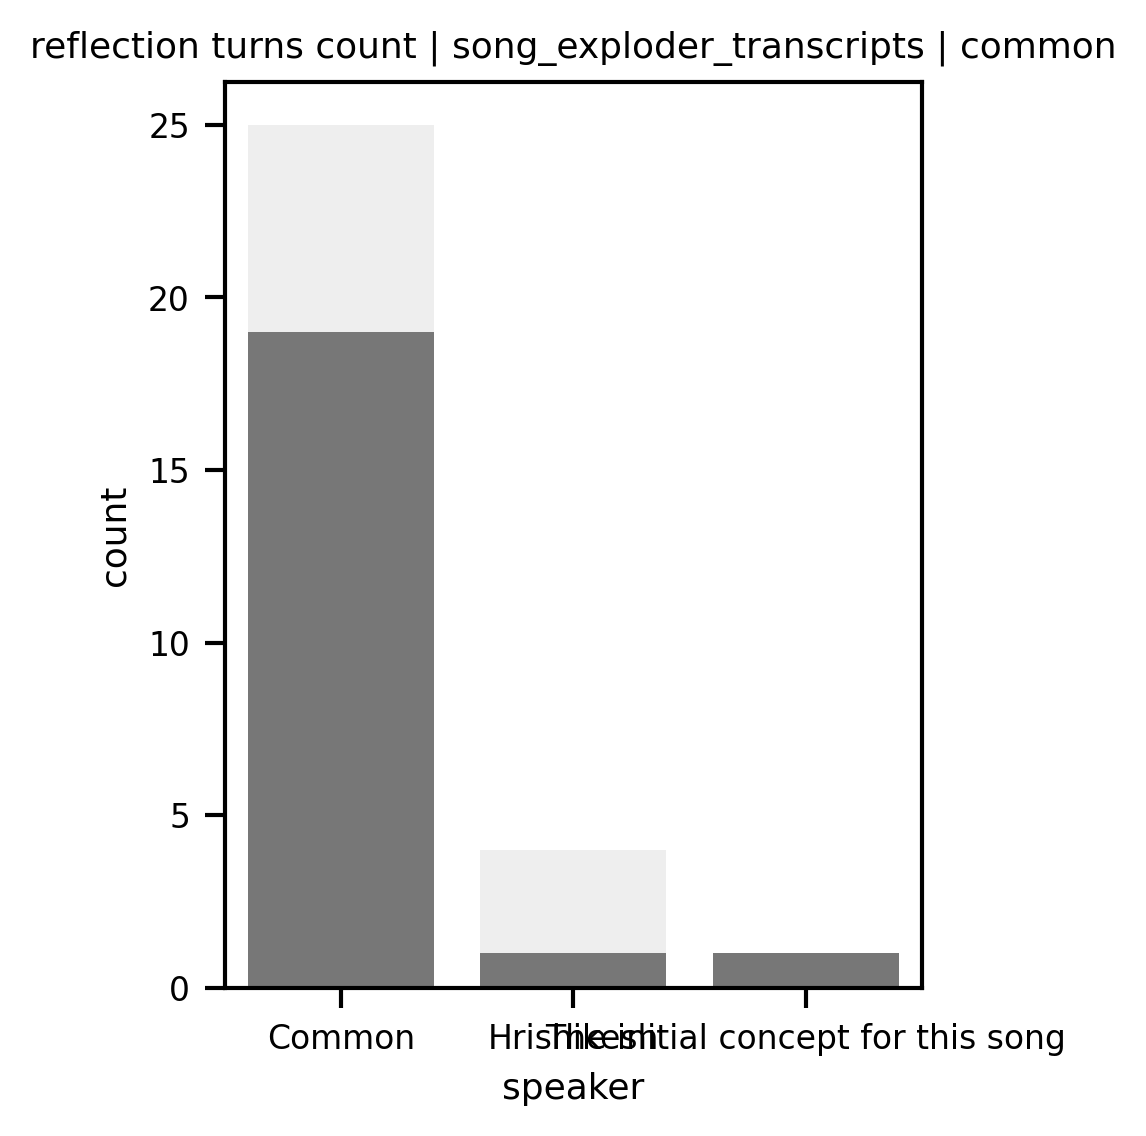

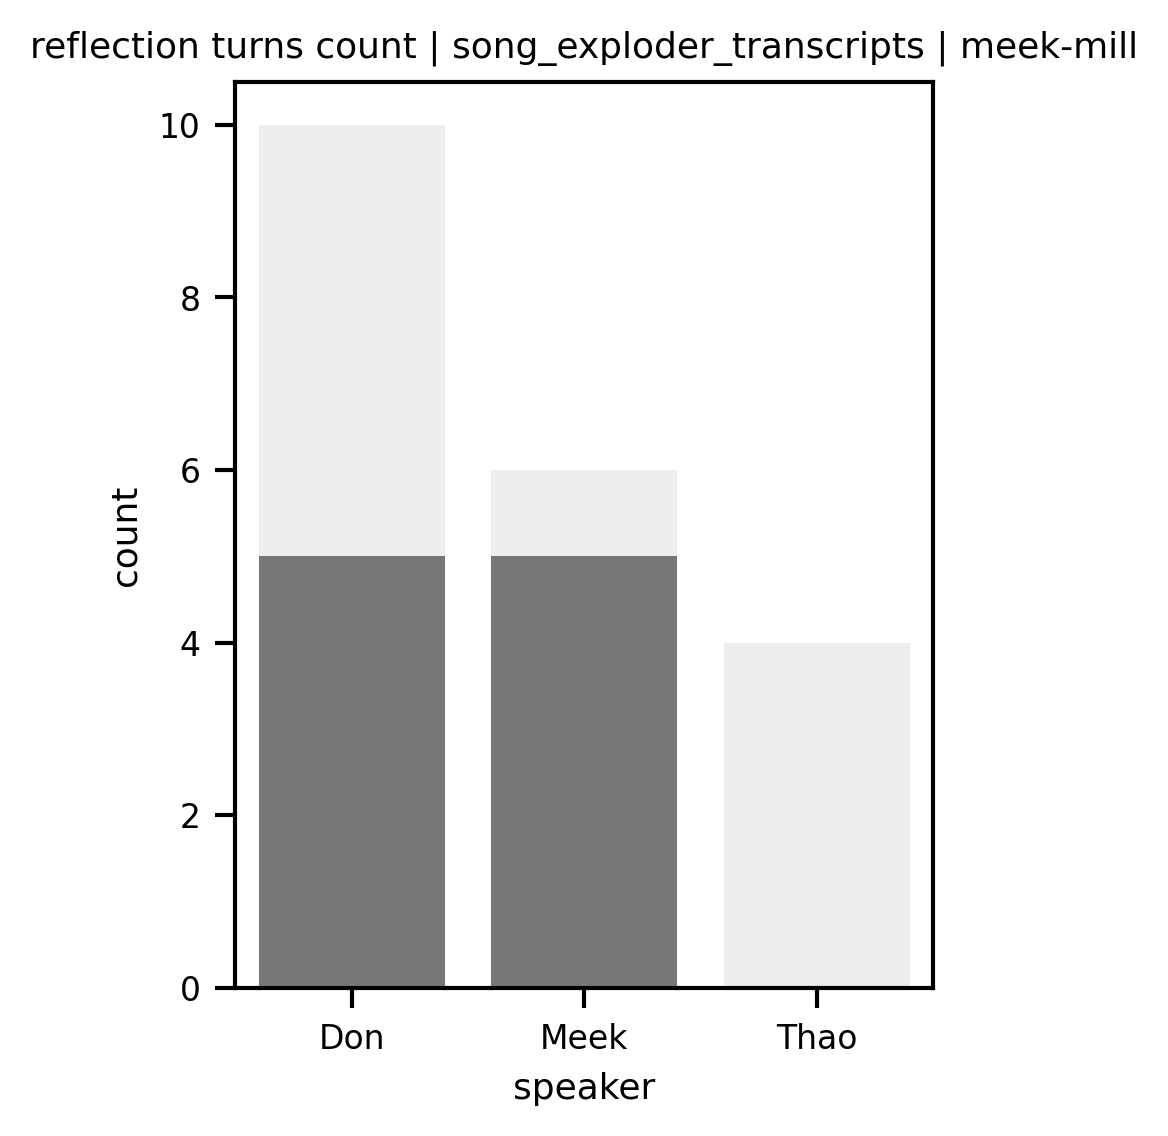

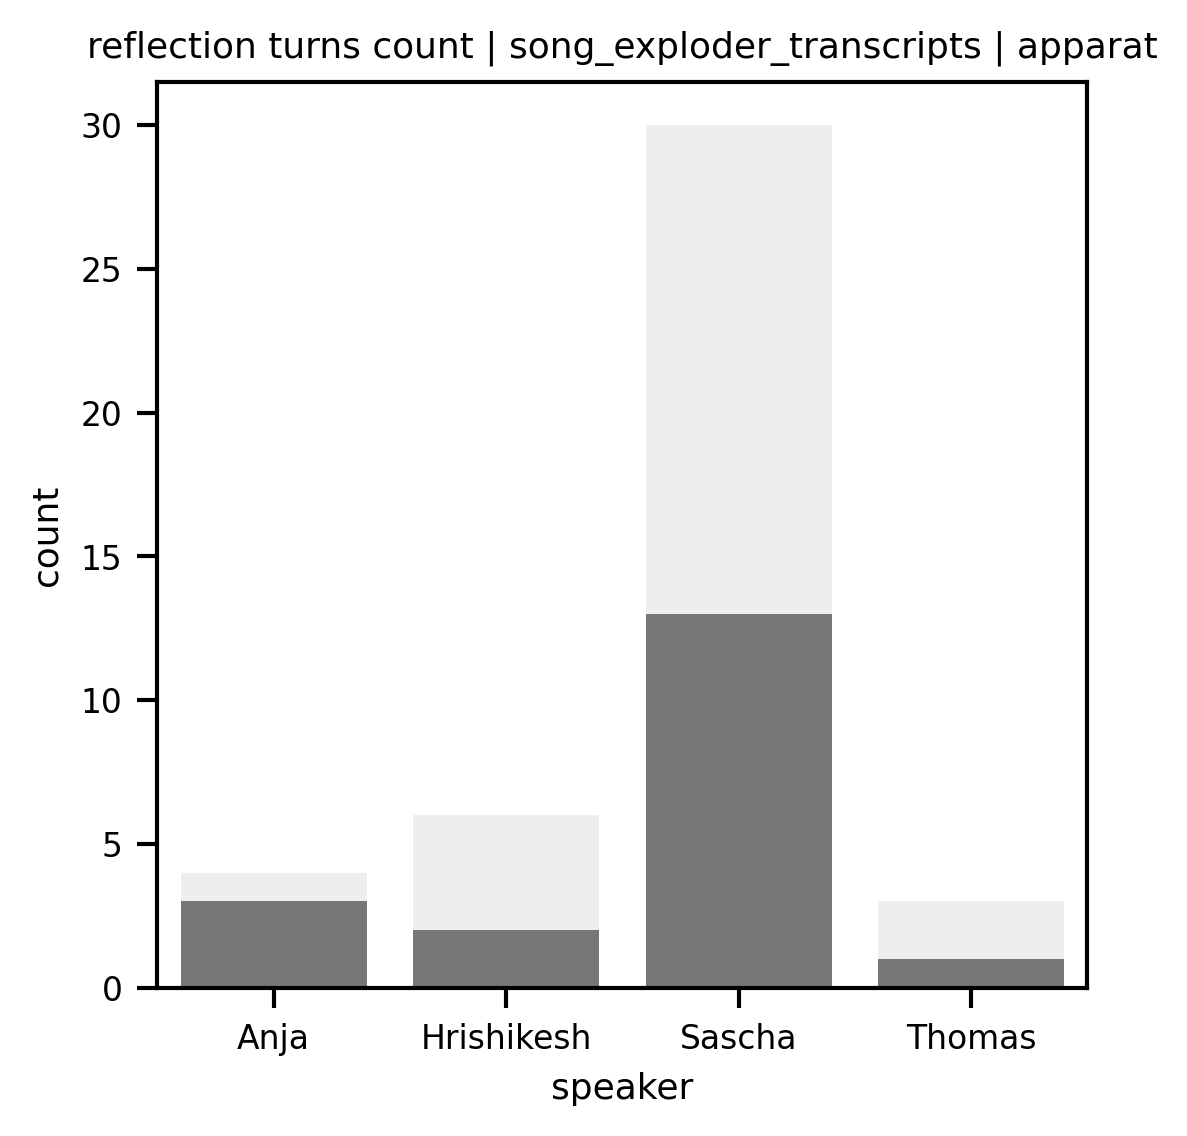

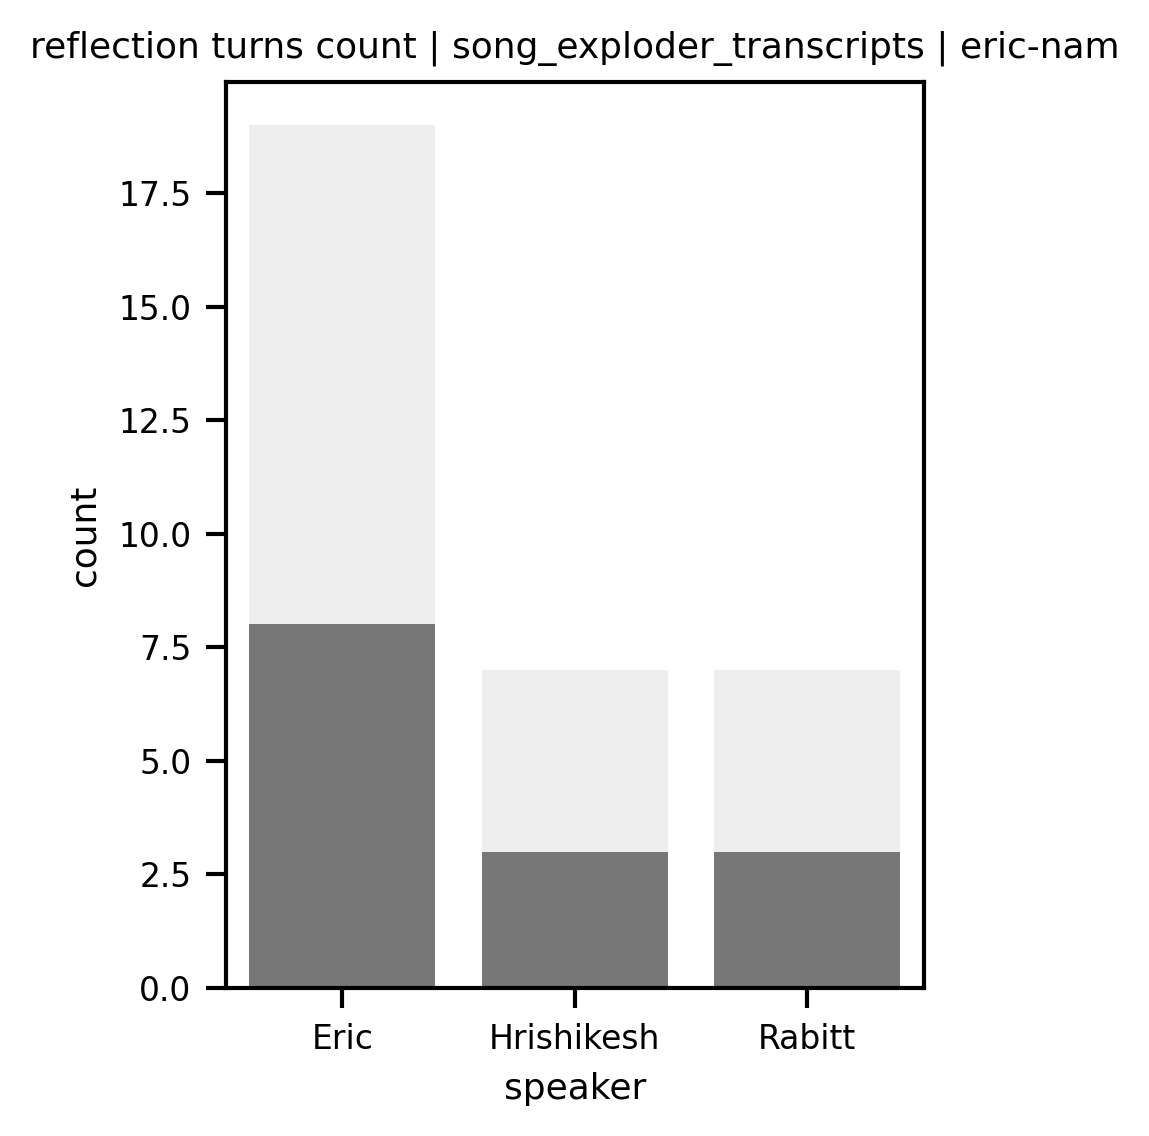

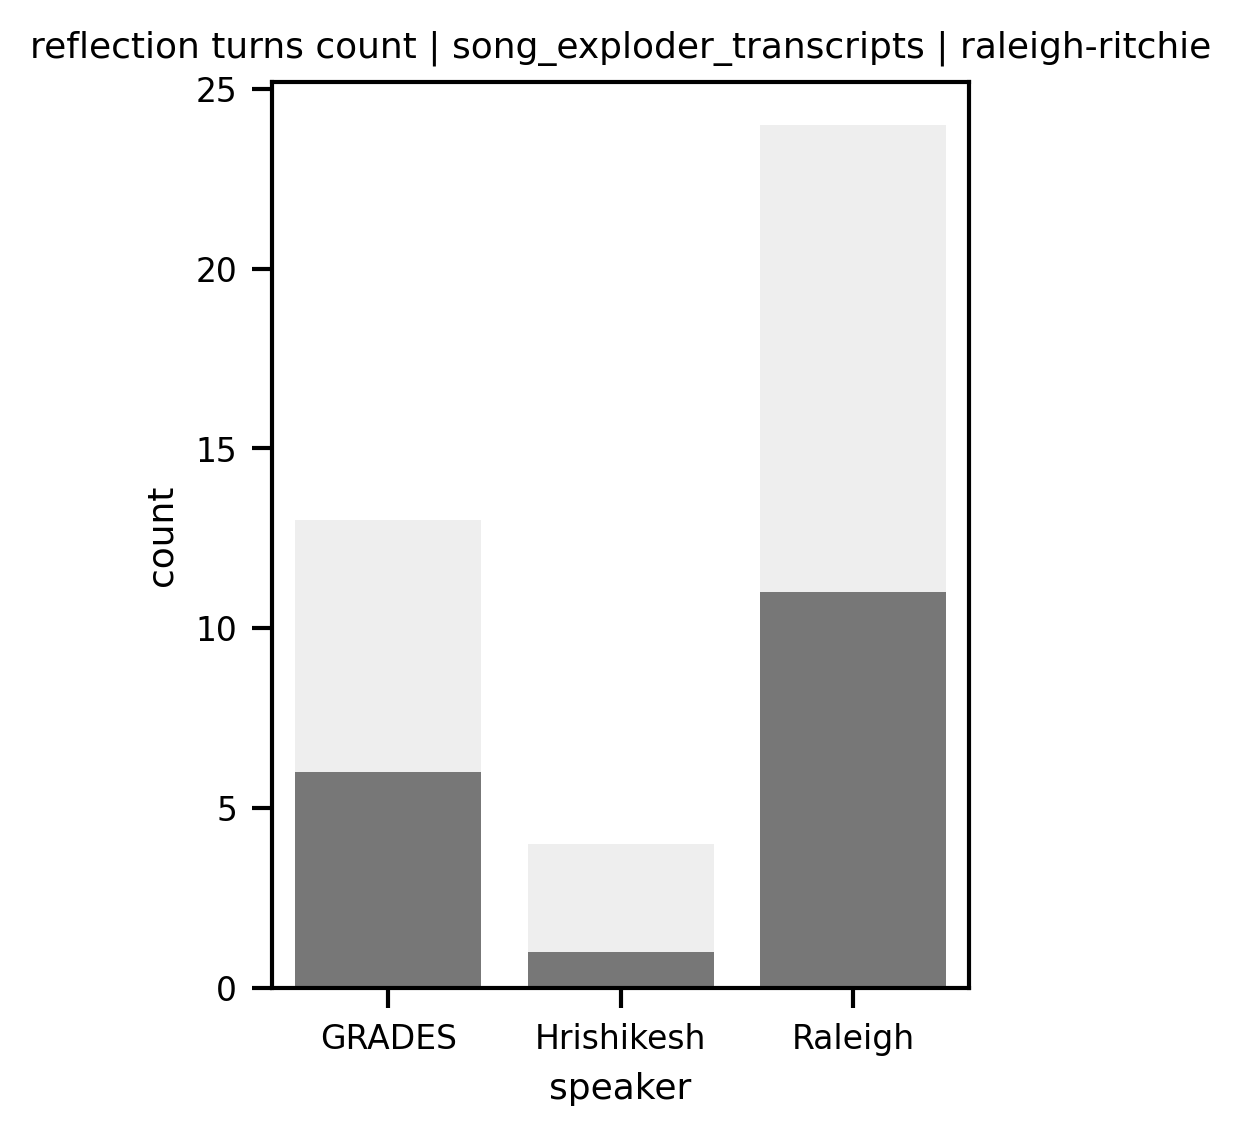

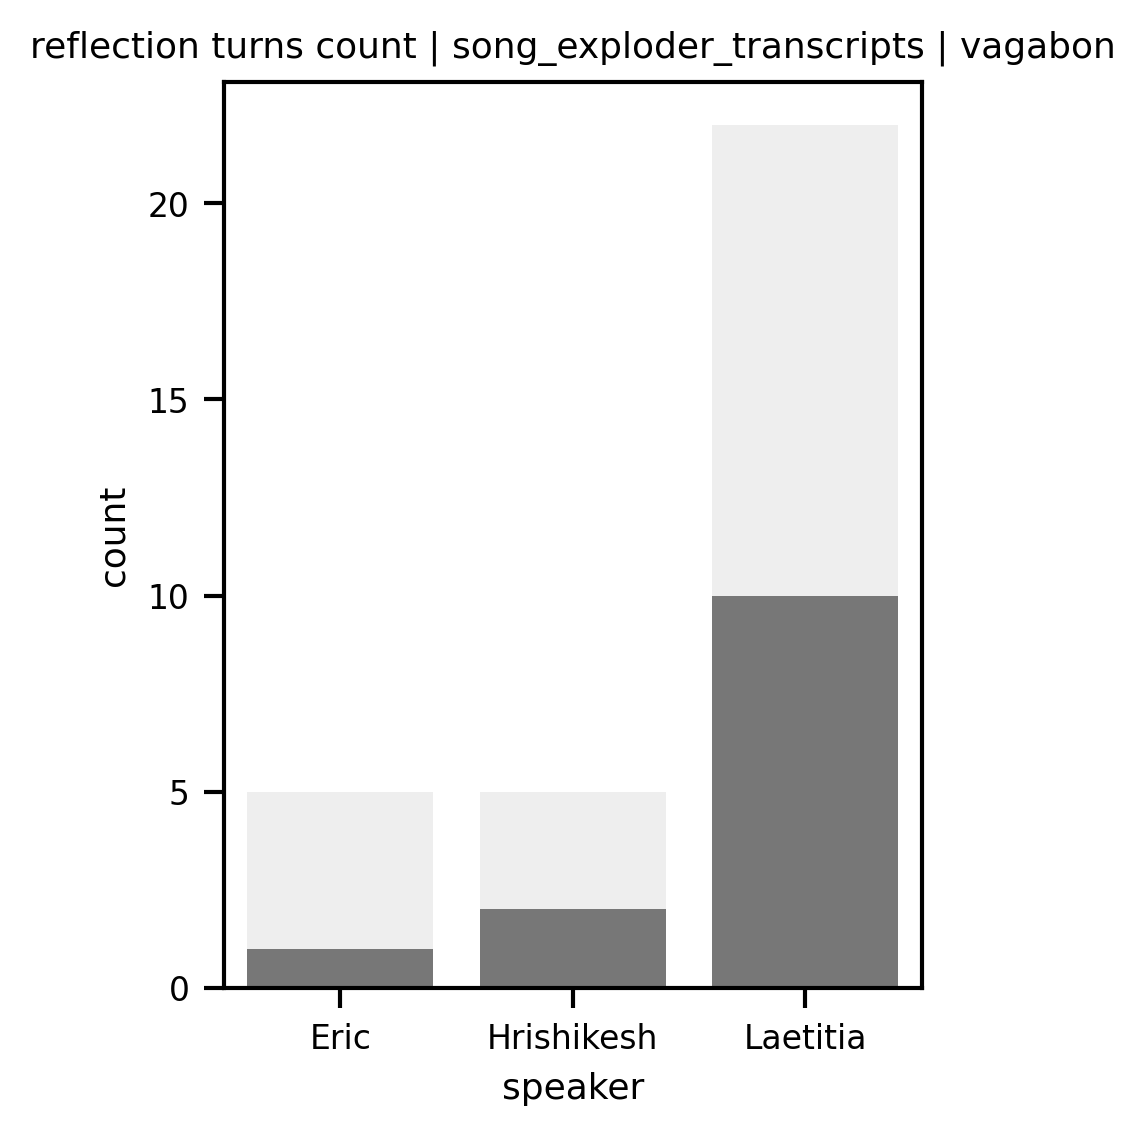

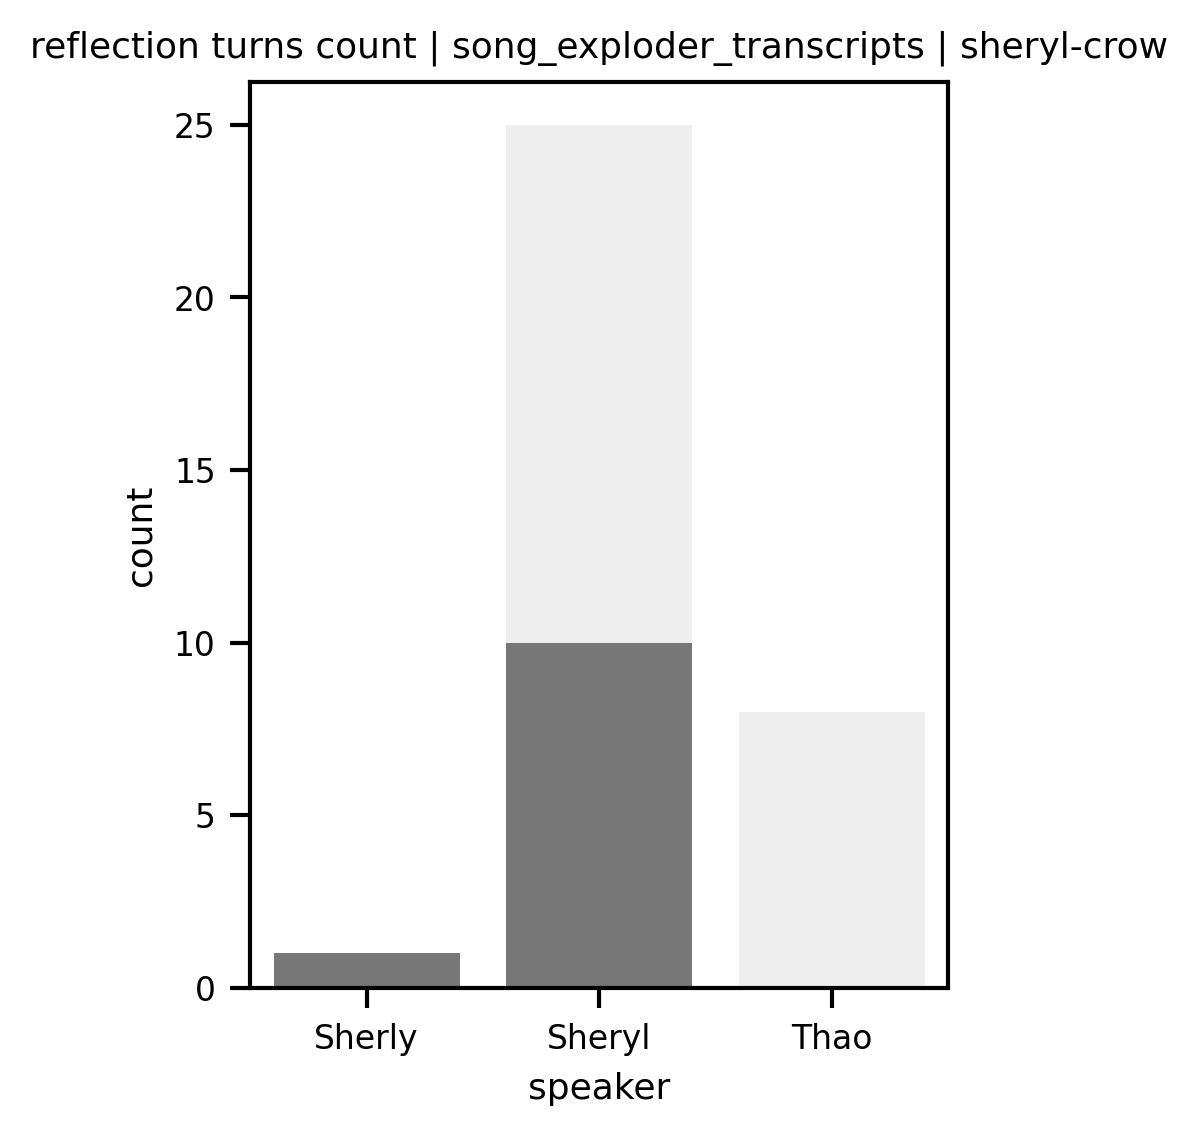

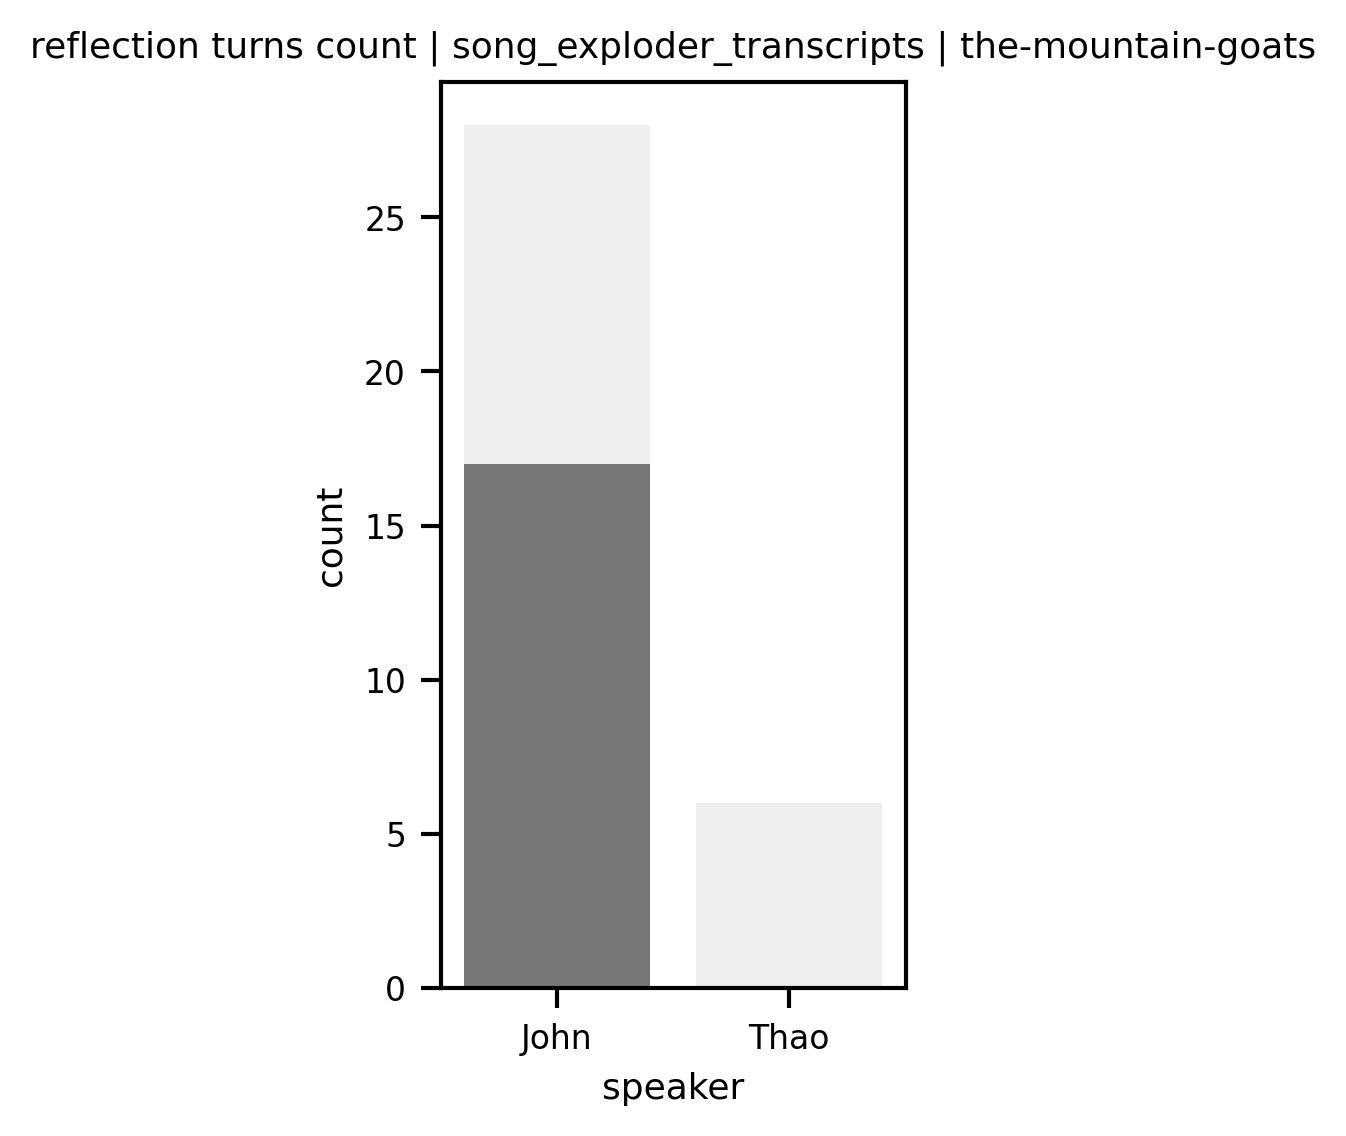

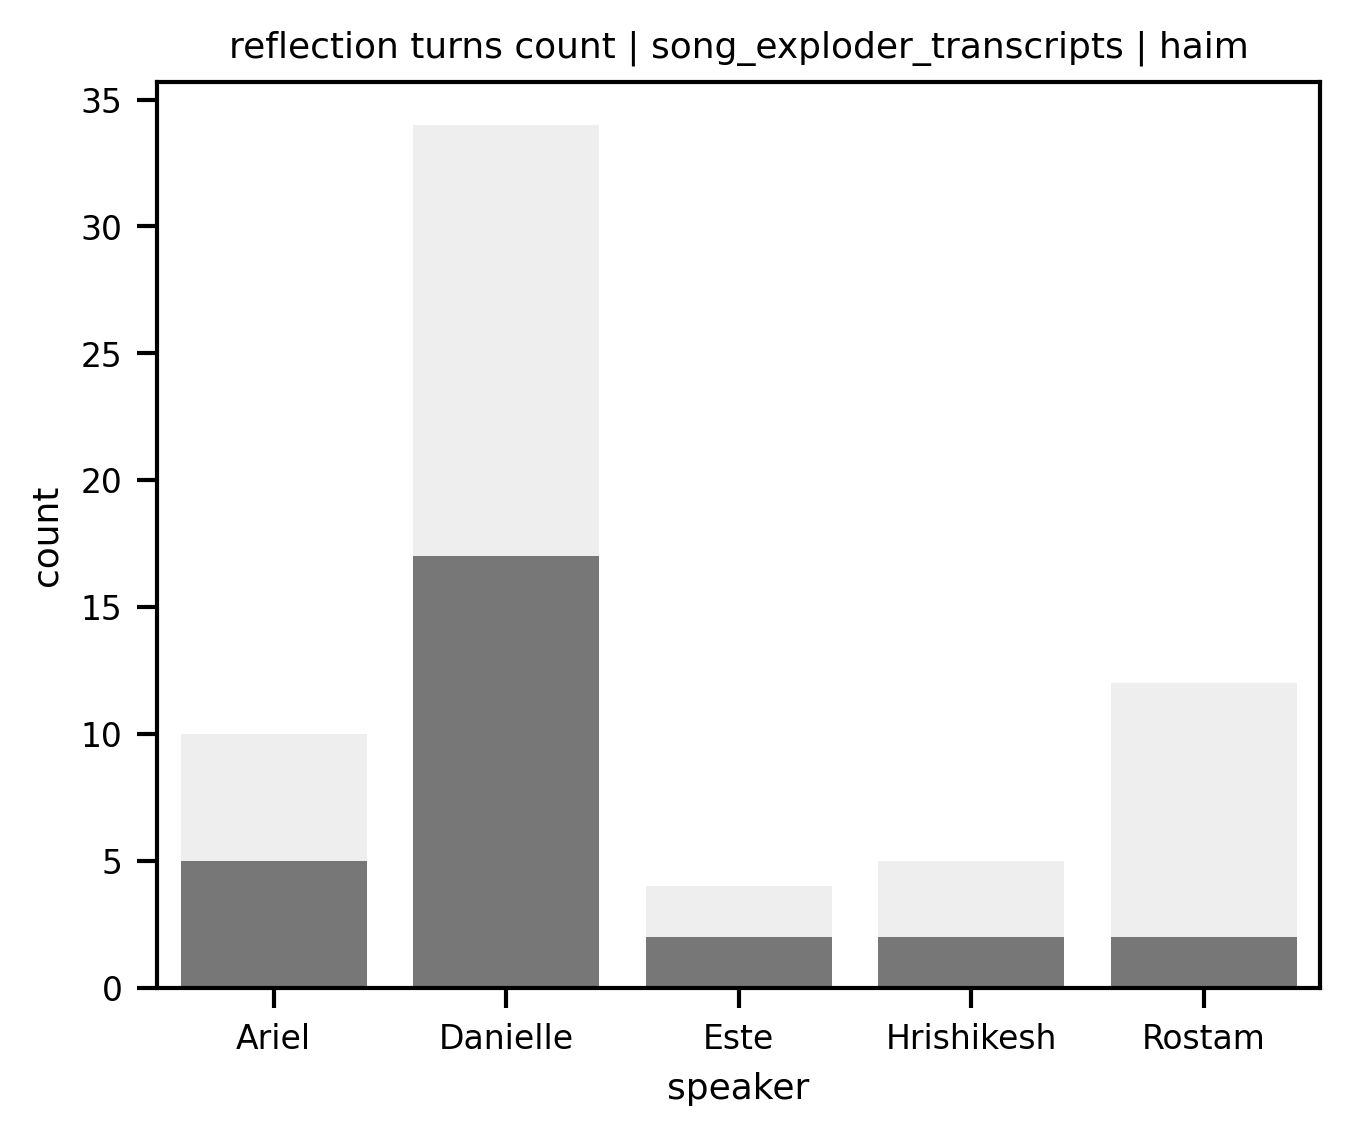

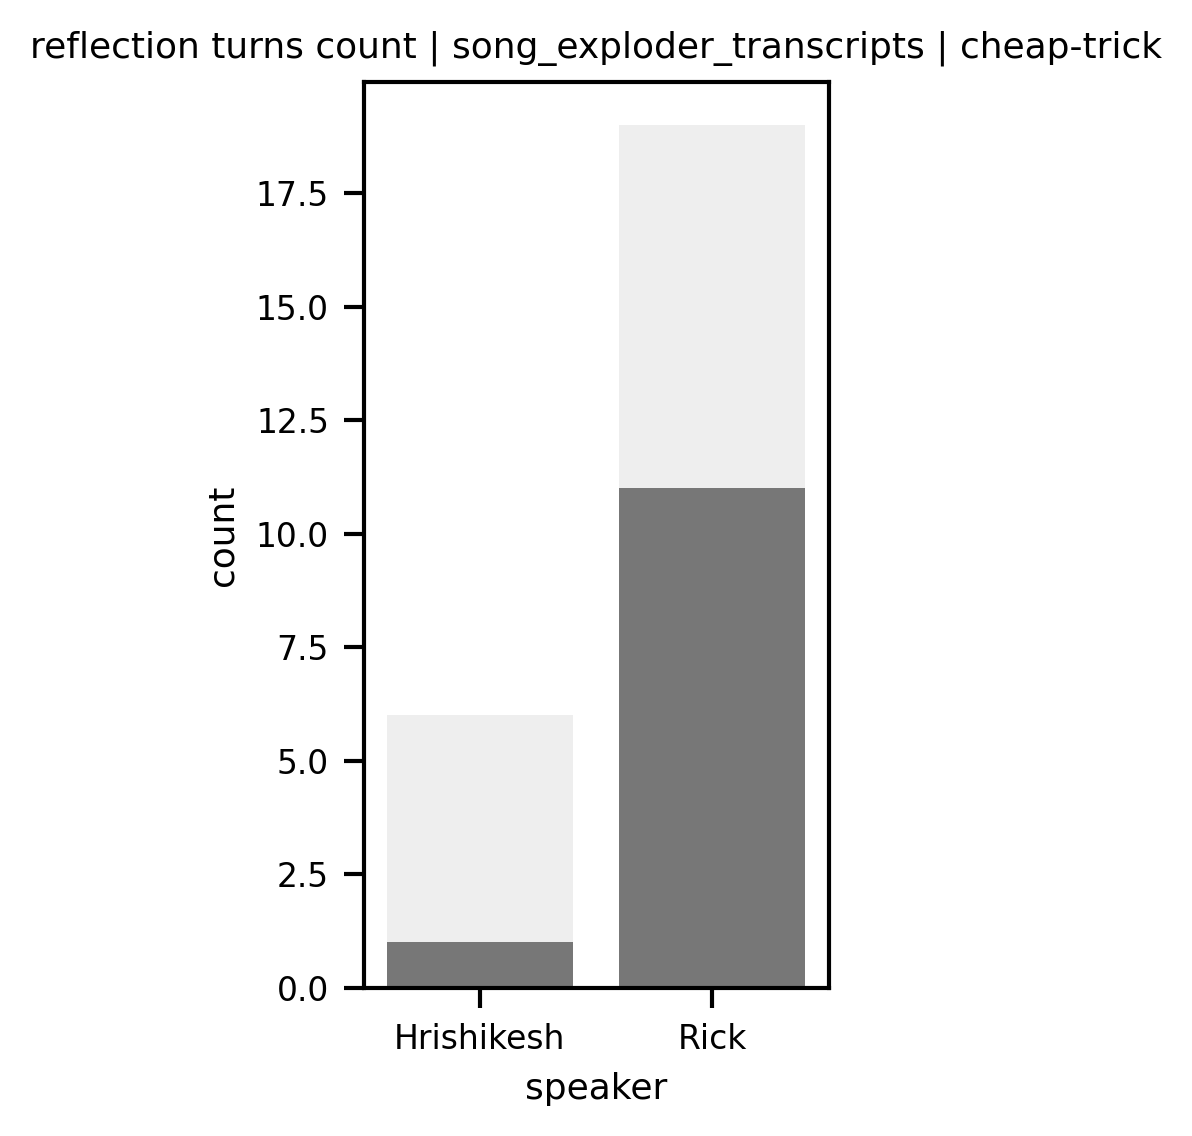

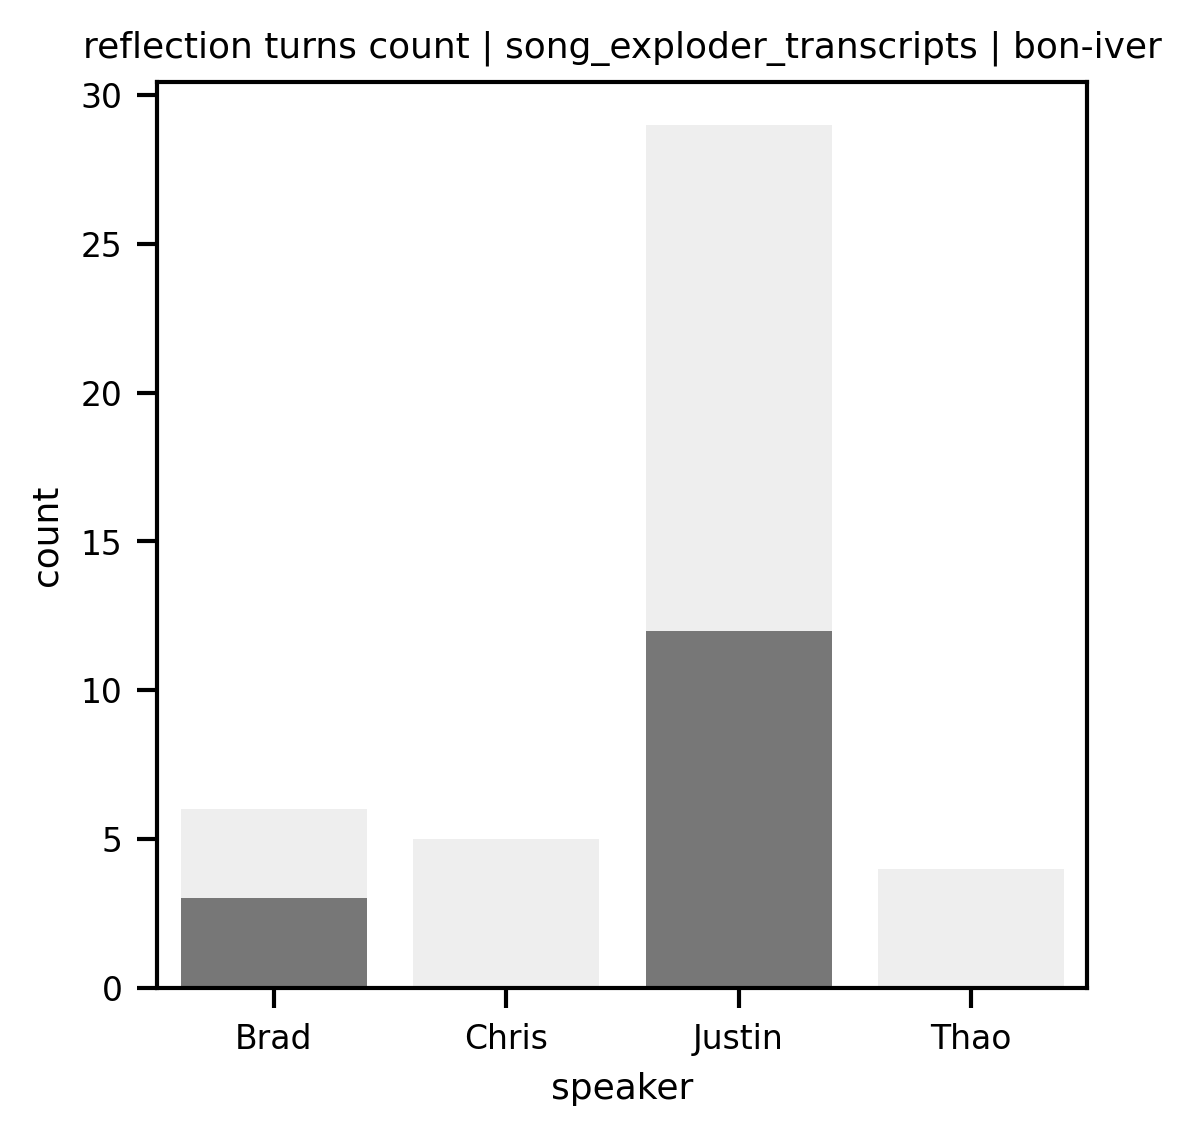

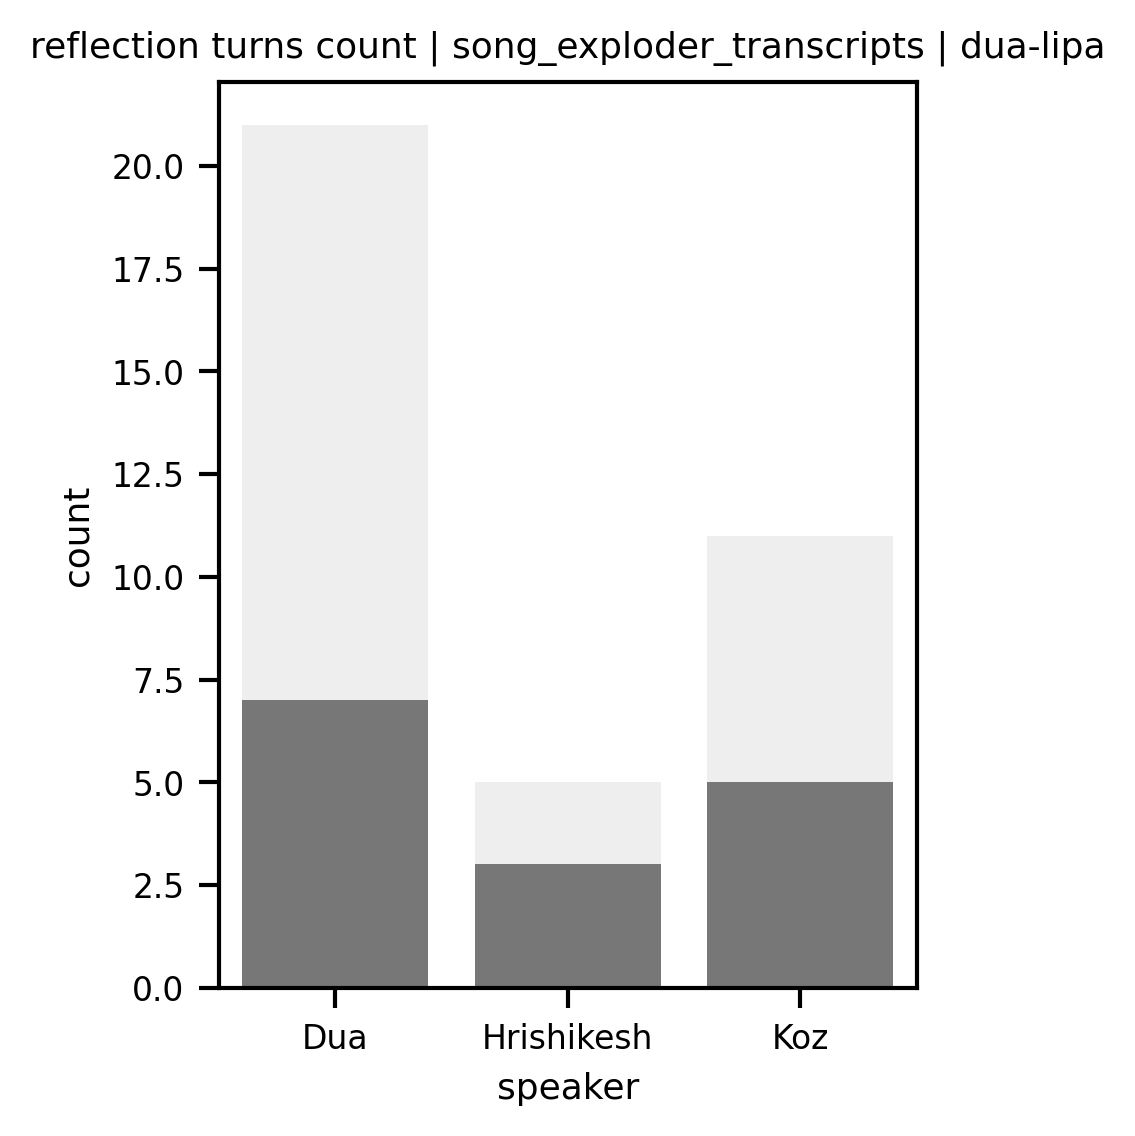

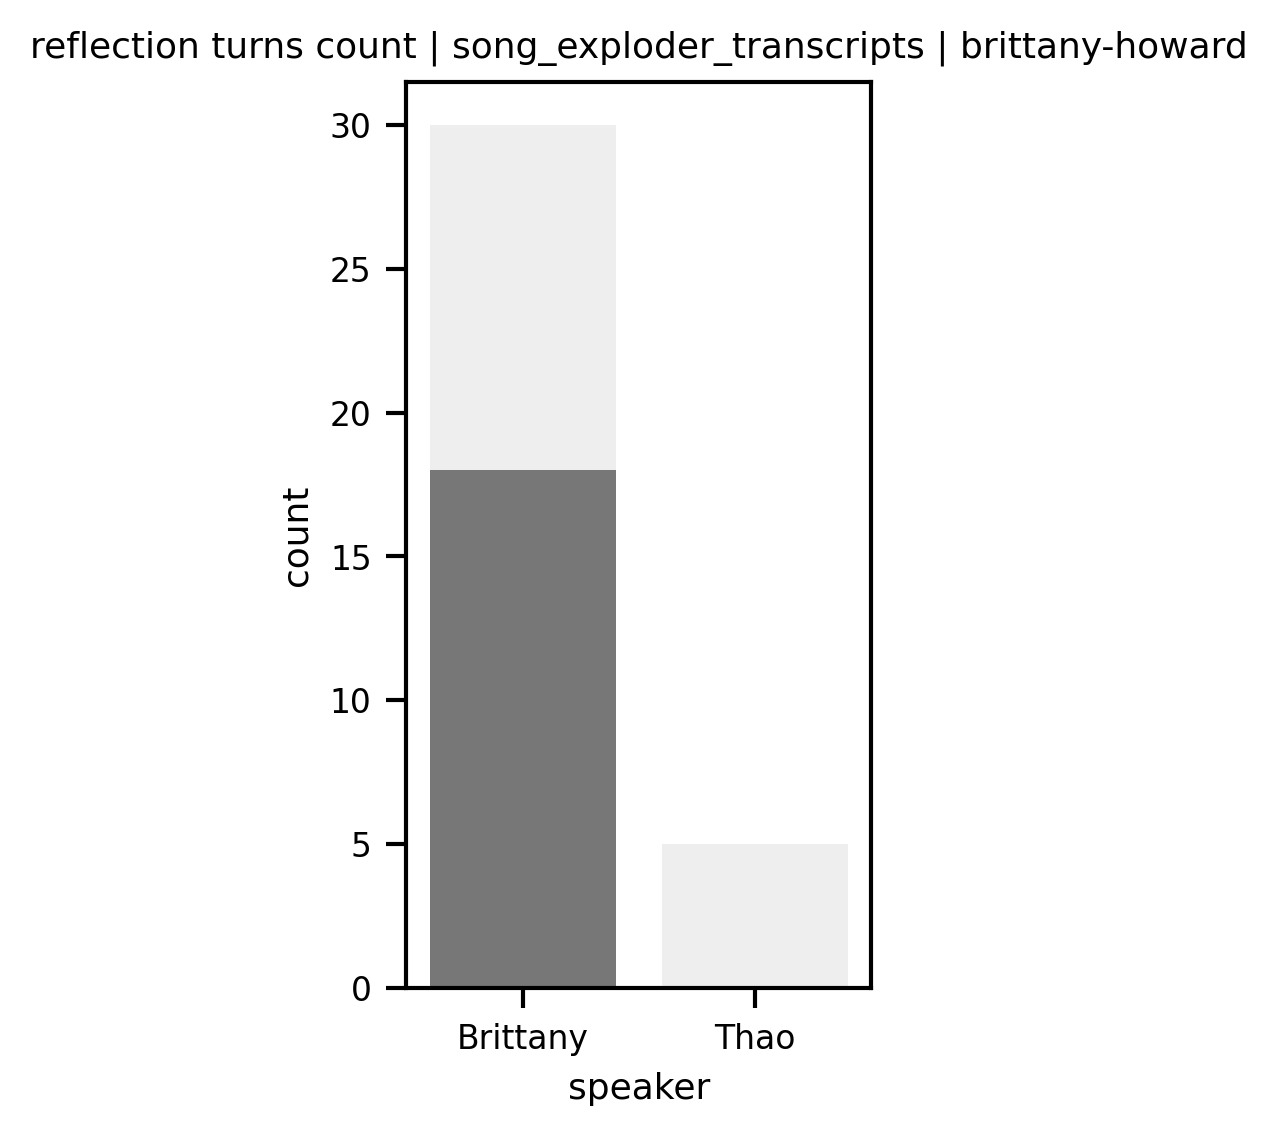

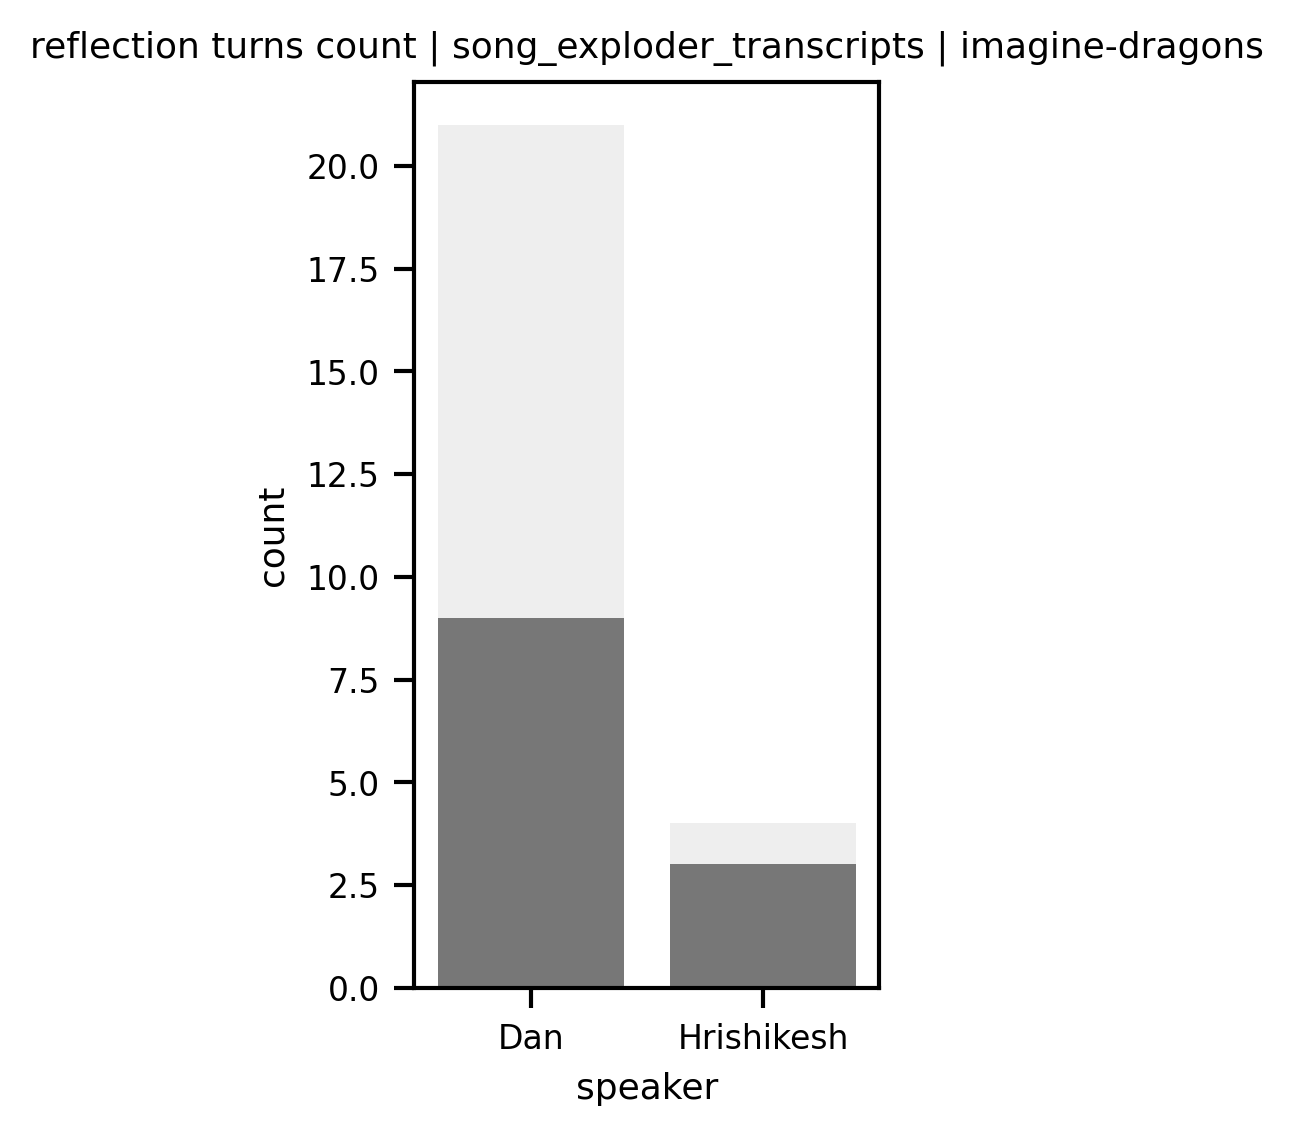

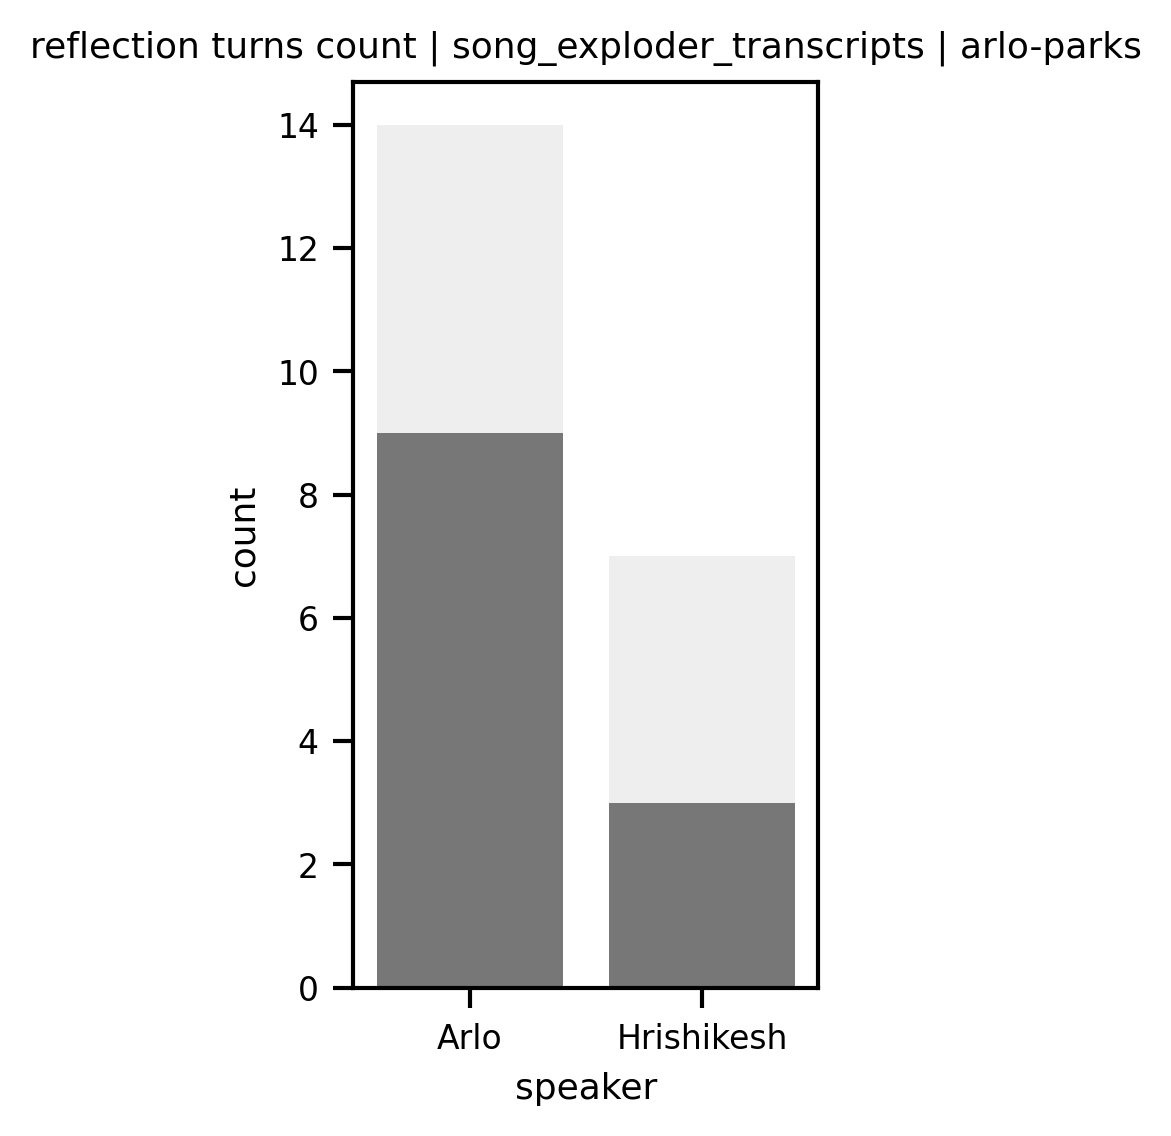

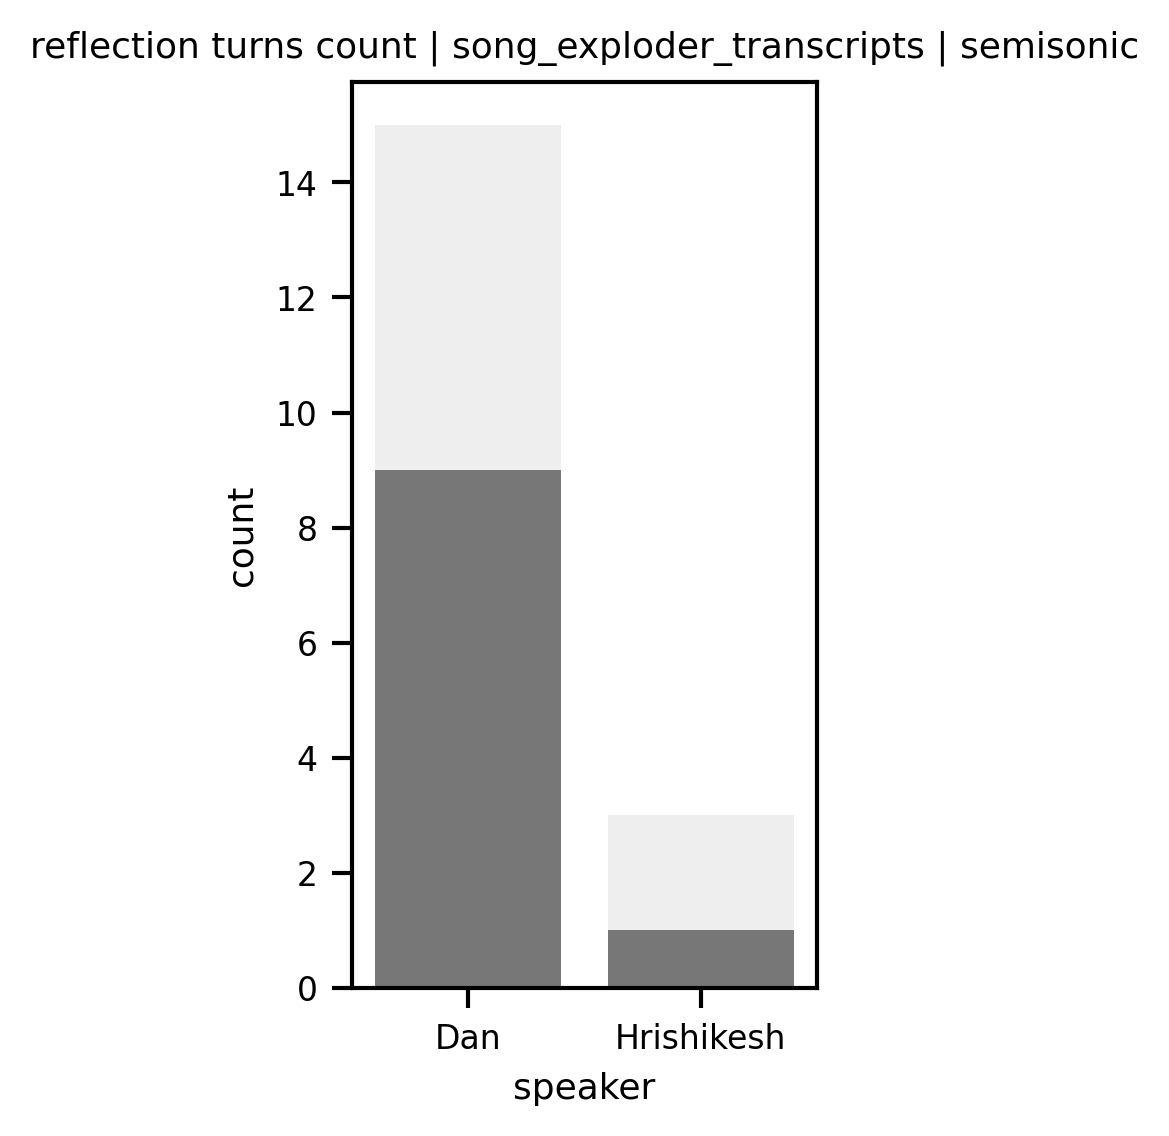

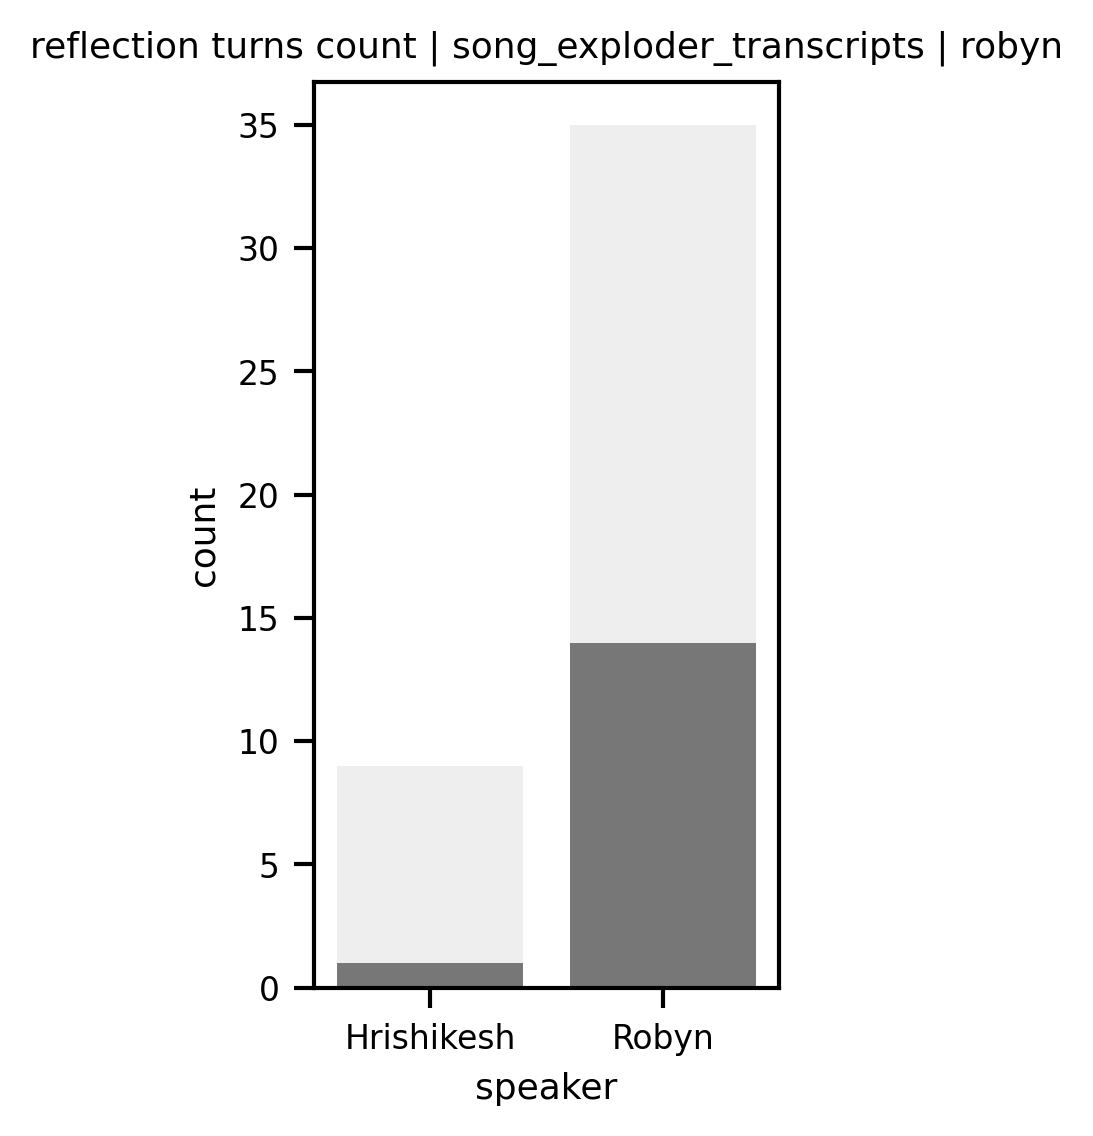

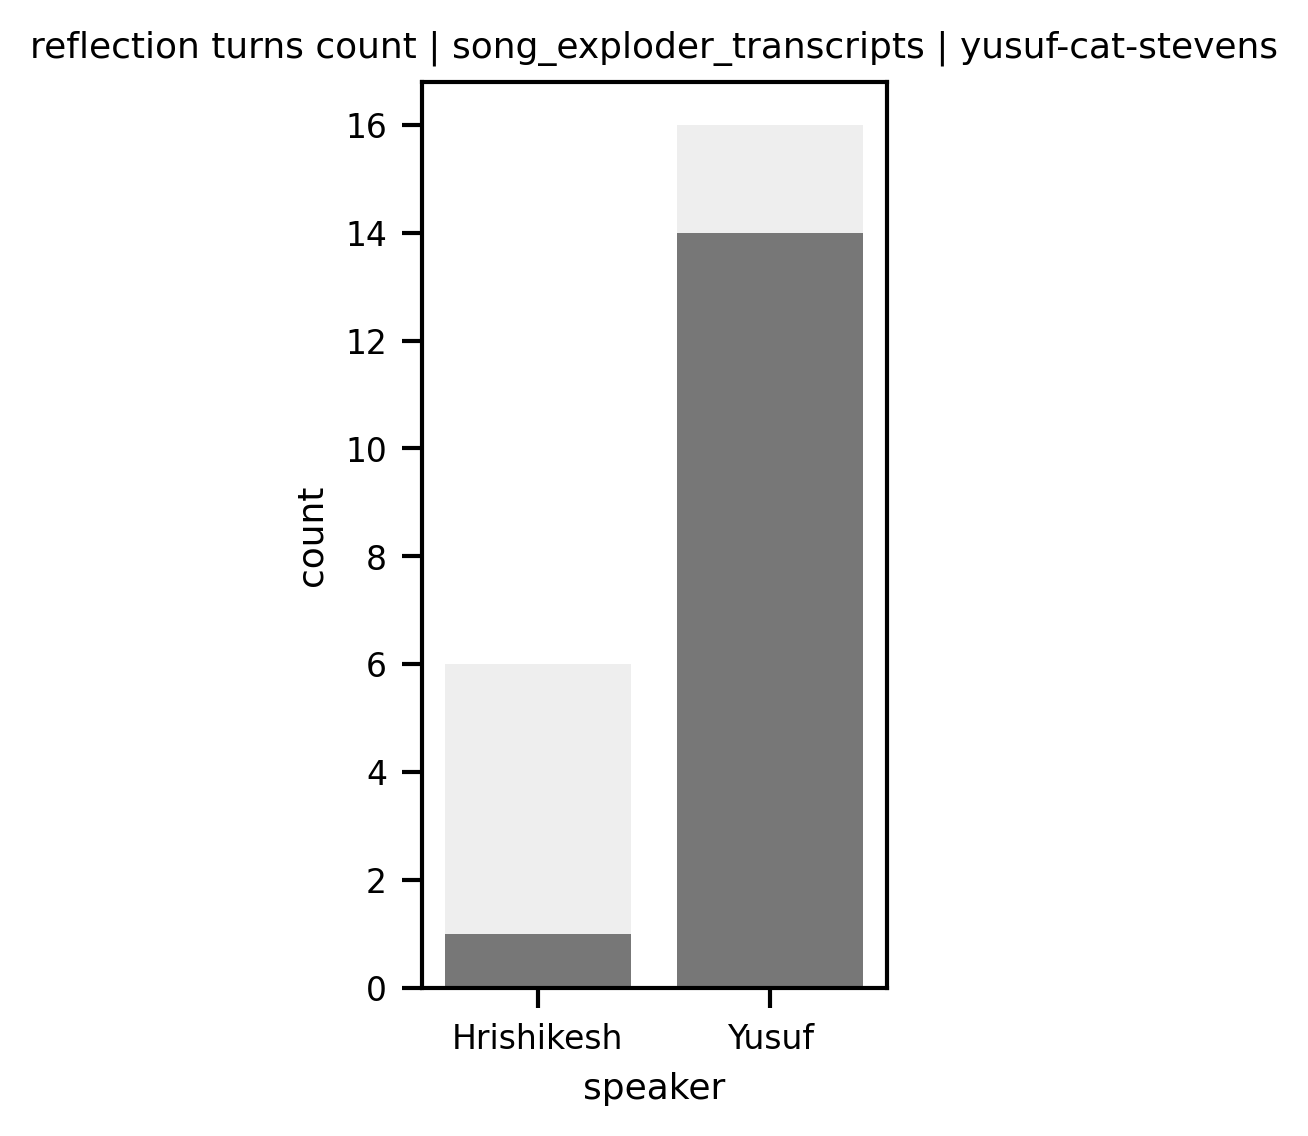

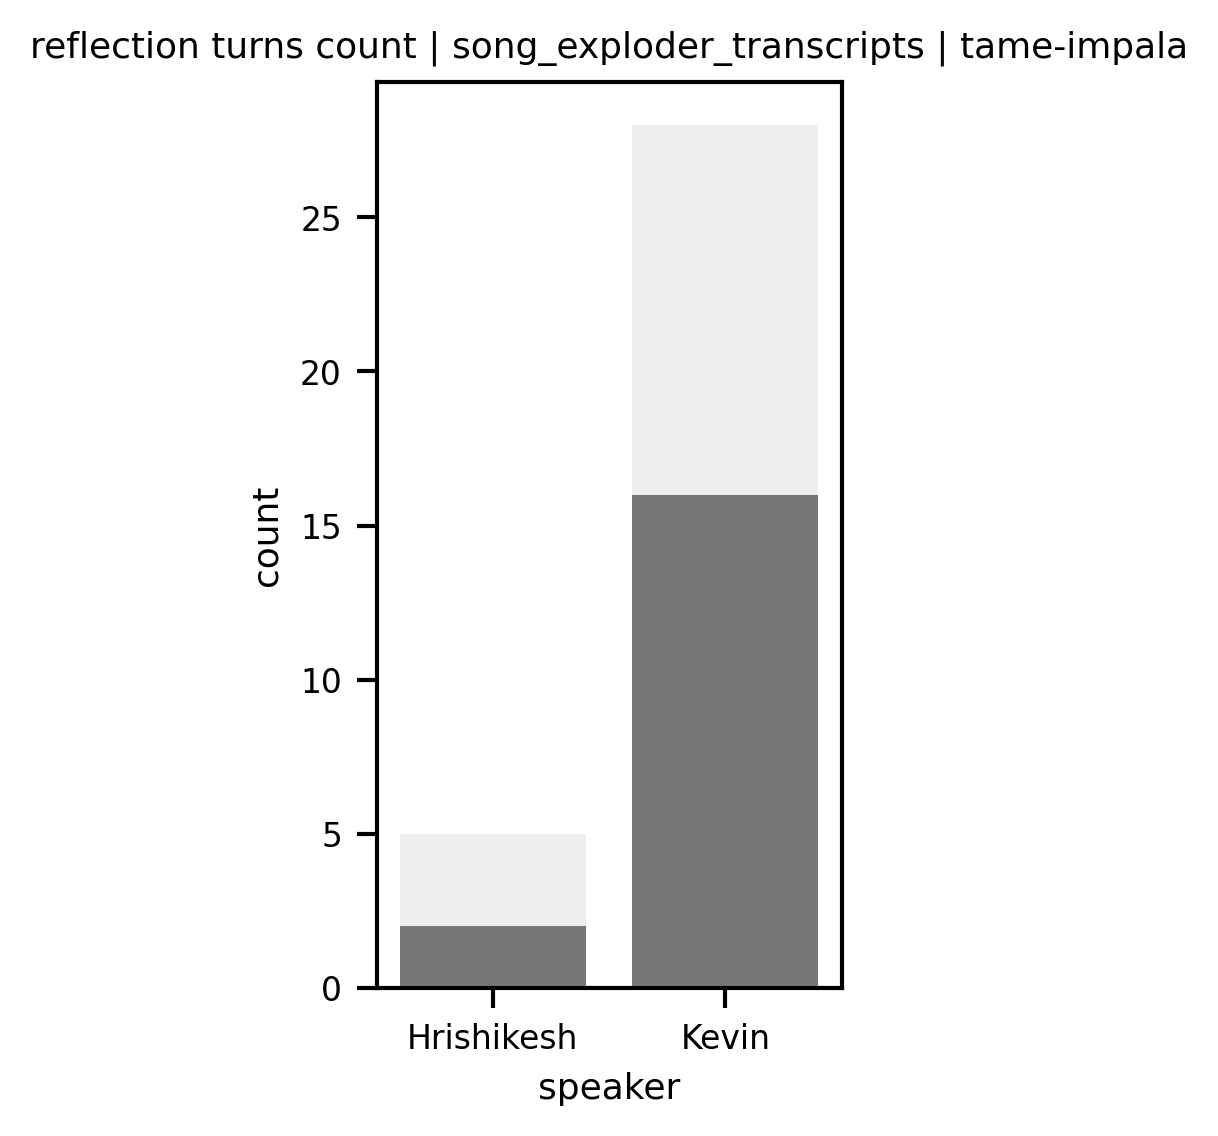

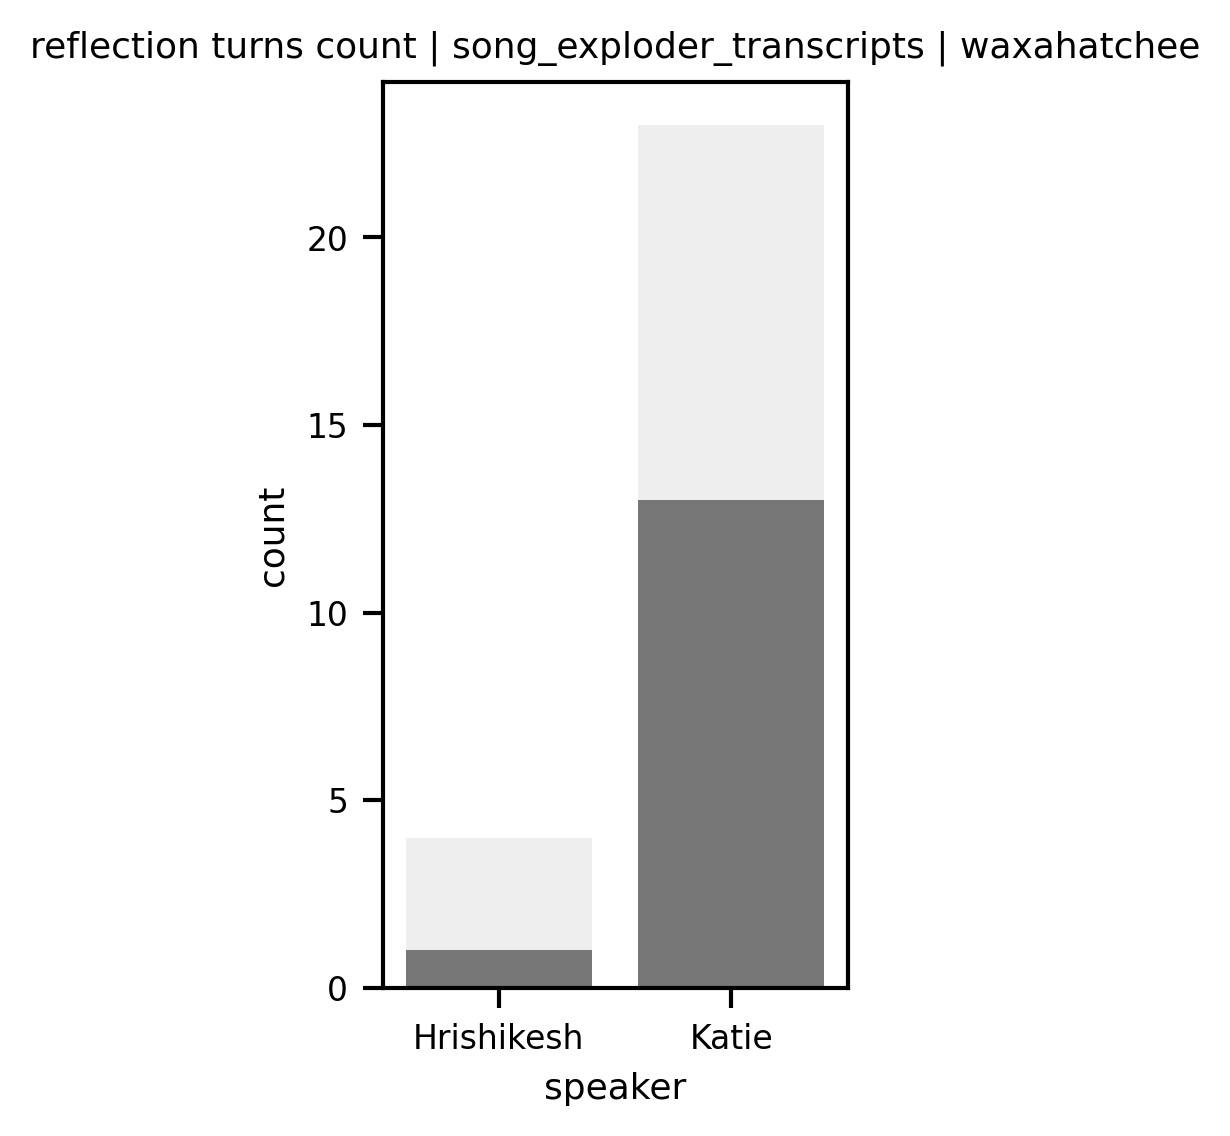

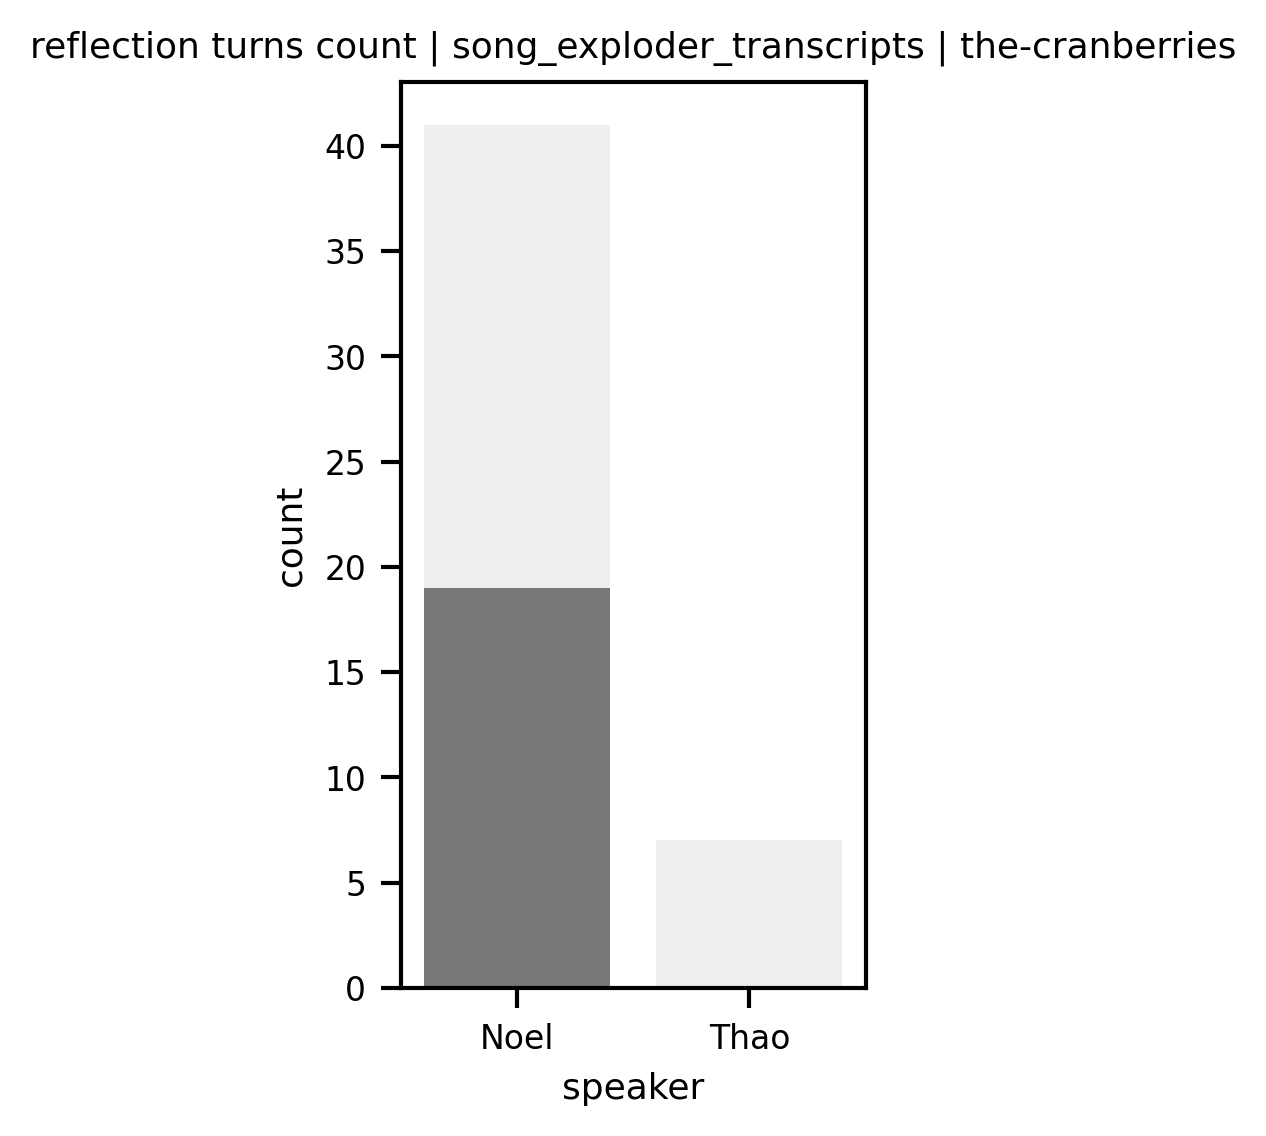

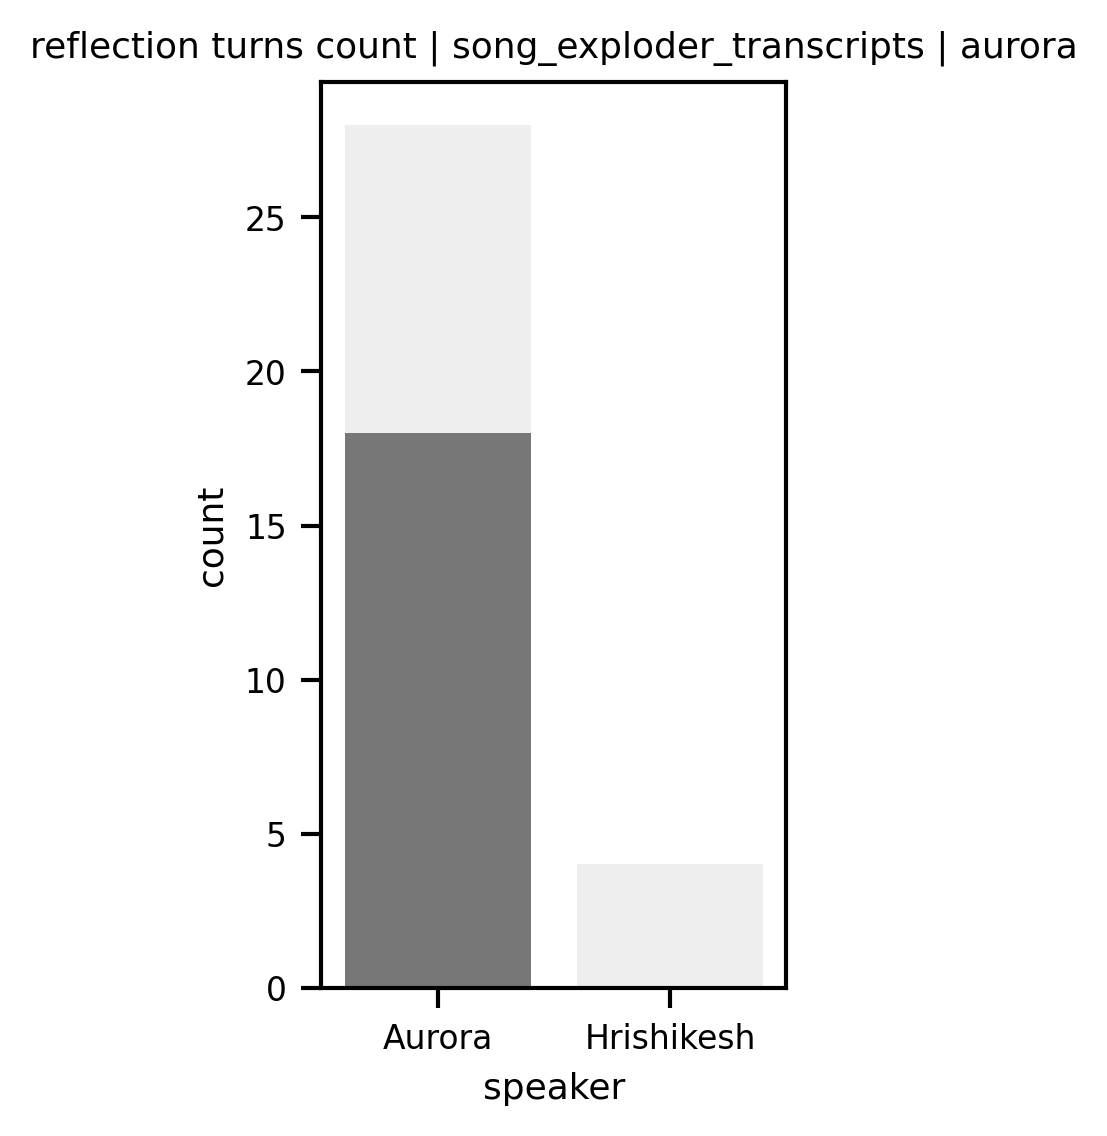

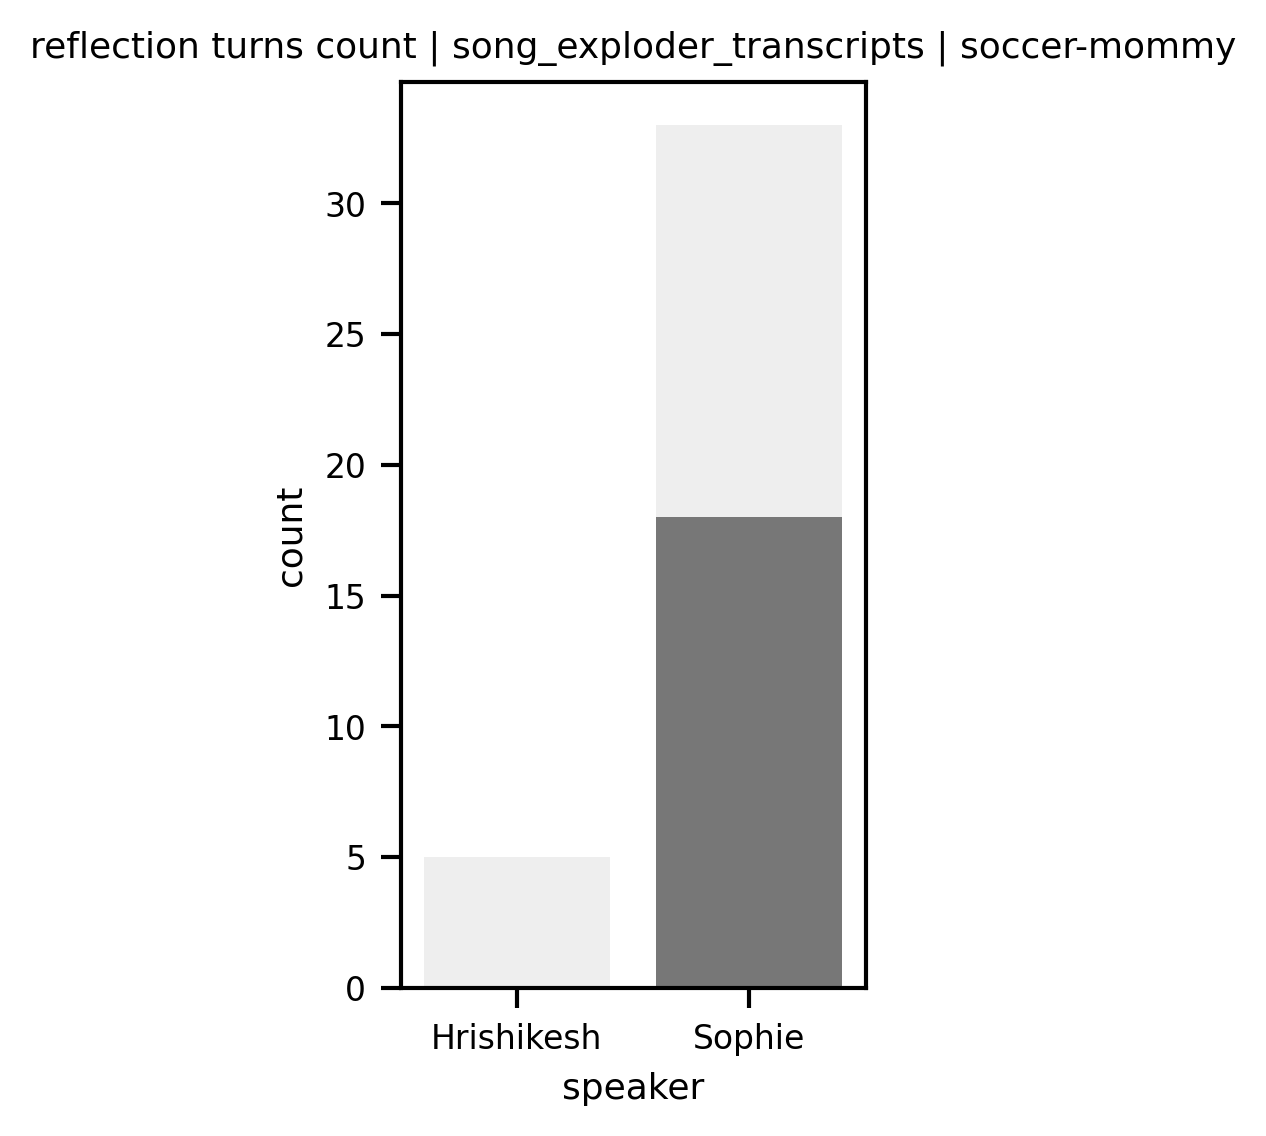

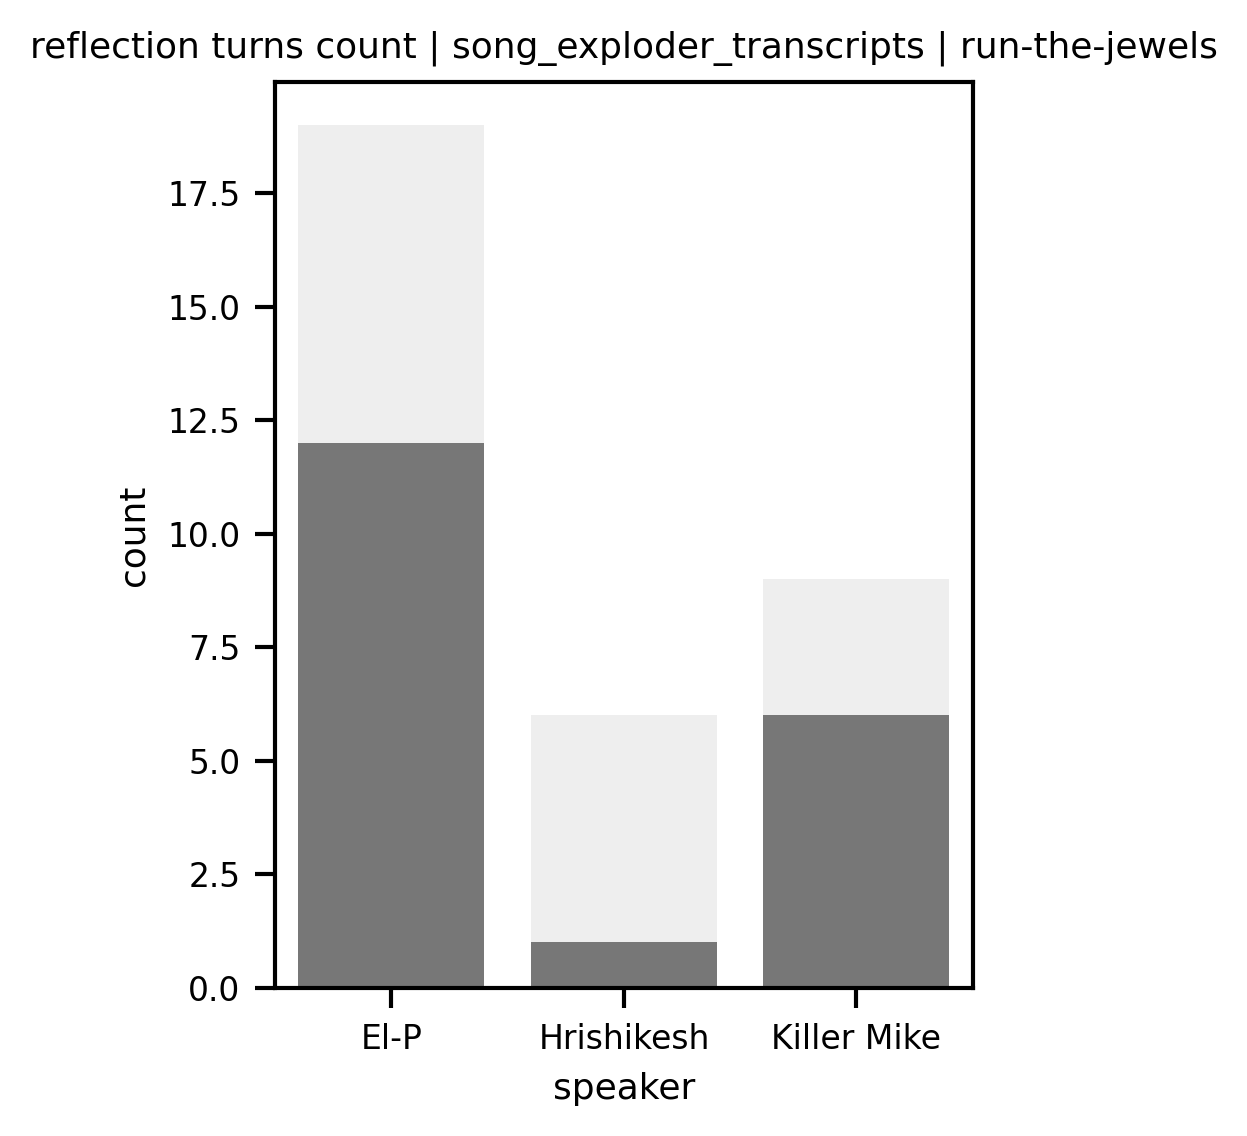

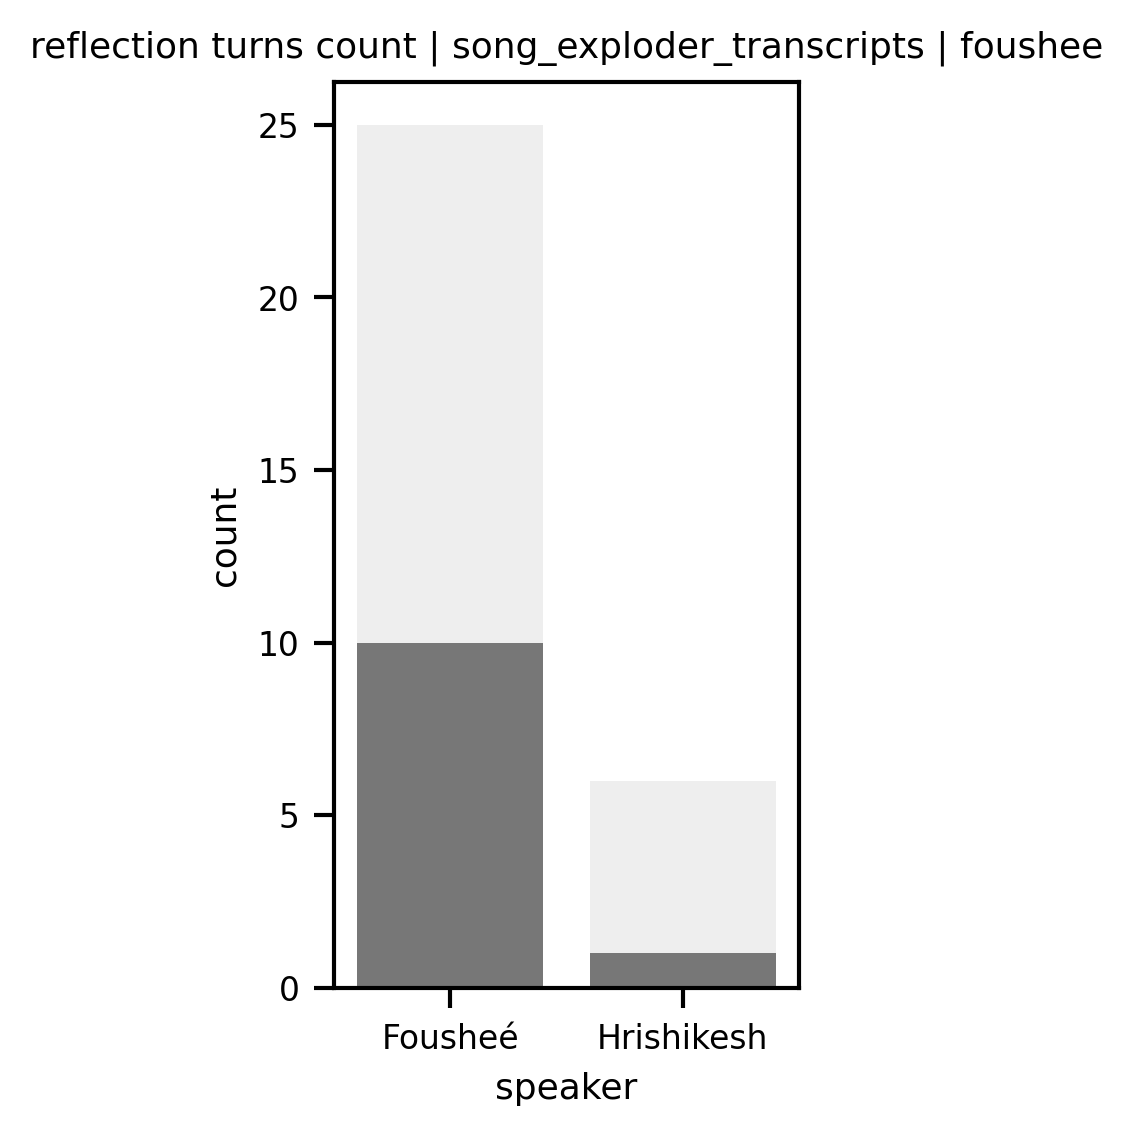

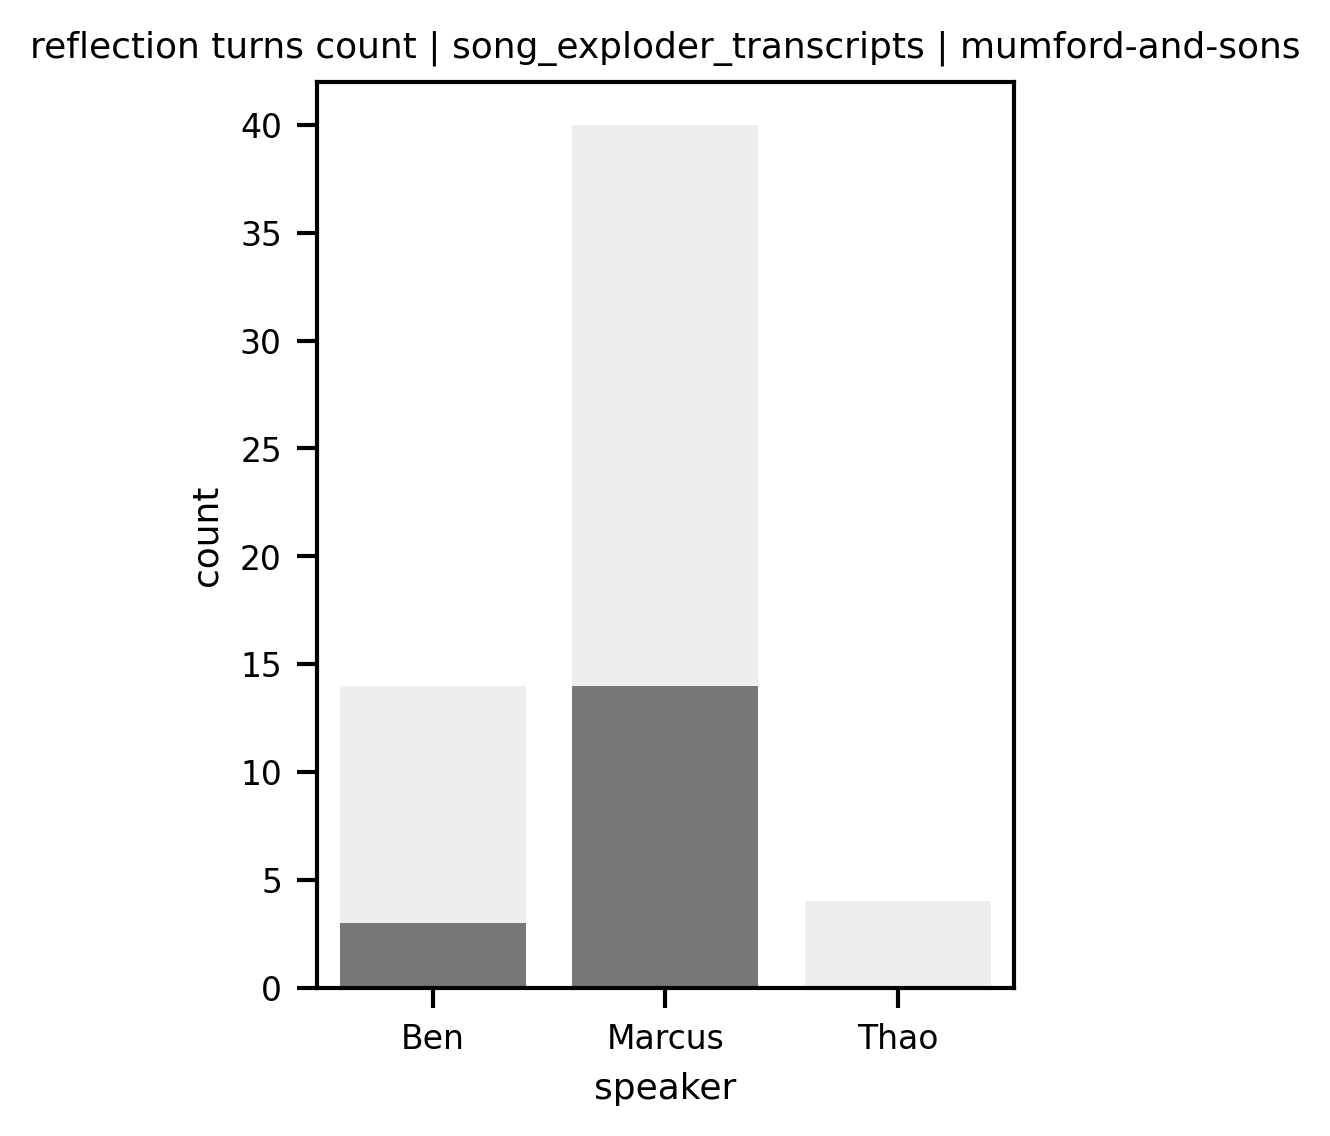

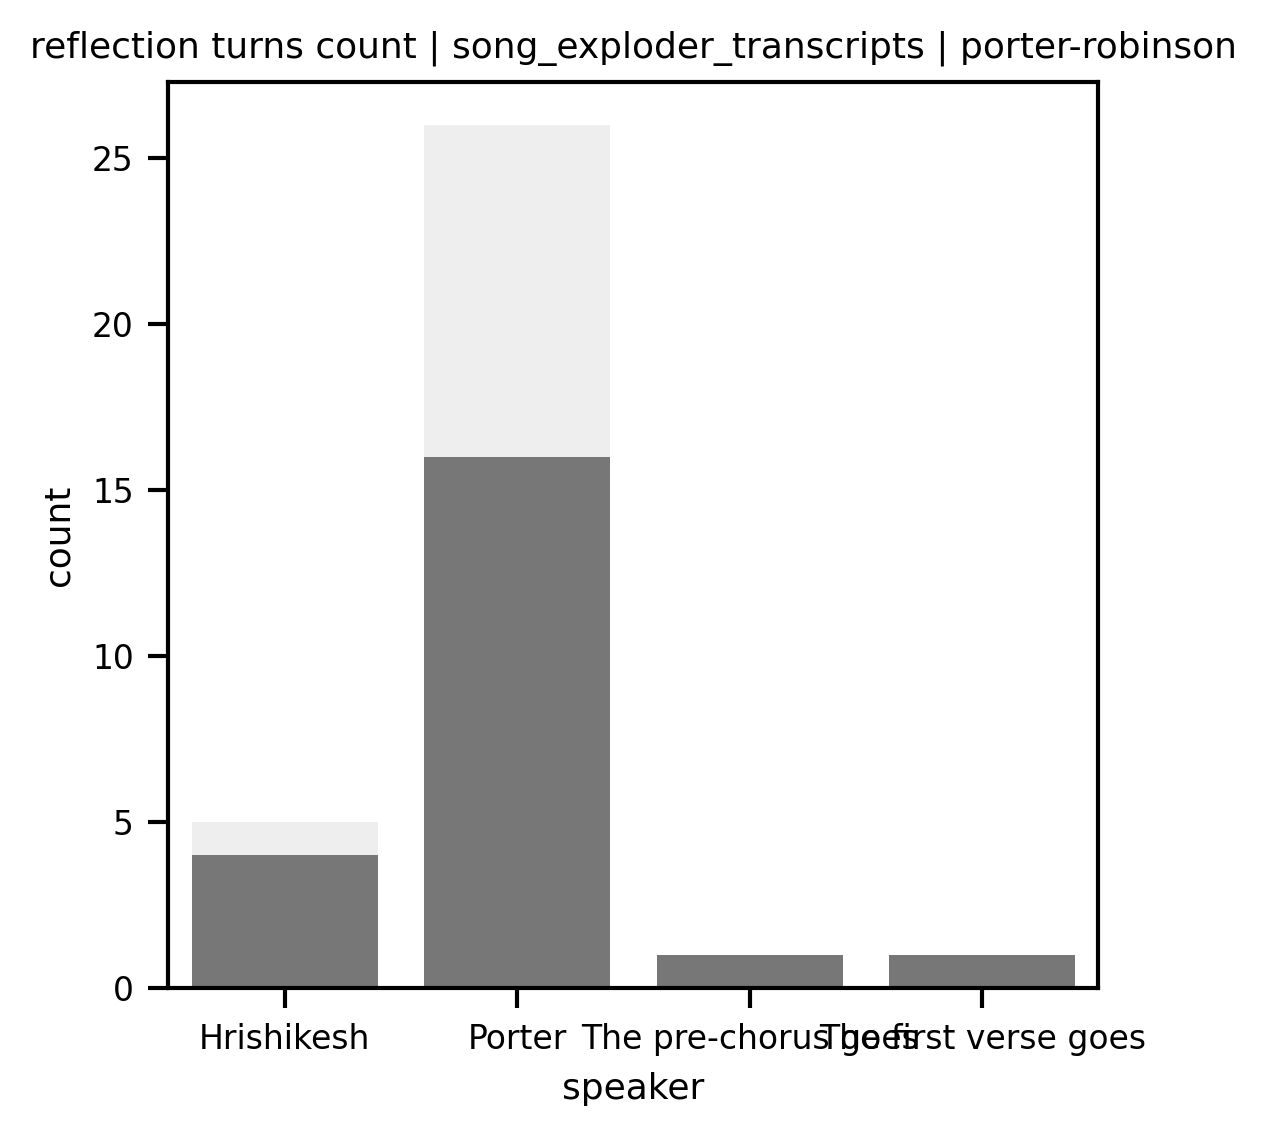

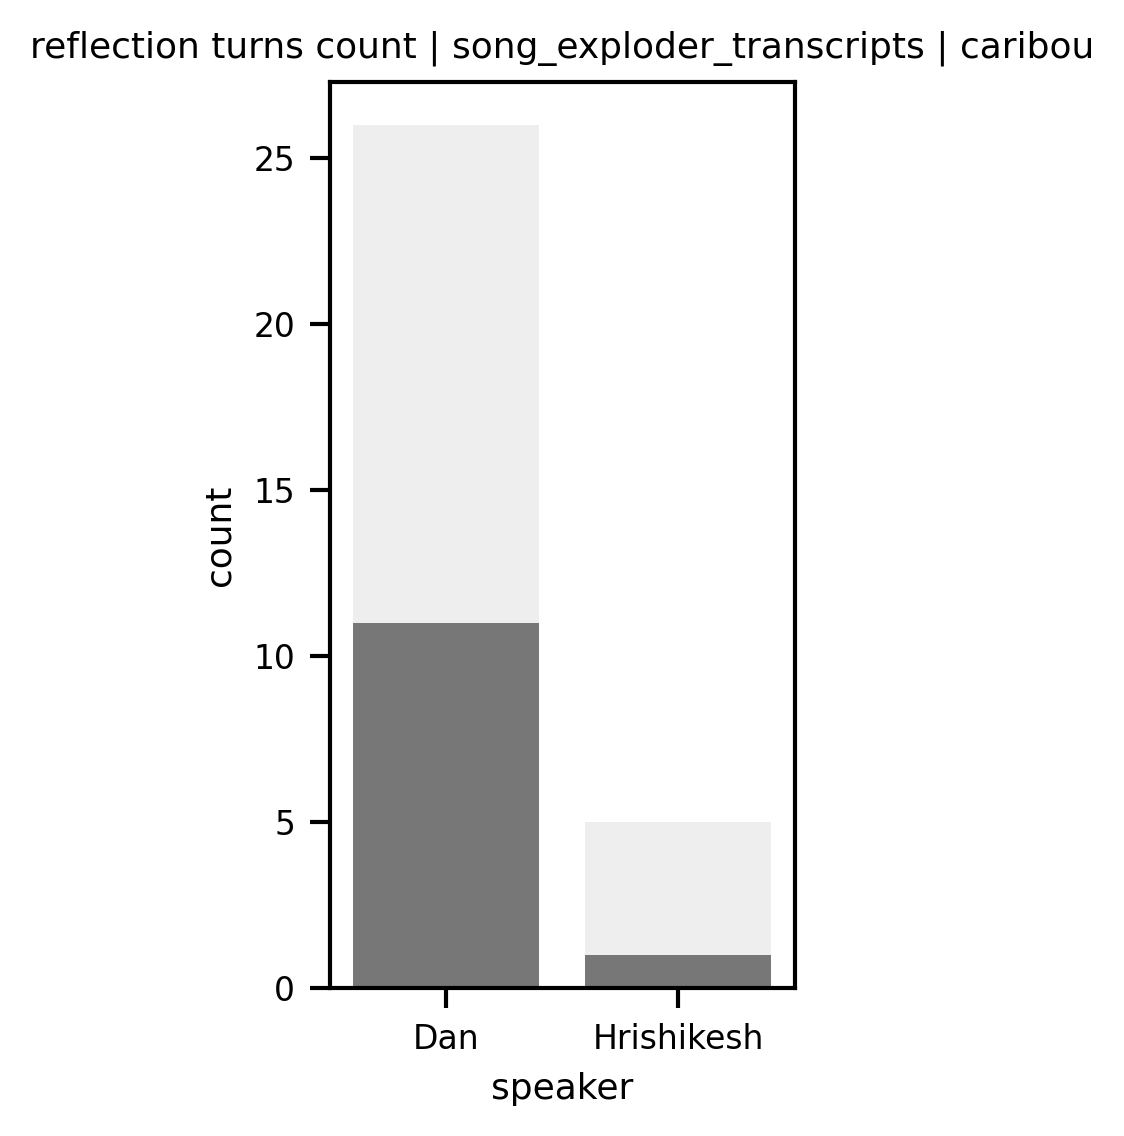

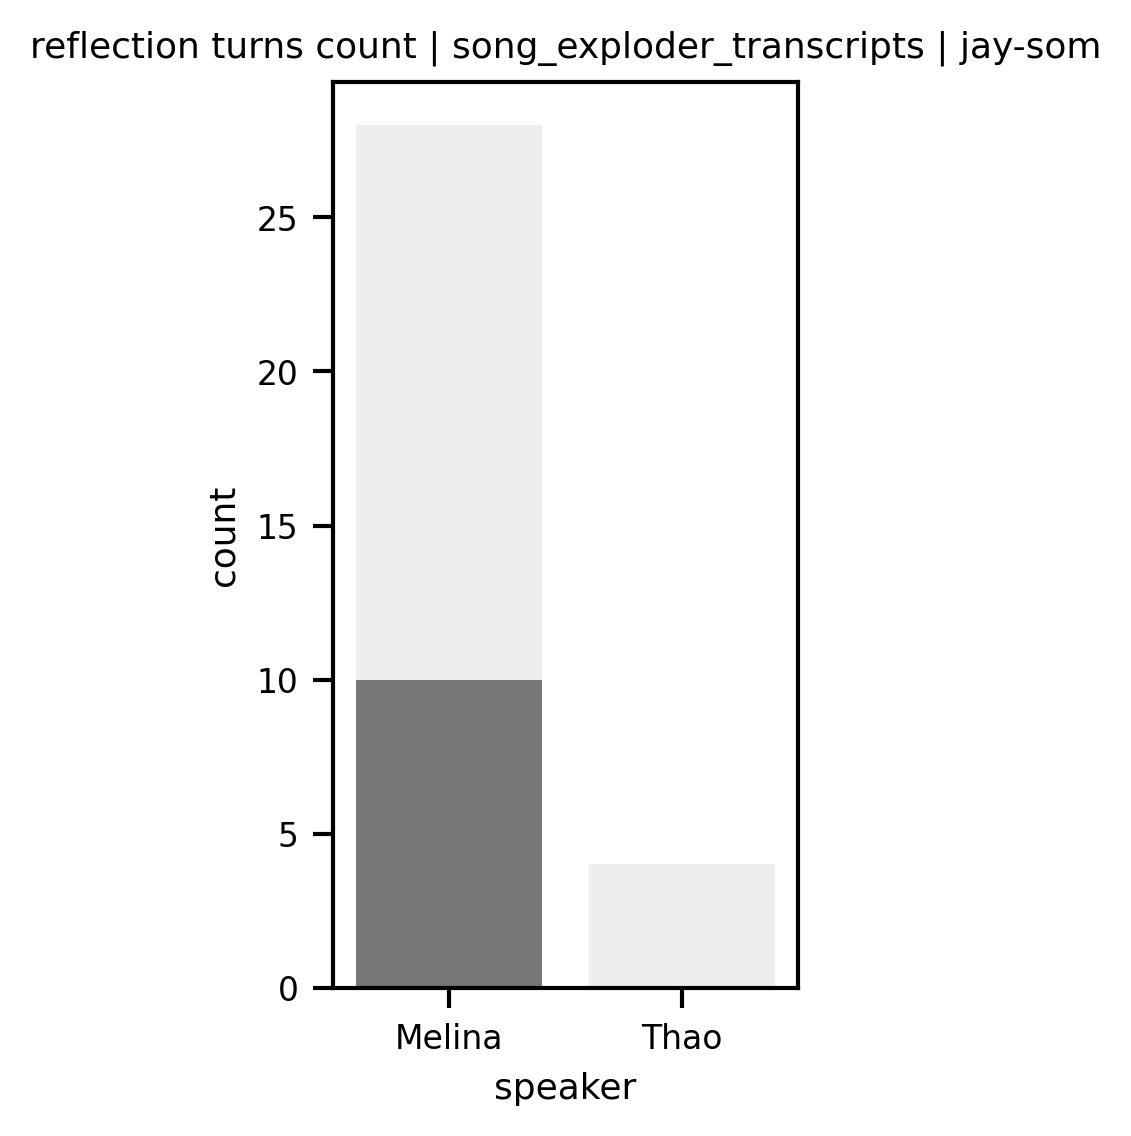

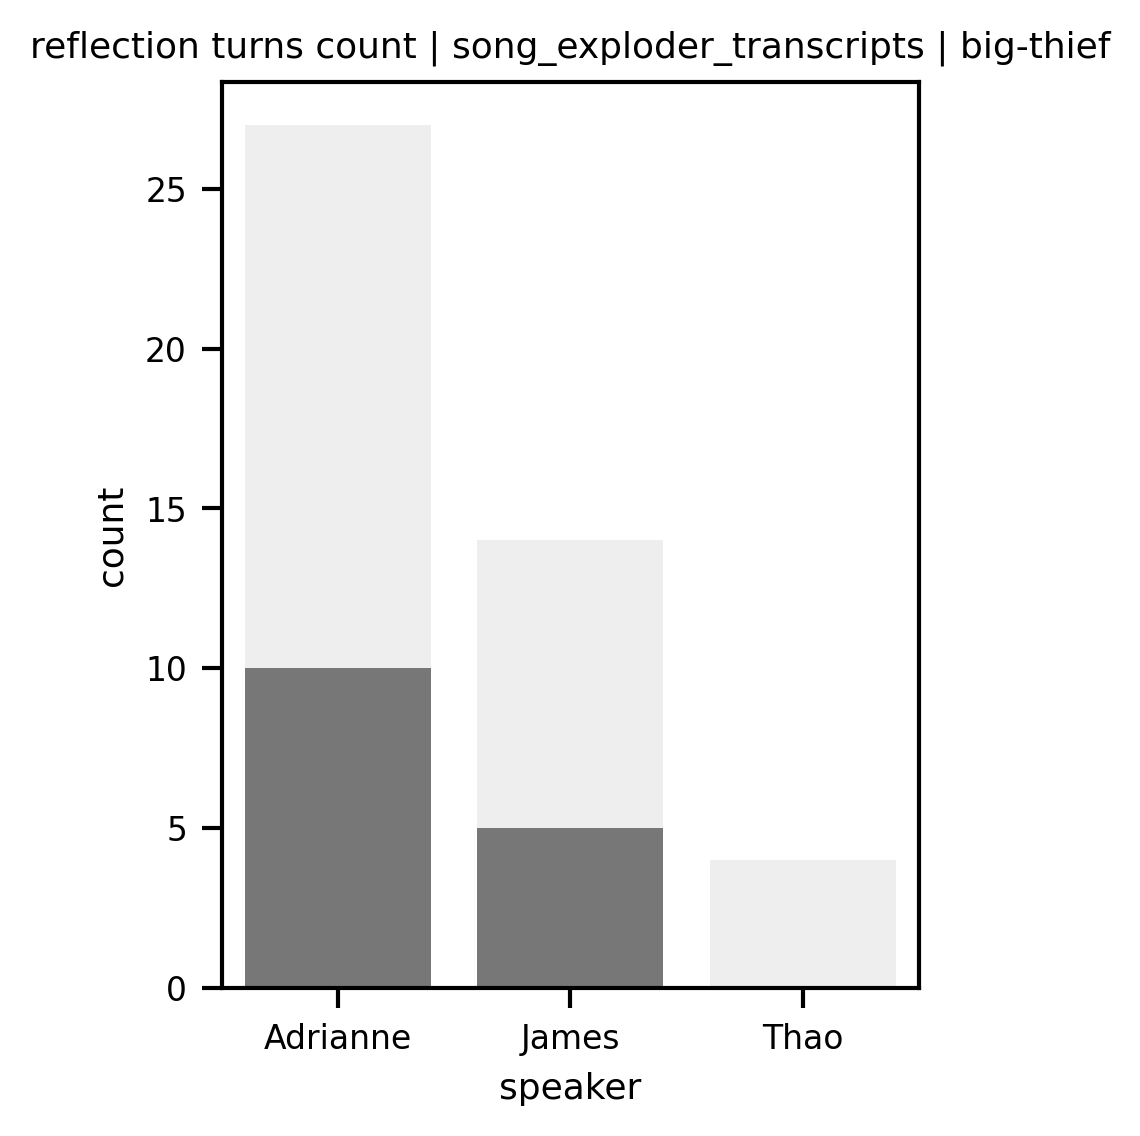

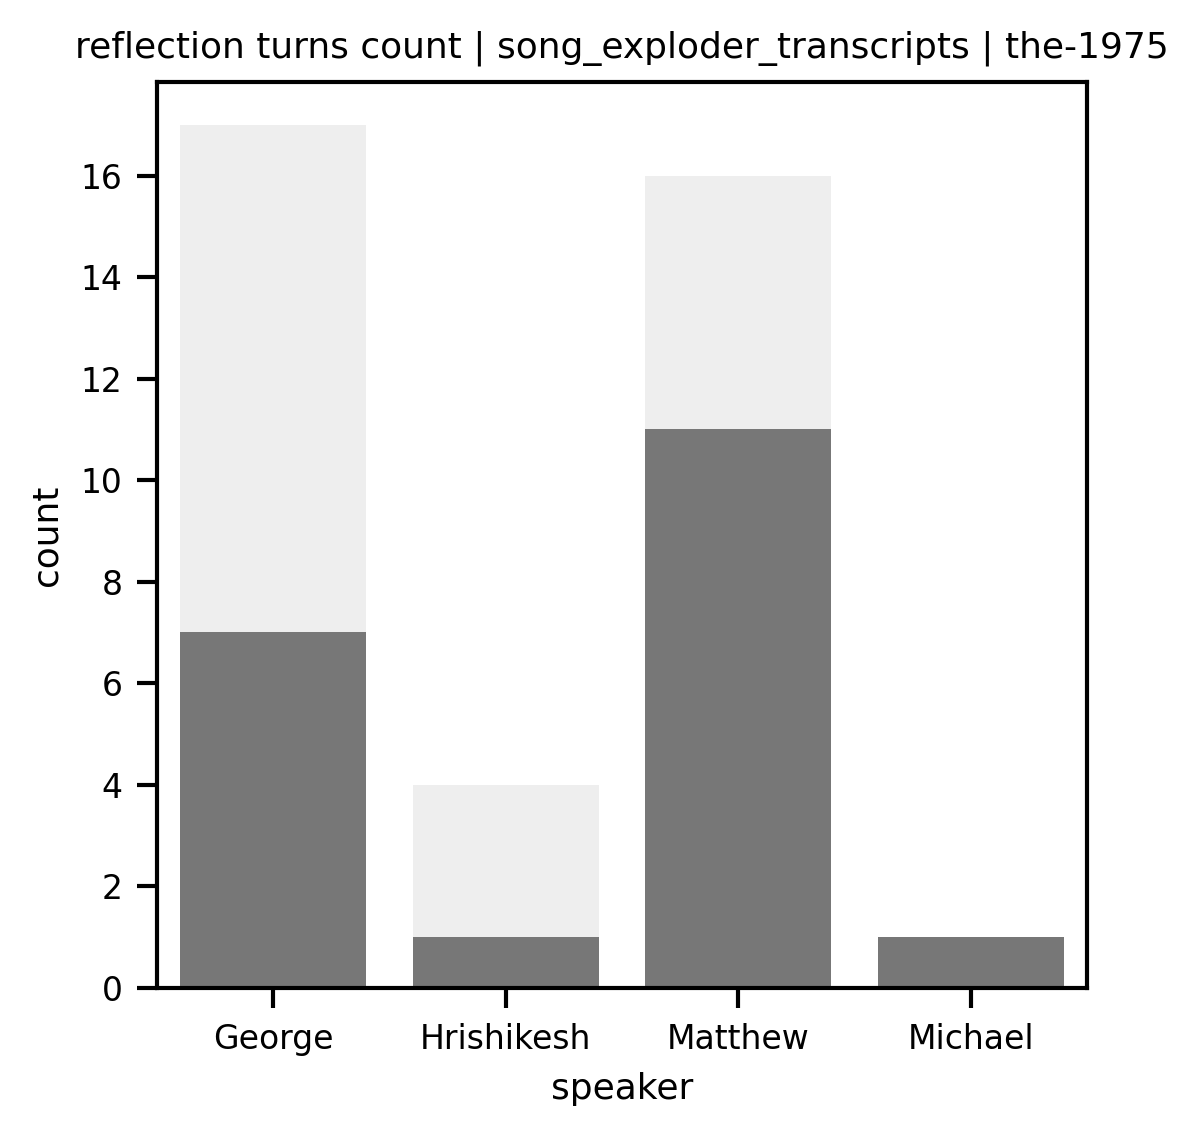

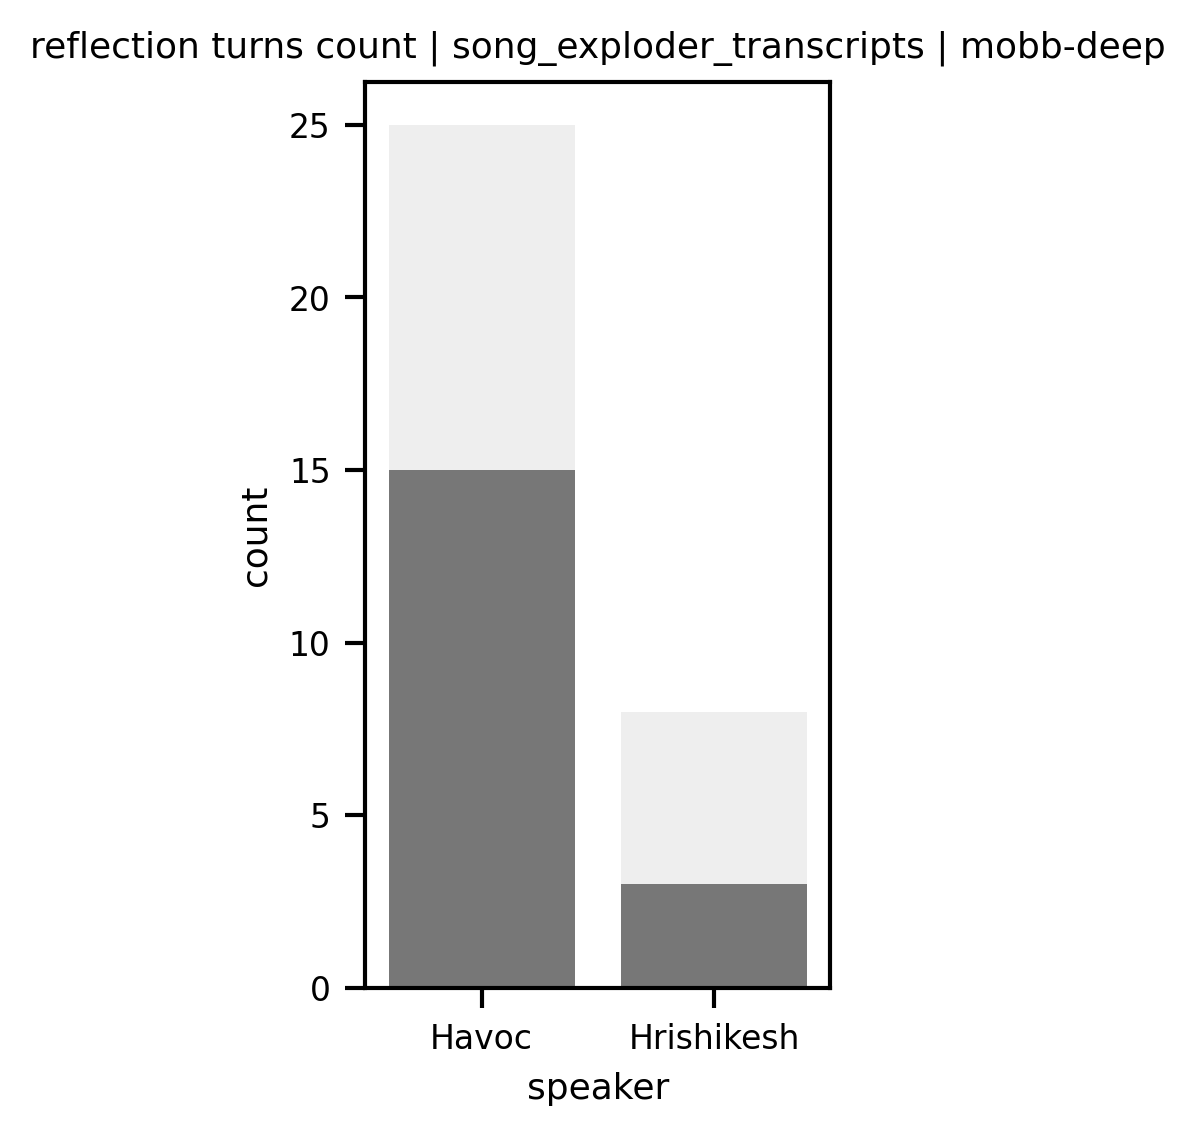

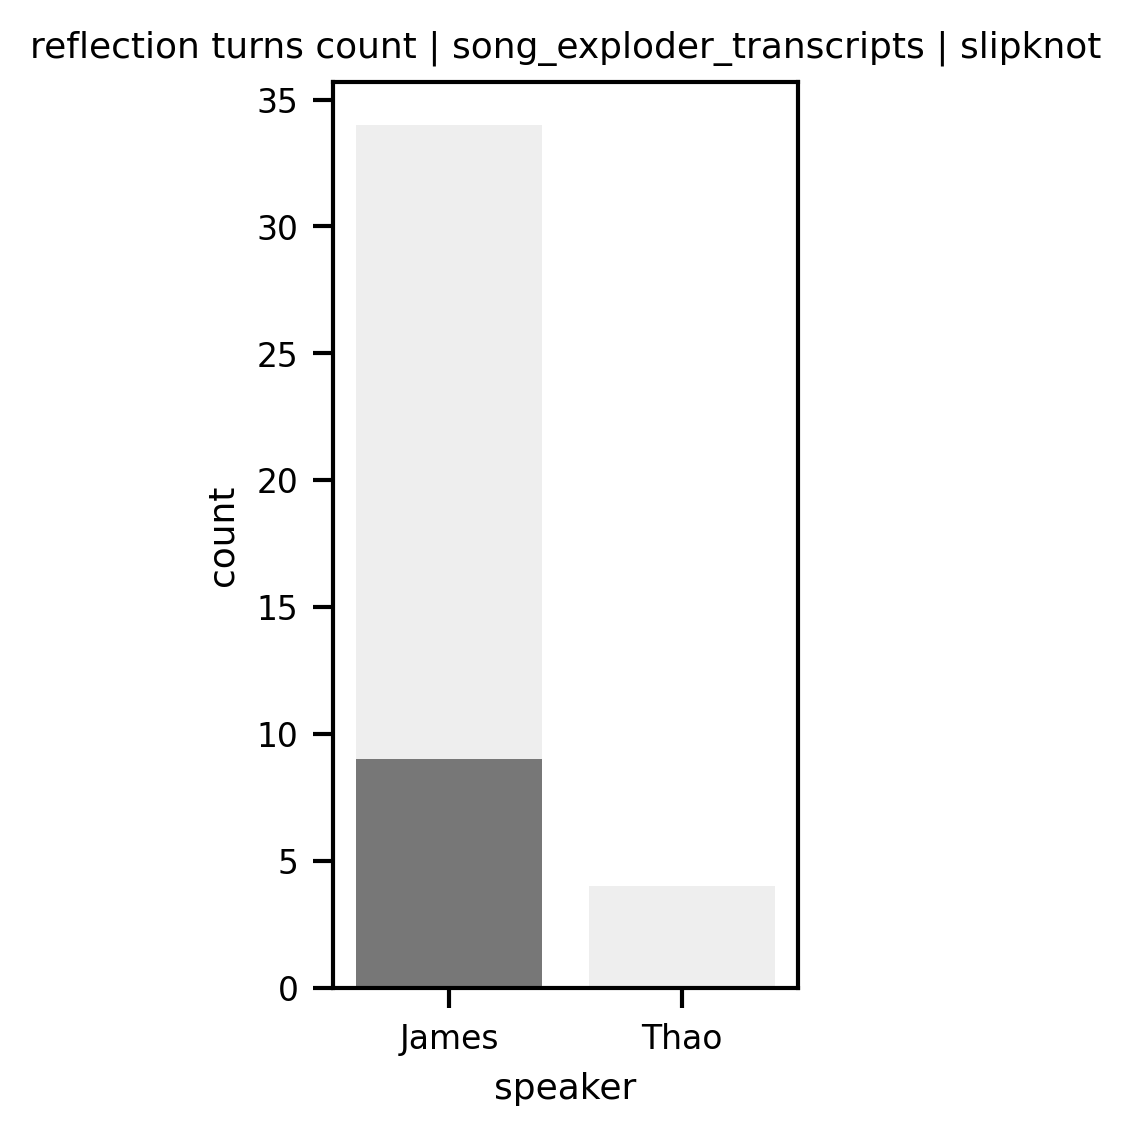

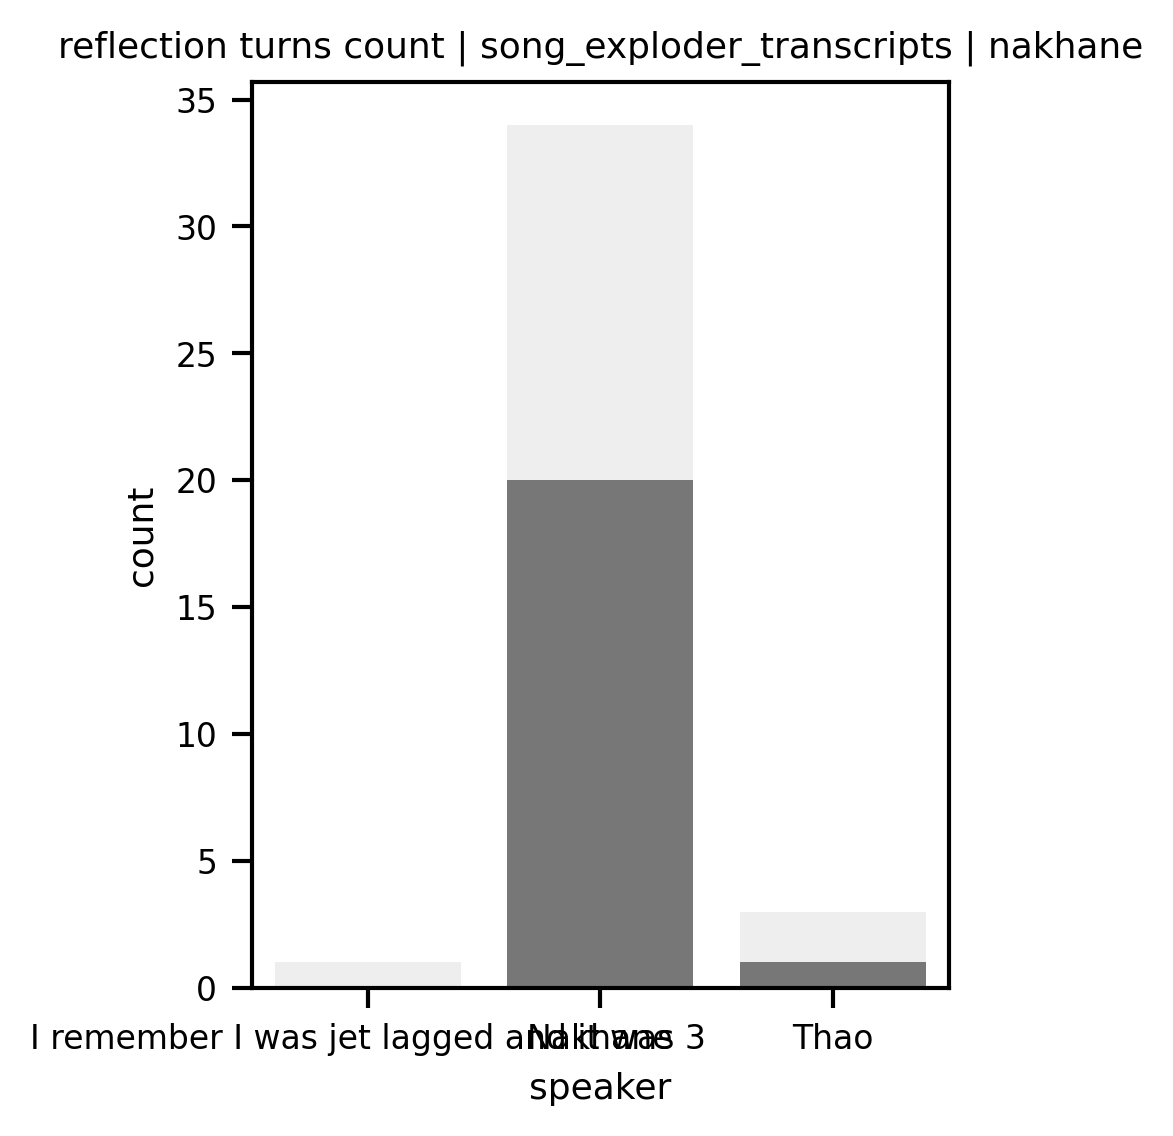

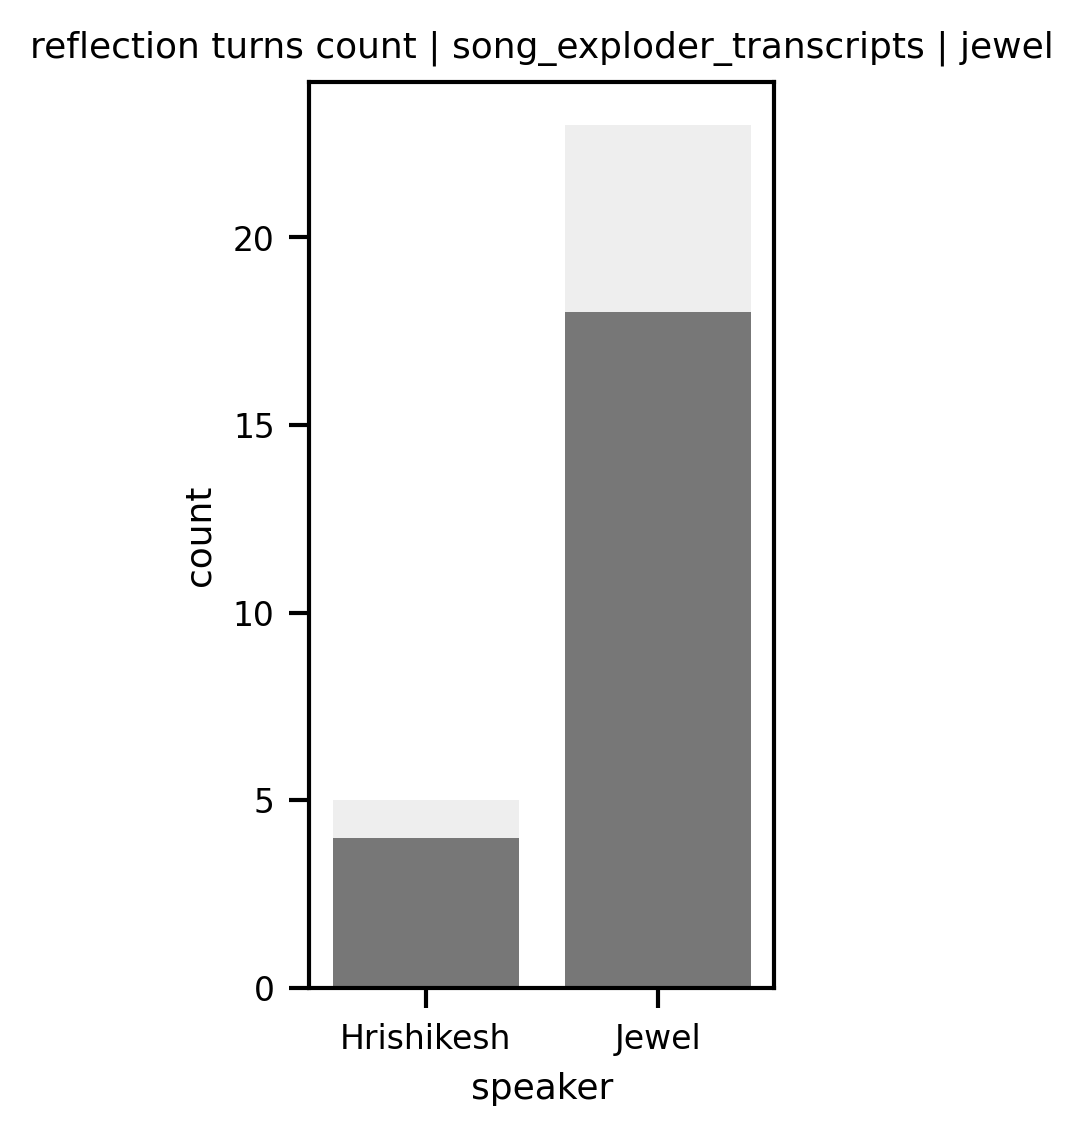

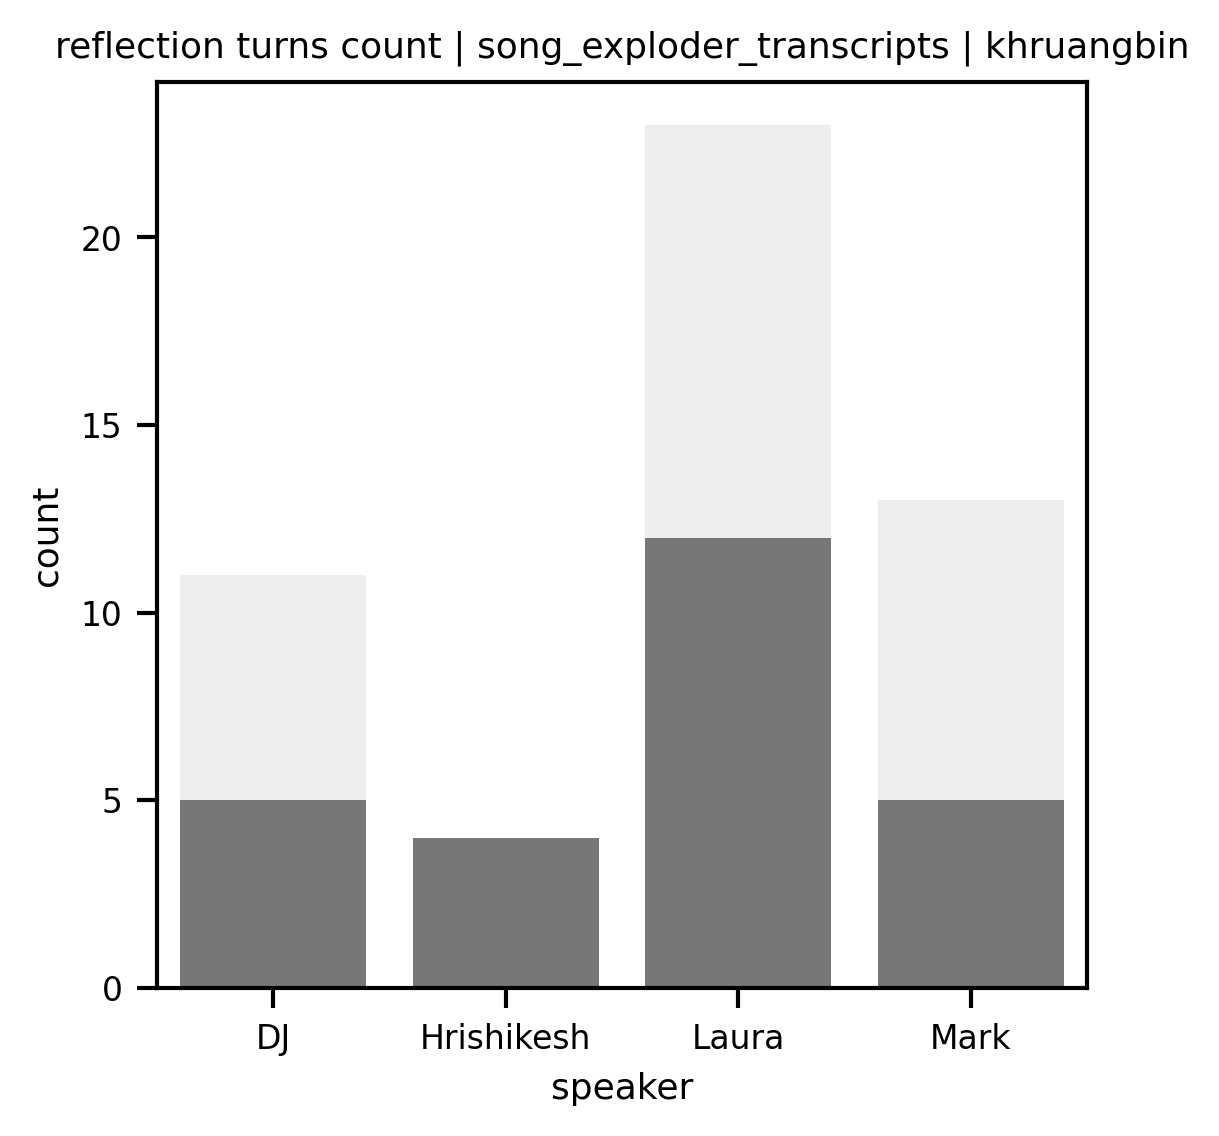

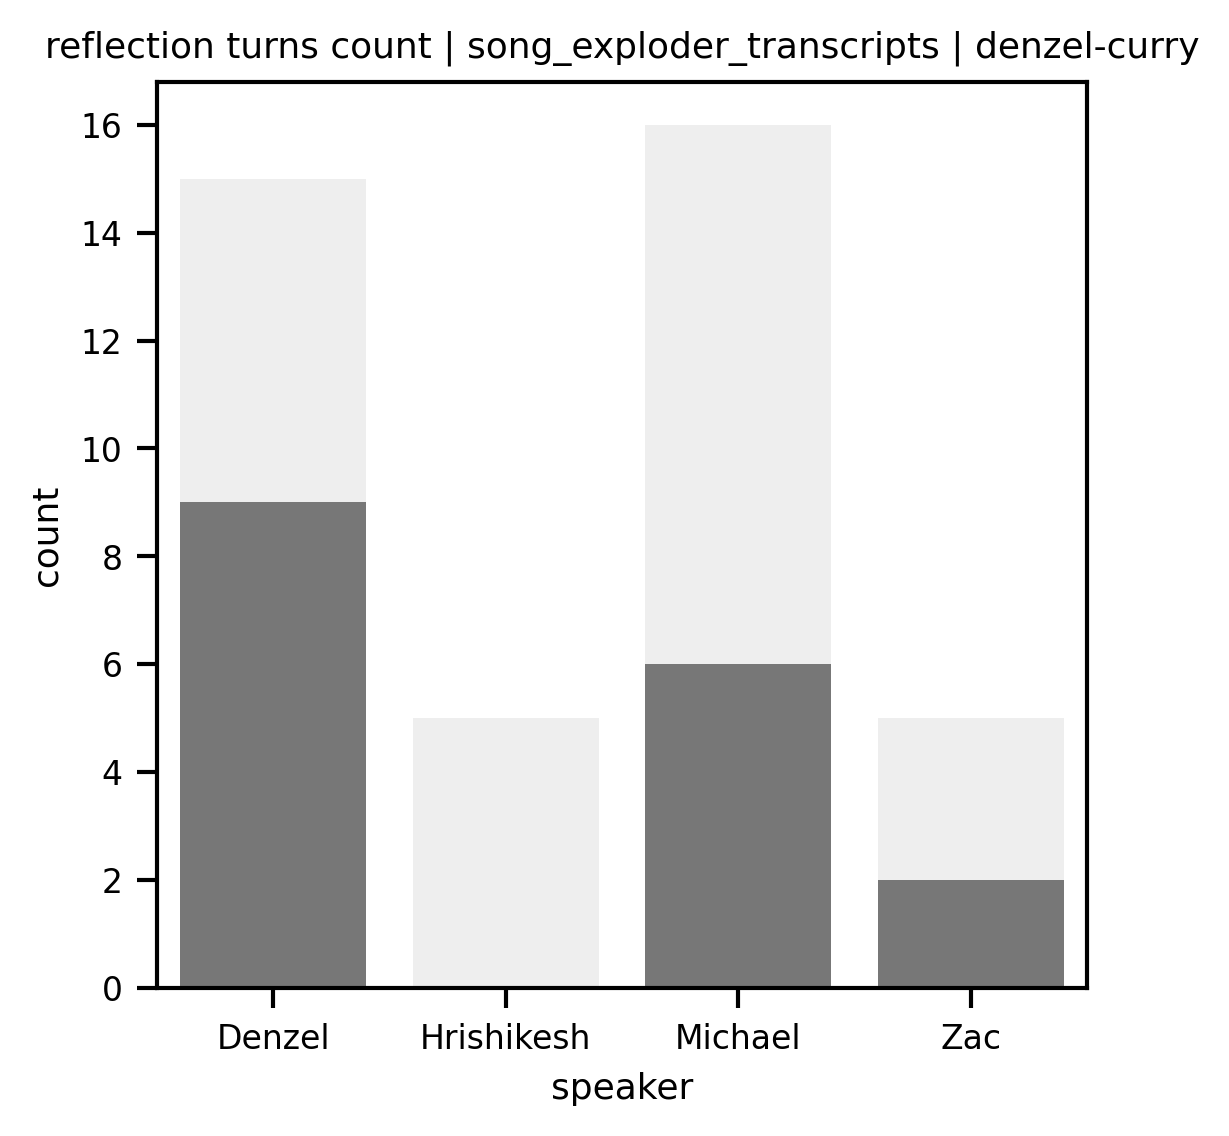

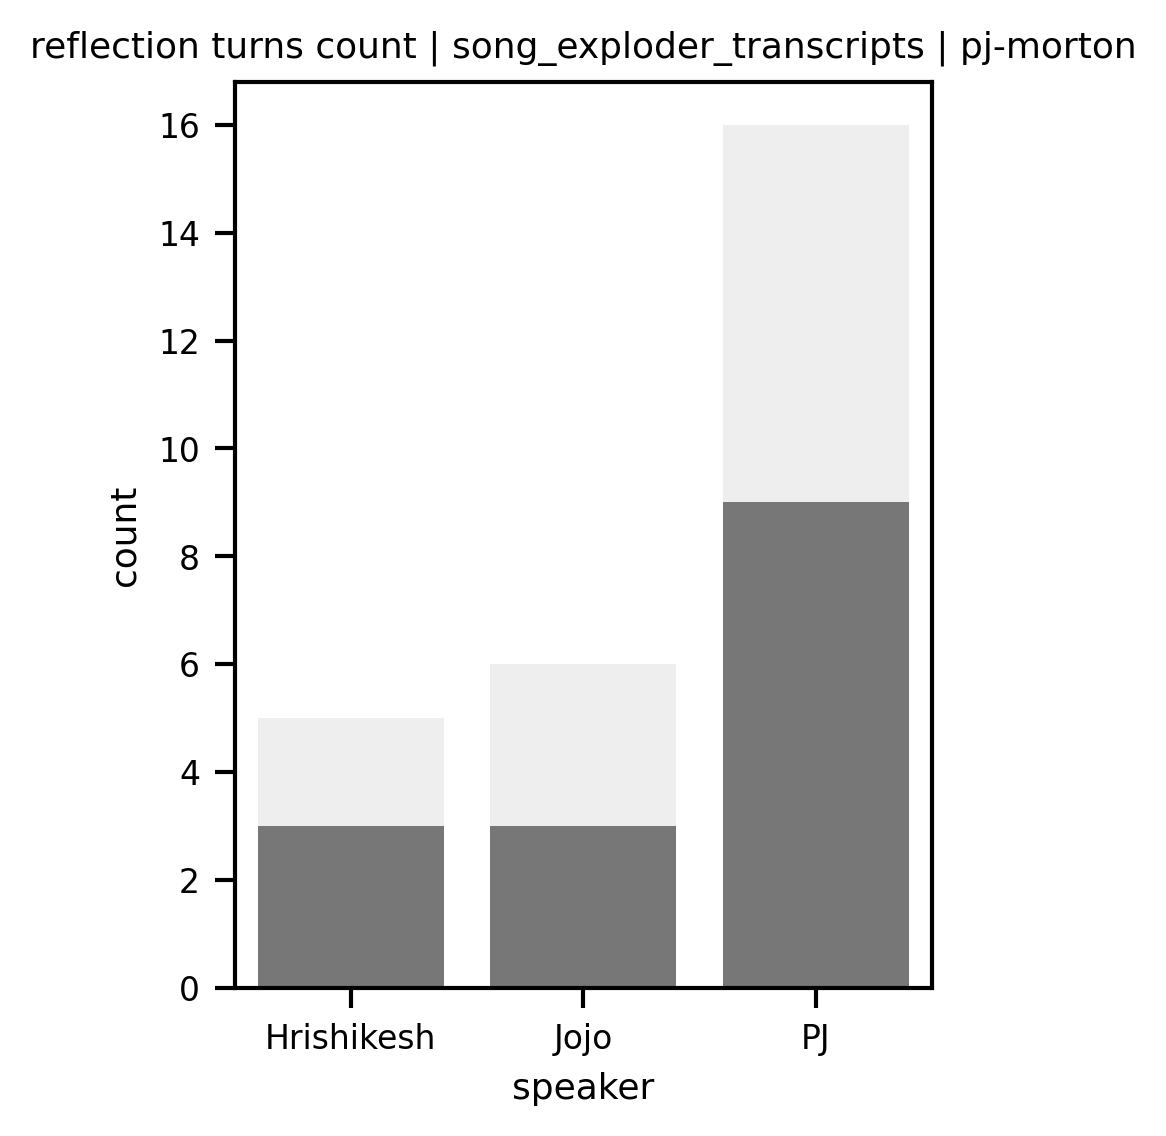

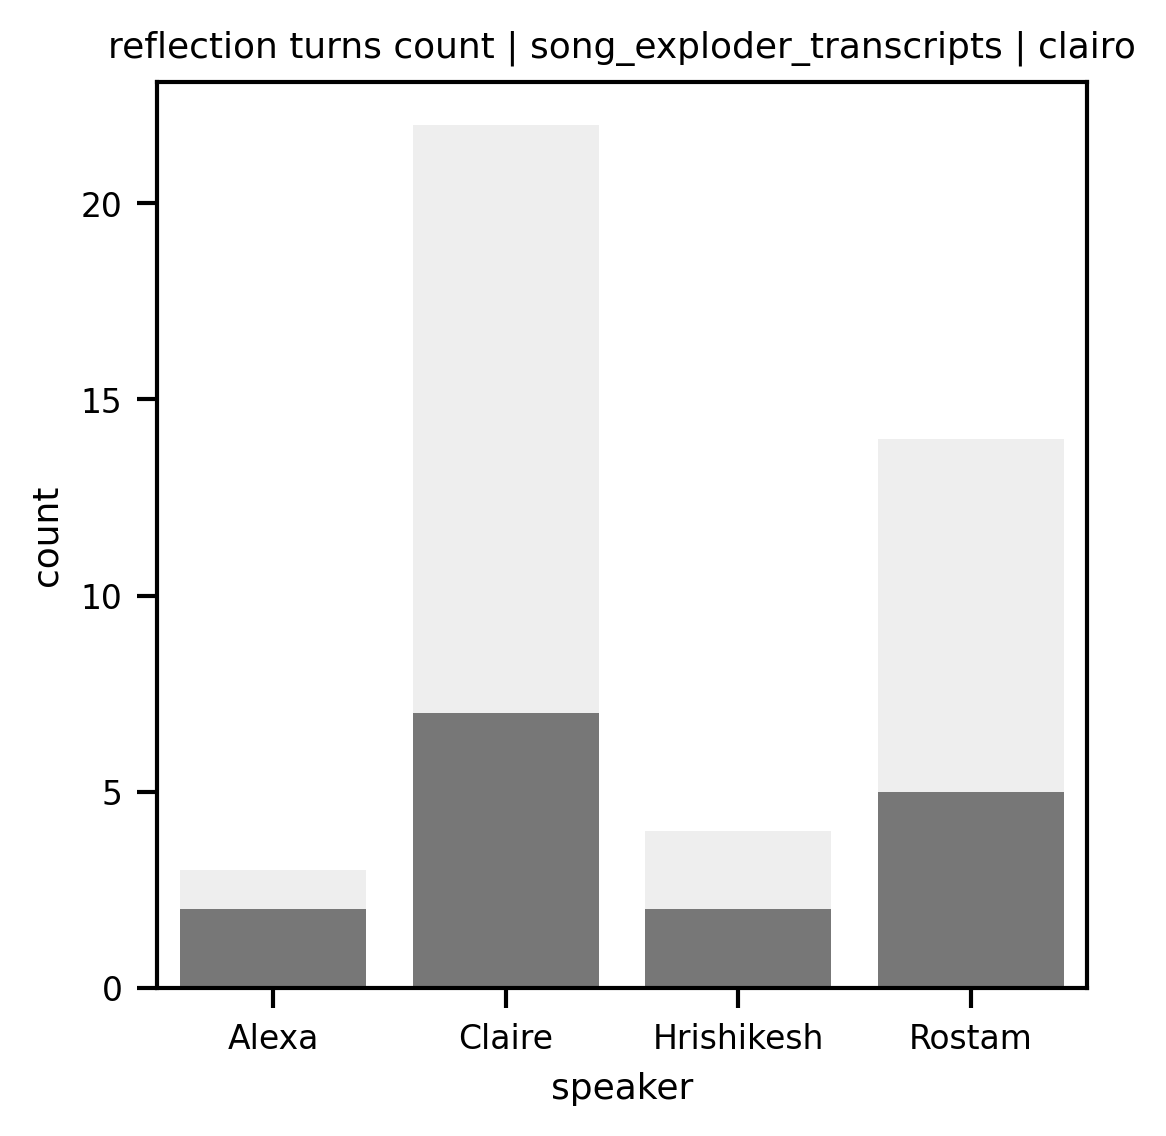

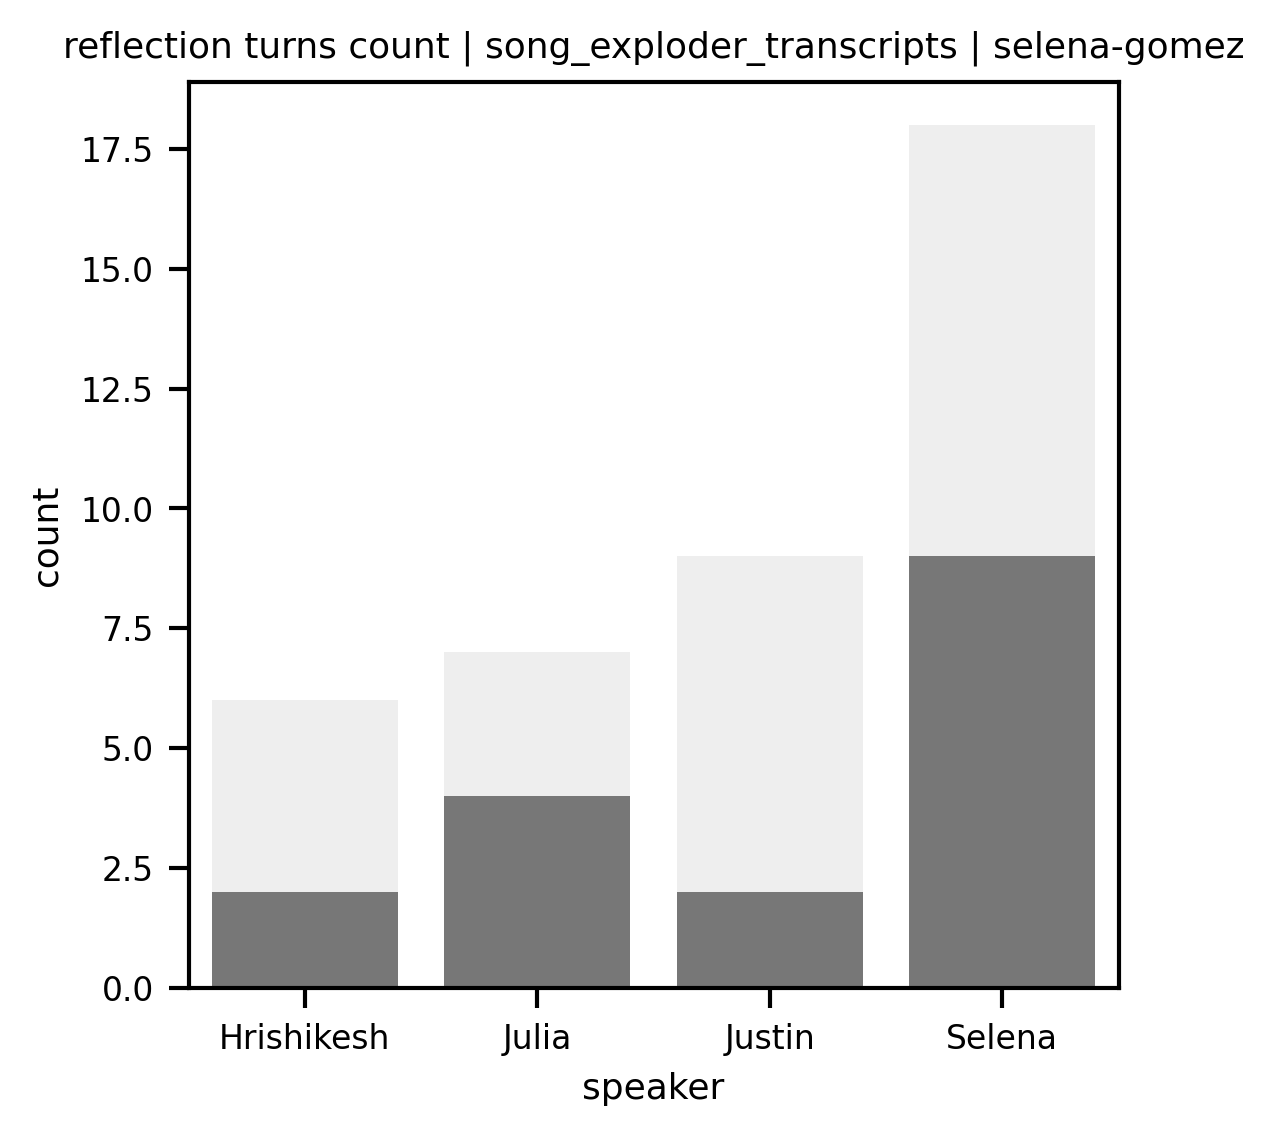

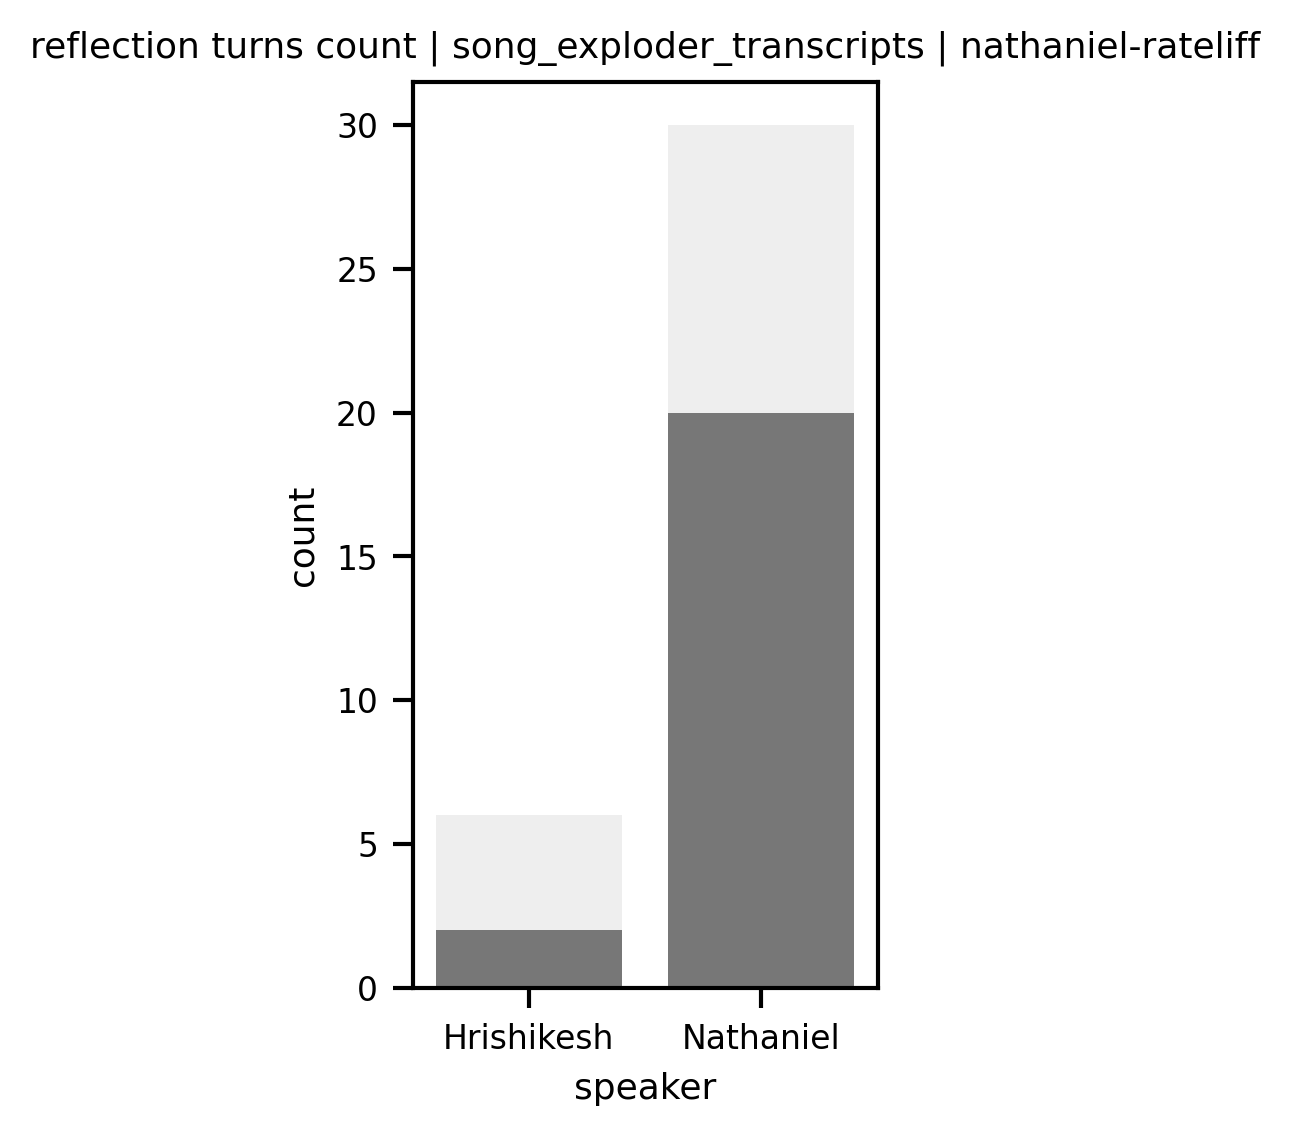

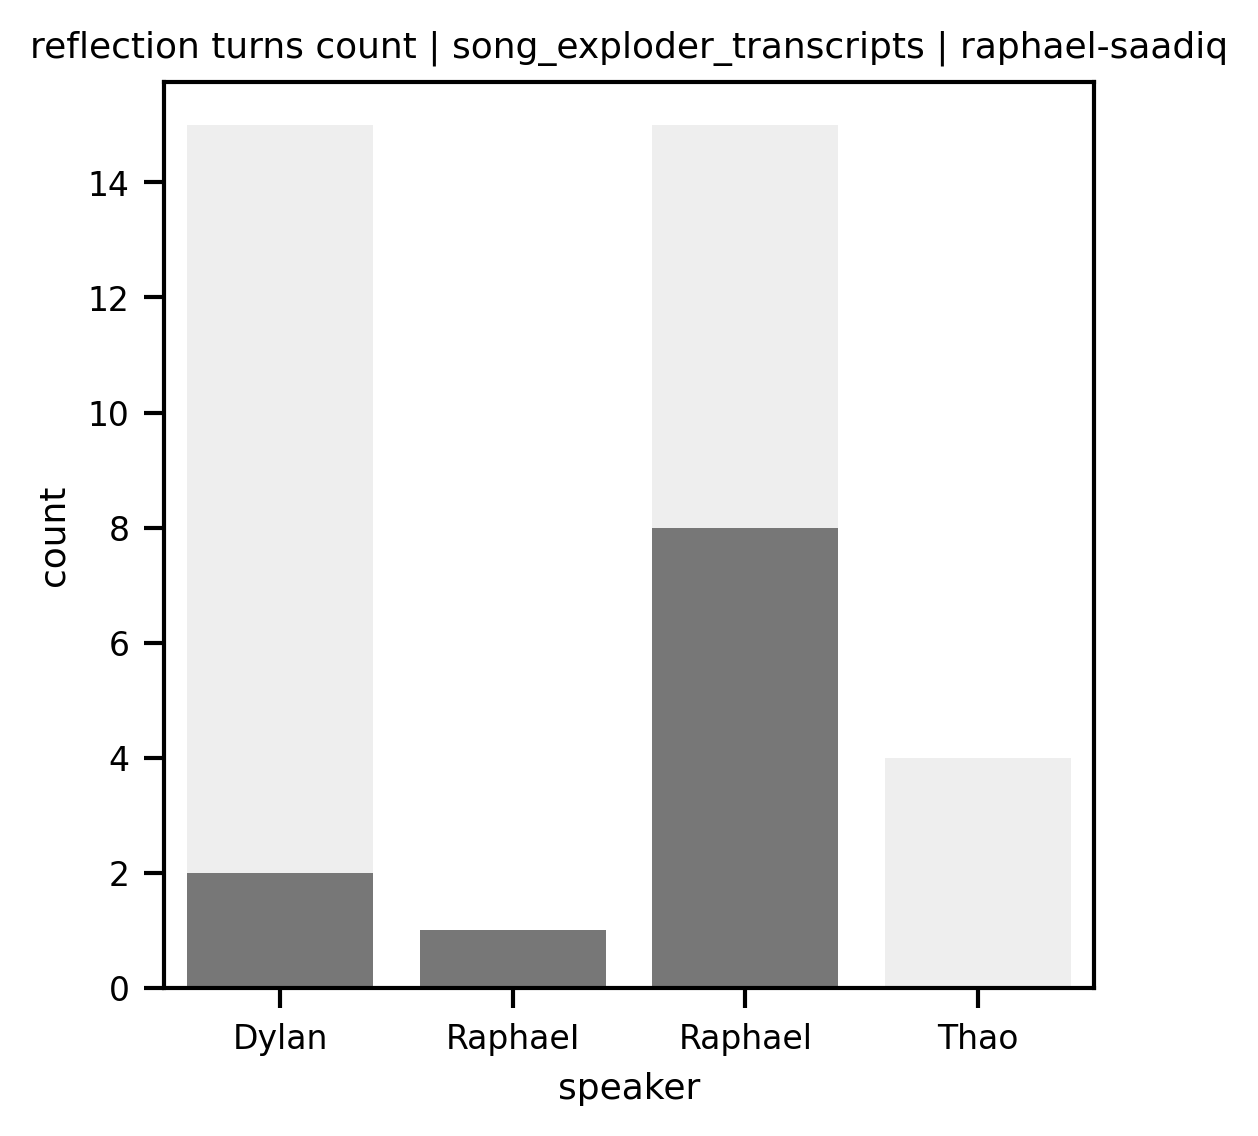

In [19]:
plot_cats_by_speaker(df, 'song_exploder_transcripts', 'reflection')

In [20]:
def plot_occurrences(input_df, dataset, session, category, range=[]):
    sns.set_style('ticks')
    sns.set_context("paper", font_scale=1.3)
    dataset_df = input_df[input_df['dataset'] == dataset]
    df_all = dataset_df[dataset_df['session'] == session]
    if len(range) == 0 :
        df = df_all.copy()
        start_turn = 0
    else :
        df = df_all[range[0]:range[1]]
        start_turn = range[0]
    category_color = '#777'
    none_color = '#eee'
    palette = [none_color, category_color]
    occurrences = []
    turns = []
    category_type = []
    category_occ = list(df[category])
    for ind, t in enumerate(category_occ) :
        if t > 0 : # category occurs in turn
            occ = 2
            kind = category
        else :
            occ = 1
            kind = 'none'
        category_type.append(kind)
        occurrences.append(occ)
        turns.append(ind + start_turn)
    df_plot = pd.DataFrame(list(zip(turns, occurrences, category_type)),
                           columns =['Turn', 'Category Index', 'Category'])
    fig = plt.figure(figsize=[20, 1], dpi=300)
    p = sns.scatterplot(data = df_plot, x = 'Turn', y = 'Category Index', hue='Category', 
                  hue_order = ['none', category], legend=False,
                  palette = palette, marker="|", s=200, lw=10)
    plt.ylim(0,3)
    plt.yticks([1,2], ['none', category])
    # plt.savefig('plots/'+dataset+'-'+session+'-'+category +'-occurrence-timeline.pdf', bbox_inches='tight')
    plt.show()

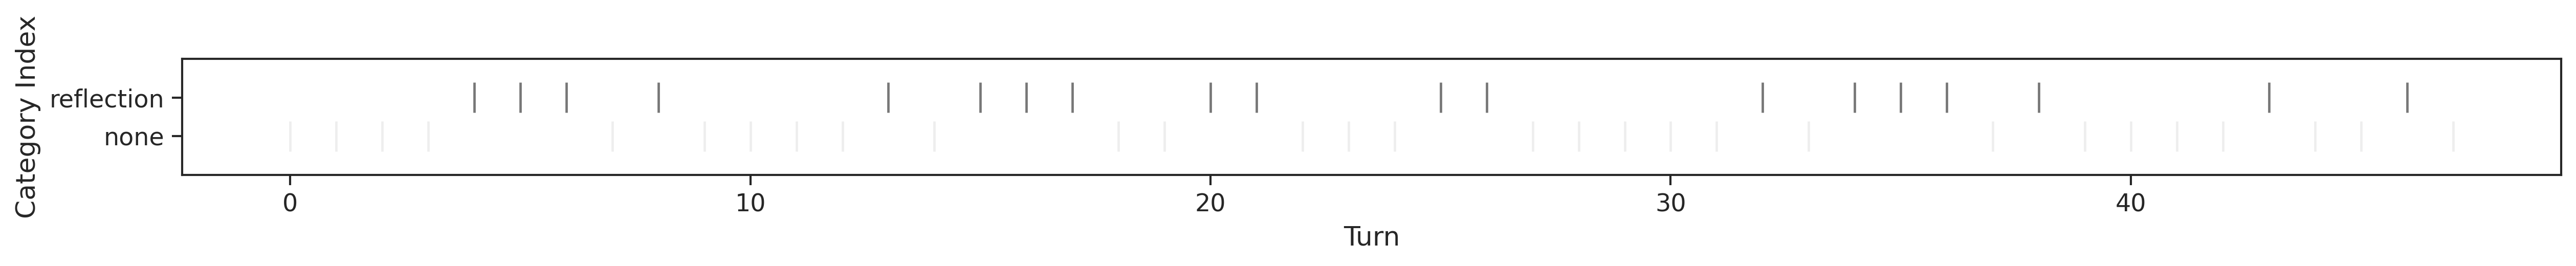

In [21]:
plot_occurrences(df, 'song_exploder_transcripts', 'the-cranberries', 'reflection')

In [22]:
# plot_occurrences(df, 'dtrs-10', 'ugrad-5-final-review-emily', 'reflection', range=[16,20])

In [23]:
def match_lexicon_terms(sentence, lexicon):
    reg_str = make_regex(lexicon)
    reg_matches = re.findall(reg_str, sentence.lower())
    reg_split = re.split(reg_str, sentence.lower())
    ind = 0
    matched_print = ""
    for split_string in reg_split:
        if ind == len(reg_matches) :
            str_to_concat = split_string
        else :
            str_to_concat = split_string + '**' + reg_matches[ind] + '**'
            ind += 1
        matched_print += str_to_concat
    return matched_print
    
def print_lines(df, dataset, session, lexicon, start, num_lines=10):
    df1 = df[df['dataset'] == dataset]
    df2 = df1[df1['session'] == session]
    speakers_list = list(df2['speaker'])
    utt = list(df2['speech_turn'])
    end = start + num_lines
    for ind, line in enumerate(utt[start:end]) :
        index = ind + start
        line_matched = match_lexicon_terms(line, lexicon)
        print(str(index)+' : ', end='')
        print(speakers_list[index])
        printmd(line_matched)
        print('----------')
        
def concordance(text, word, width=80, occurrences=10,nospace=False):
    margin = int((width - len(word))/2)
    start = 0
    counter = 0
    while start < len(text) or counter == occurrences:
        ind = text.find(word, start, -1)
        if ind < 0 :
            break
        
        if nospace : 
            
            if ind - margin > 0 :
                print(text[ind-margin:ind+len(word)+margin], ":", str(ind))
            else :
                spaces = ' ' * (margin - ind)
                print(spaces + text[0:ind+len(word)+margin], ":", str(ind))
            
        else :
            
            if ind - margin > 0 :
                left_text = text[ind-margin:ind]
                mid_text = text[ind:ind+len(word)]
                right_text = text[ind+len(word):ind+len(word)+margin]
            else :
                left_text = text[0:ind]
                mid_text = text[ind:ind+len(word)]
                right_text = text[ind+len(word):ind+len(word)+margin]
                
            print(left_text + "  " + mid_text + "  " + right_text, ":", str(ind))
            
        start += ind + len(word)
        counter += 1
        

def print_concordances(df, dataset, session, filter_keywords, match_limit=10, nospace=False):
    df1 = df[df['dataset'] == dataset]
    df2 = df1[df1['session'] == session]
    speakers_list = list(df2['speaker'])
    utt = list(df2['speech_turn'])
    utt_str = ' '.join(utt)
    if len(filter_keywords) > 0 :
        for term in filter_keywords :
            concordance(utt_str, term, width=80, occurrences=match_limit, nospace=nospace)
            print("-" * 80)

In [24]:
print_lines(df,  'song_exploder_transcripts', 'the-cranberries', reflection_words, 1, num_lines=5)

1 : Thao


the cranberries formed in limerick, ireland in 1989. singer dolores o’riordan joined a year later, and the group went on to become one of the deﬁning bands of the ‘90s, eventually selling over 40 million records worldwide. in january 2018, while the band was working on their eighth album, dolores o’riordan passed away unexpectedly. later that year, remaining members noel hogan, mike hogan, and fergal lawler announced that they would end the band, and that this would be their ﬁnal album. it’s called in the end. it was released in april 2019, and in this episode, guitarist and songwriter noel hogan breaks down a song from the album called “all over now.” you’ll hear how hogan and o’riordan ﬁrst started the song, and how the remaining members worked to ﬁnish it without her. also, after the full song plays, we’ve got more with noel for another installment of our segment, this is instrumental. so stick around for that. here’s the cranberries on song exploder. (“all over now” by the cranberries)

----------
2 : Noel


i'm noel hogan from the cranberries. guitarist and co-songwriter with dolores o’riordan. (music fades out)

----------
3 : Noel


we've always written separately from day one. very ﬁrst day i met dolores, gave her a cassette that had “linger” on it. (“linger” by the cranberries) (“linger” by the cranberries)

----------
4 : Noel


and she took it away, and came back a week later with the version that everybody **knows**.

----------
5 : Noel


and really from that point on, that's how we wrote. it was cassettes for years and years, **even** when we lived in diﬀerent countries. i would courier cassettes over to her and she'd work on them. and it was a kind of a mutual respect in that way, writing-wise that you kind of **knew** what the other one was **thinking** without having to say it. (music fades out)

----------
